1. Загрузить датасет в файлы Colab (файлы среды выполнения). Данные представлены в виде csv таблицы.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


2. Загрузить датасет в датафрейм (pandas.DataFrame).

In [1]:
import pandas as pd
import numpy as np

# df = pd.read_csv('/content/drive/MyDrive/НИР/Данные/crowd_small.csv')
train_df = pd.read_csv('../data/crowd_train_2000.csv')
train_df

id  \
0     475e76f77ac1ed7cabafca740b15b32a   
1     2f9438ef68395c70a8714dc373a49d11   
2     fb0ae78586a235018103acec22a80a8f   
3     196dcf9e1aaac46c2aee45e7f6adfb92   
4     41d7f48ca93b01e4a01a4f34b40a69ff   
...                                ...   
7995  b0165a0072d5878b1a6e822da04b7bb8   
7996  daebc19c272d1786f66ad89d11d9b744   
7997  cb928169f220058c7a2b5bfd864eca29   
7998  ae1cb548a0e8e055606623252c687602   
7999  2476a6e2043ea844de3fc4c1ff696e0c   

                                             audio_path  \
0     dusha/crowd/crowd_train/wavs/475e76f77ac1ed7ca...   
1     dusha/crowd/crowd_train/wavs/2f9438ef68395c70a...   
2     dusha/crowd/crowd_train/wavs/fb0ae78586a235018...   
3     dusha/crowd/crowd_train/wavs/196dcf9e1aaac46c2...   
4     dusha/crowd/crowd_train/wavs/41d7f48ca93b01e4a...   
...                                                 ...   
7995  dusha/crowd/crowd_train/wavs/b0165a0072d5878b1...   
7996  dusha/crowd/crowd_train/wavs/daebc19c272d1786f...   
7997  dusha/crowd/crowd_train/wavs/cb928169f220058c7...   
7998  dusha/crowd/crowd_train/wavs/ae1cb548a0e8e0556...   
7999  dusha/crowd/crowd_train/wavs/2476a6e2043ea844d...   

                                          features_path  emotion  label  \
0     dusha/features/475e76f77ac1ed7cabafca740b15b32...    angry      1   
1     dusha/features/2f9438ef68395c70a8714dc373a49d1...  neutral      0   
2     dusha/features/fb0ae78586a235018103acec22a80a8...  neutral      0   
3     dusha/features/196dcf9e1aaac46c2aee45e7f6adfb9...  neutral      0   
4     dusha/features/41d7f48ca93b01e4a01a4f34b40a69f...  neutral      0   
...                                                 ...      ...    ...   
7995  dusha/features/b0165a0072d5878b1a6e822da04b7bb...      sad      3   
7996  dusha/features/daebc19c272d1786f66ad89d11d9b74...      sad      3   
7997  dusha/features/cb928169f220058c7a2b5bfd864eca2...      sad      3   
7998  dusha/features/ae1cb548a0e8e055606623252c68760...      sad      3   
7999  dusha/features/2476a6e2043ea844de3fc4c1ff696e0...      sad      3   

      duration  
0     2.453000  
1     4.640000  
2     3.900562  
3     4.780000  
4     4.740000  
...        ...  
7995  4.480000  
7996  6.540000  
7997  3.505813  
7998  7.760000  
7999  7.900000  

[8000 rows x 6 columns]

In [2]:
def get_mfcc_dataframe(df):
    mfcc_arr = []
    labels = []
    
    for index, row in df.iterrows():
        mfcc = np.load(f'../{row["features_path"]}')[0].T
        mfcc_arr.append(mfcc)
        labels.append([row['label'] for _ in range(mfcc.shape[0])])
    
    mfcc_arr = np.concatenate(mfcc_arr)
    labels = np.concatenate(labels)

    df = pd.DataFrame(mfcc_arr, columns=[i for i in range(64)])
    df['labels'] = labels

    return df

def get_mean_mfcc_dataframe(df):
    mfcc_arr = []
    labels = []
    
    for index, row in df.iterrows():
        mfcc = np.load(f'../{row["features_path"]}')[0].T.mean(axis=0)
        mfcc_arr.append([mfcc])
        labels.append(row['label'])
    
    mfcc_arr = np.concatenate(mfcc_arr)
    labels = np.concatenate(labels)

    df = pd.DataFrame(mfcc_arr, columns=[i for i in range(64)])
    df['labels'] = np.array(labels)

    return df

In [3]:
train_df_mfcc = get_mfcc_dataframe(train_df)
train_df_mfcc

0          1          2          3          4          5  \
0       -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1       -80.000000 -76.883591 -70.405769 -65.811974 -62.634987 -60.392197   
2       -67.807159 -57.055588 -57.000595 -52.954254 -50.250671 -51.740013   
3       -40.508720 -36.214897 -36.039444 -31.506943 -27.027981 -26.953735   
4       -34.425884 -29.212101 -24.018187 -21.930849 -21.412628 -21.794739   
...            ...        ...        ...        ...        ...        ...   
3861248 -17.903545 -20.681564 -28.710524 -49.750229 -47.501701 -48.737038   
3861249 -13.128126 -23.411379 -31.479027 -35.766365 -41.259163 -45.817207   
3861250 -18.975983 -23.933968 -32.402039 -49.665848 -49.505104 -51.067848   
3861251 -13.758670 -21.667059 -31.655607 -41.092331 -44.781830 -51.940529   
3861252 -12.206067 -22.871271 -33.919456 -36.673119 -40.924385 -41.812943   

                 6          7          8          9  ...         55  \
0       -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000   
1       -58.821587 -57.623779 -56.570175 -55.612419  ... -40.622707   
2       -53.363197 -52.527588 -50.729401 -48.510345  ... -30.790314   
3       -28.213249 -28.042803 -27.392399 -27.388414  ... -26.386129   
4       -22.783783 -24.143753 -25.635902 -27.182241  ... -39.490562   
...            ...        ...        ...        ...  ...        ...   
3861248 -51.345802 -51.942863 -60.874405 -70.309601  ... -75.440903   
3861249 -54.660439 -52.336861 -52.868408 -54.499985  ... -80.000000   
3861250 -55.605080 -55.702309 -56.217529 -54.702766  ... -75.881058   
3861251 -53.652069 -53.142532 -62.026230 -57.307030  ... -71.287613   
3861252 -41.841347 -43.931198 -48.192627 -49.813042  ... -74.996803   

                56         57         58         59         60         61  \
0       -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1       -40.693855 -40.885185 -41.474987 -42.756287 -44.502197 -46.850212   
2       -34.176830 -35.827187 -33.033722 -33.157963 -40.413300 -49.288689   
3       -20.393019 -20.489468 -28.056843 -29.760378 -24.653679 -27.739401   
4       -35.942188 -36.608353 -41.700478 -43.132378 -40.949505 -44.313934   
...            ...        ...        ...        ...        ...        ...   
3861248 -78.801544 -78.756805 -76.196404 -78.091537 -78.759666 -80.000000   
3861249 -76.524734 -76.371078 -77.527992 -79.192673 -79.711357 -79.662460   
3861250 -73.447113 -76.189064 -79.174690 -76.144073 -78.814247 -75.512459   
3861251 -74.183861 -70.774979 -71.626984 -77.206879 -77.745720 -73.372818   
3861252 -78.009750 -76.133247 -73.138962 -72.841827 -74.750702 -77.166420   

                62         63  labels  
0       -80.000000 -80.000000       1  
1       -49.823051 -53.715179       1  
2       -44.568535 -53.169670       1  
3       -34.643898 -35.452629       1  
4       -53.193459 -53.537804       1  
...            ...        ...     ...  
3861248 -80.000000 -80.000000       3  
3861249 -80.000000 -80.000000       3  
3861250 -80.000000 -80.000000       3  
3861251 -76.944359 -80.000000       3  
3861252 -78.879967 -80.000000       3  

[3861253 rows x 65 columns]

3. Построить гистограммы признаков
  - Для построения гистограмм признаков данных используйте соответствующие названия признаков при получении данных из датафрейма `df['название_признака'].values`

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def plot_features_hist(df, n_bins, x_count, y_count):
    for i in range(y_count):
        fig, axs = plt.subplots(1, x_count, figsize=(12, 4))
        for j in range(x_count):
            axs[j].hist(df[i * x_count + j].values, bins=n_bins)
            axs[j].set_title(f'Признак №{i * x_count + j}')
            axs[j].set_xlabel('Дб')

        plt.tight_layout()
        plt.show()

In [ ]:
# data = df.loc[:, '0':'63'].to_numpy(dtype='float')

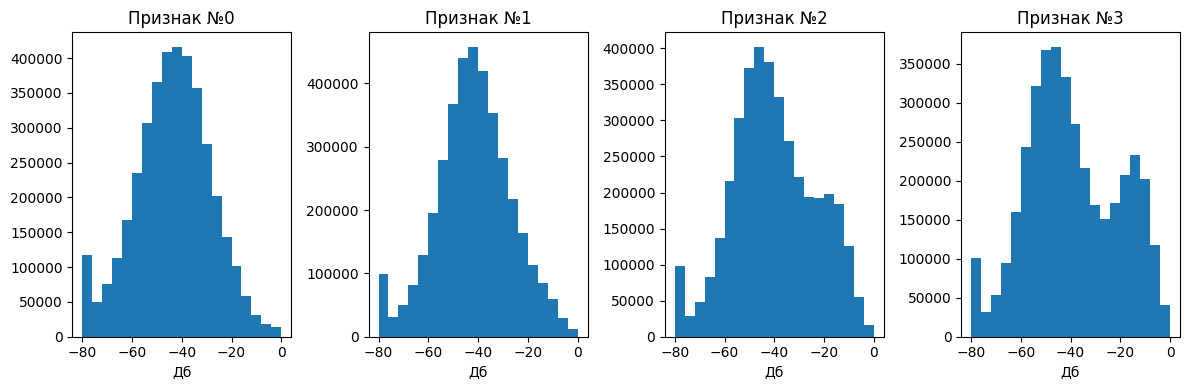

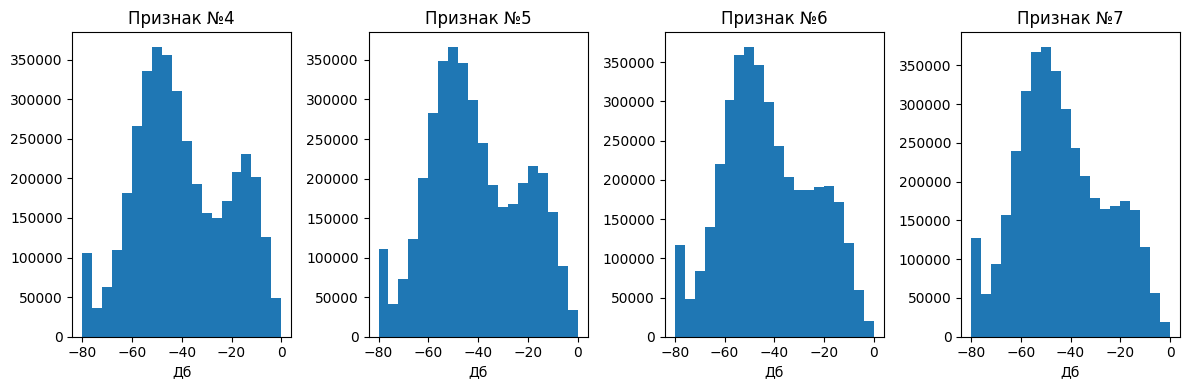

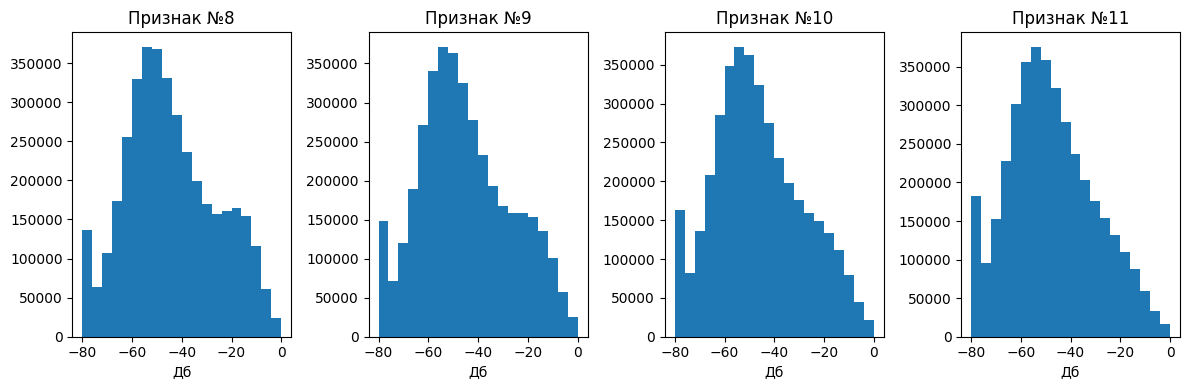

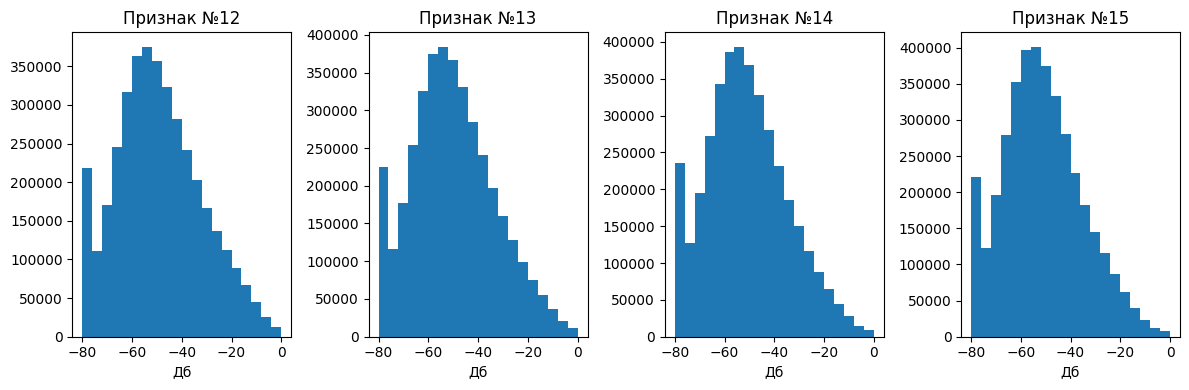

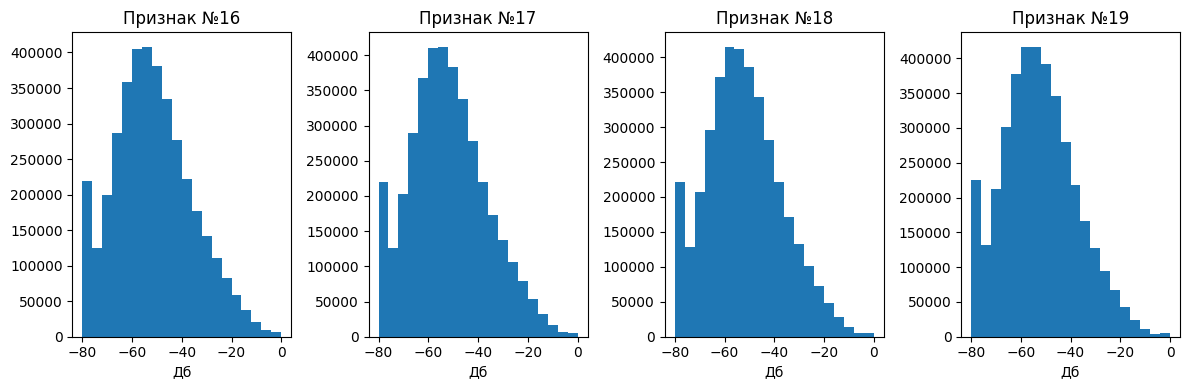

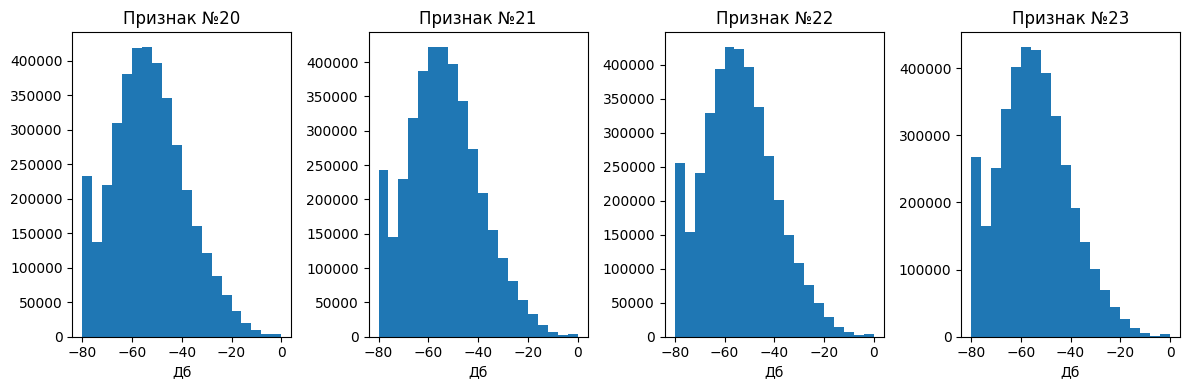

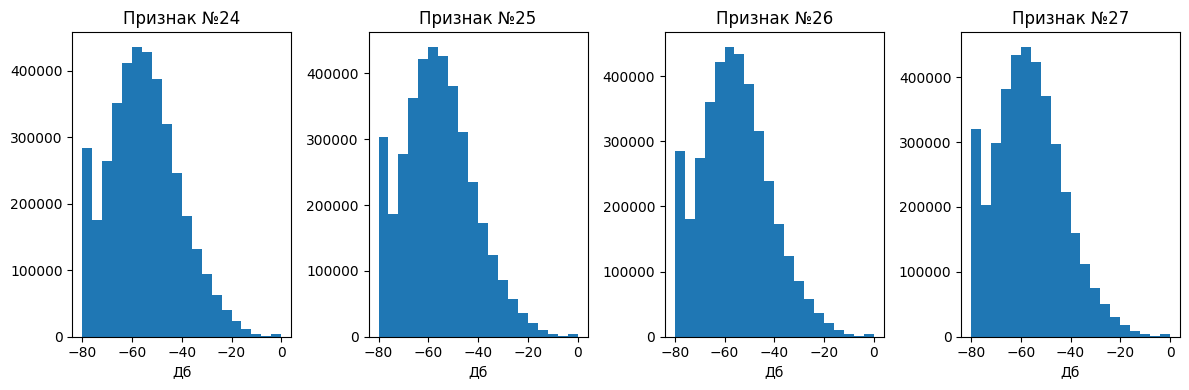

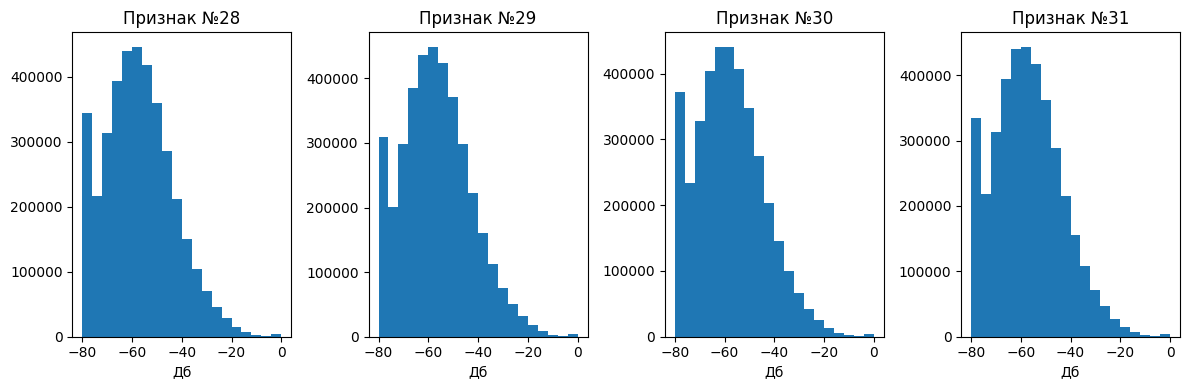

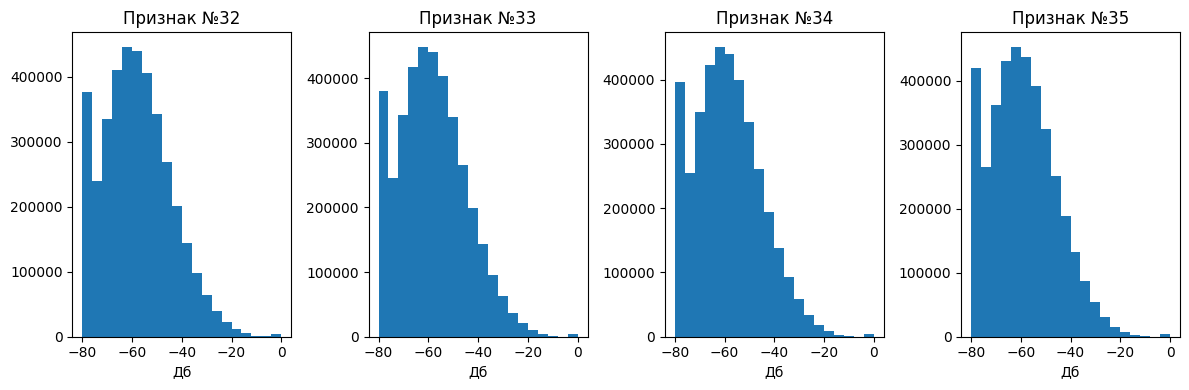

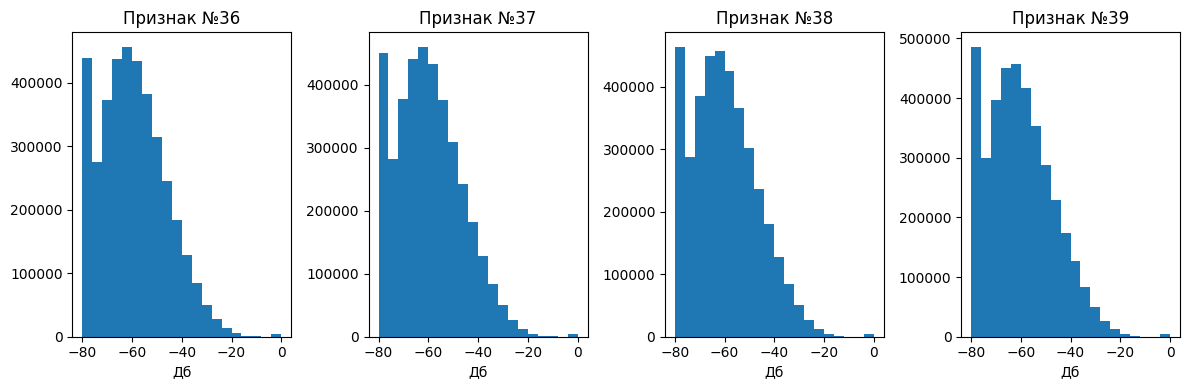

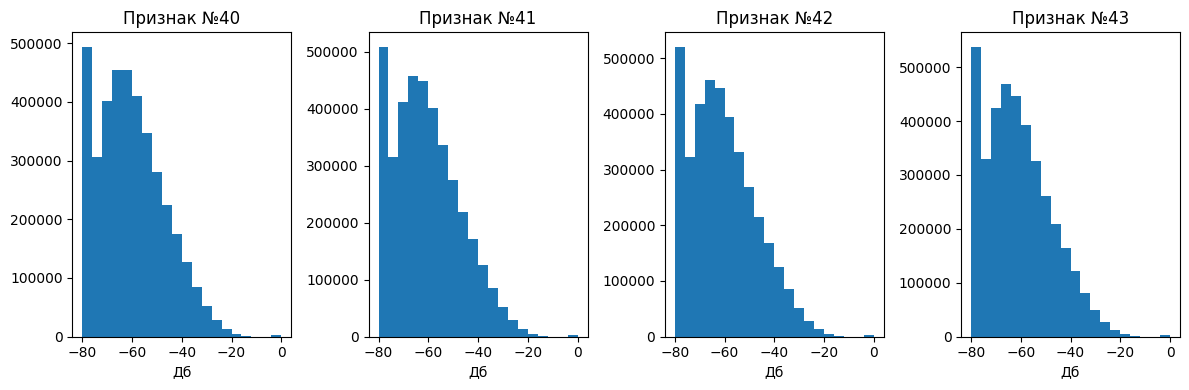

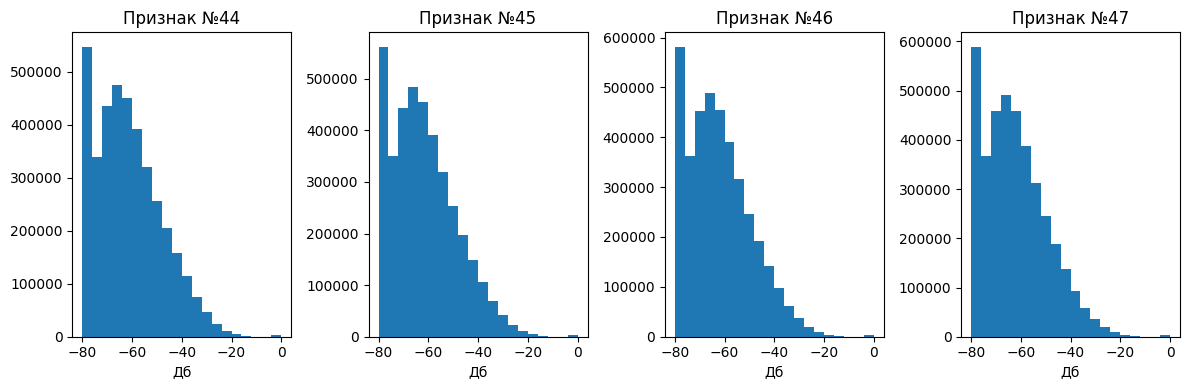

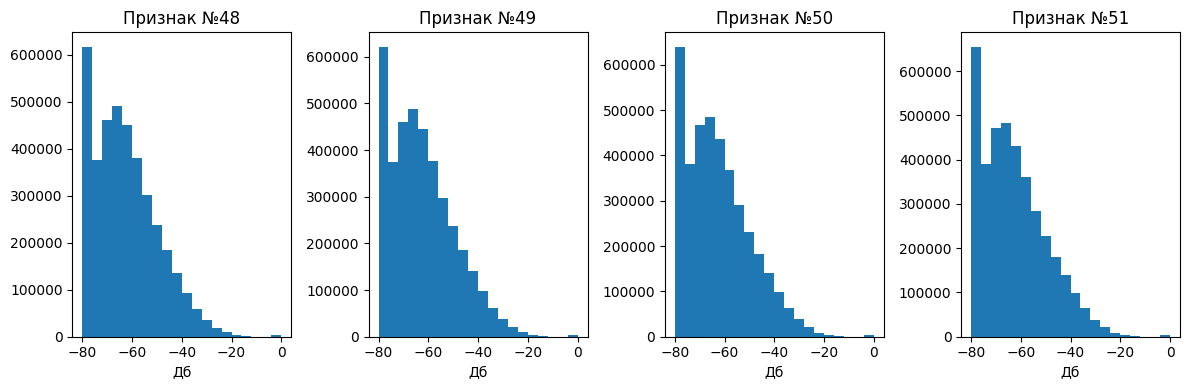

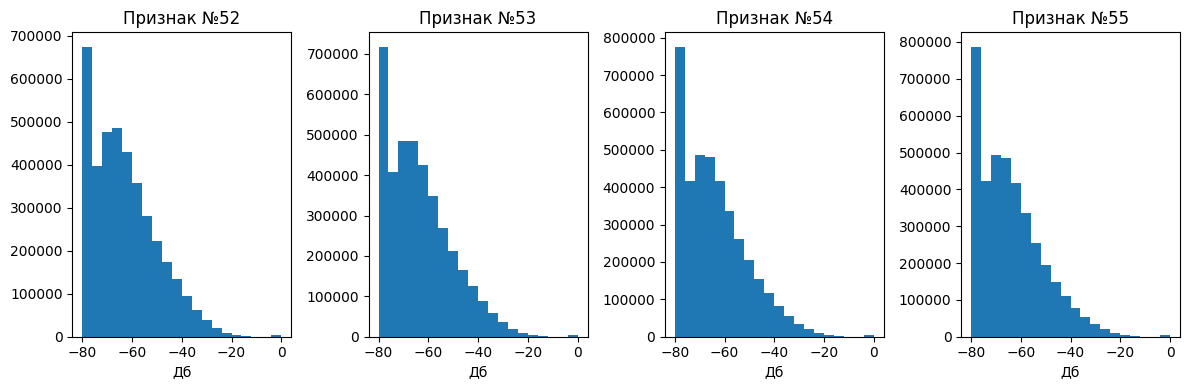

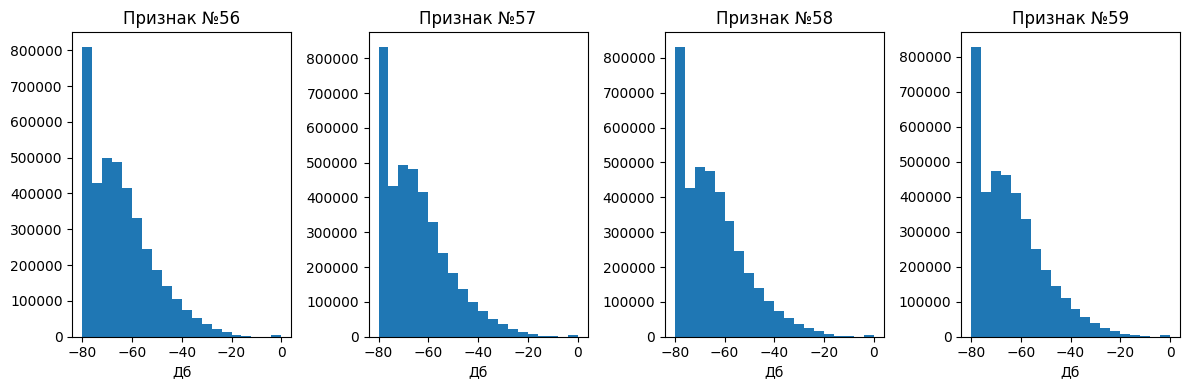

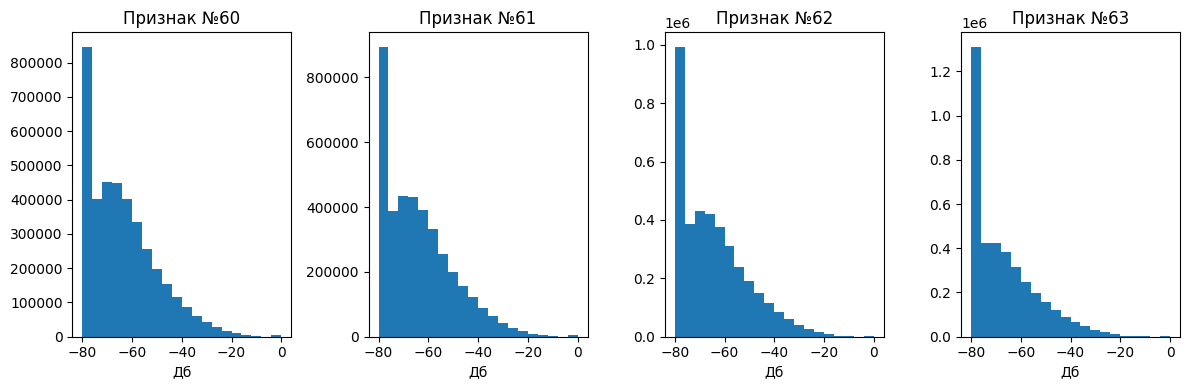

In [6]:
plot_features_hist(df=train_df_mfcc, n_bins=20, x_count=4, y_count=16)

4. Изучите имеющиеся данные:
  - Постройте гистограммы для **всех предикторов**, разделив для каждого данные по эмоциям,
  - Оцените количество данных с отсутствующими параметрами.

Пример построения гистограмм признаков для двух классов:

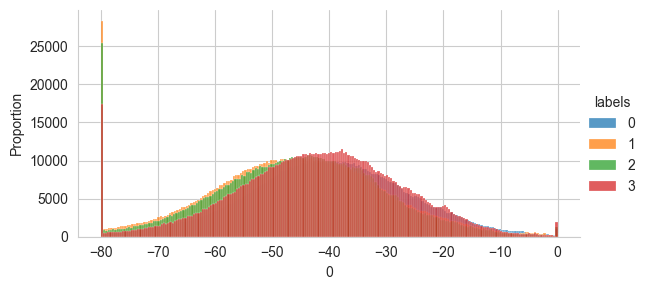

Процент нулевых значений ненулевого предиктора:  2.215886915465006 %


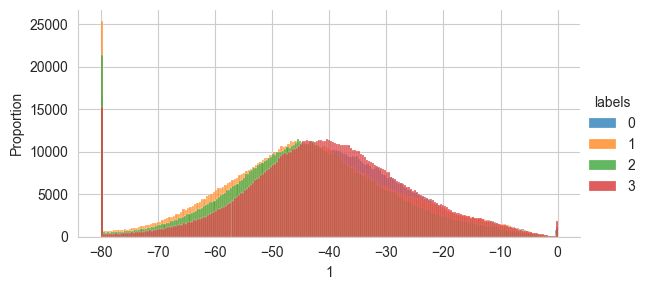

Процент нулевых значений ненулевого предиктора:  1.9901052844763085 %


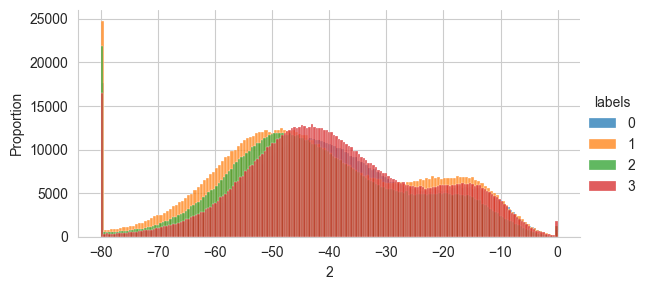

Процент нулевых значений ненулевого предиктора:  2.042575298743698 %


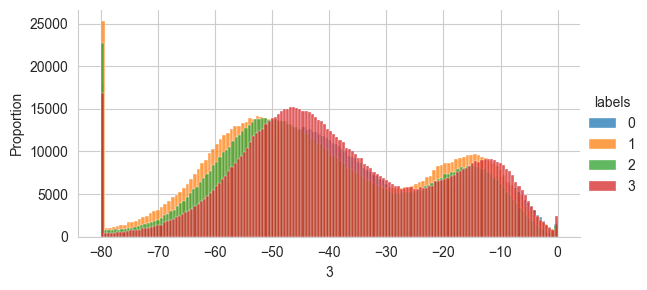

Процент нулевых значений ненулевого предиктора:  2.0789883491187964 %


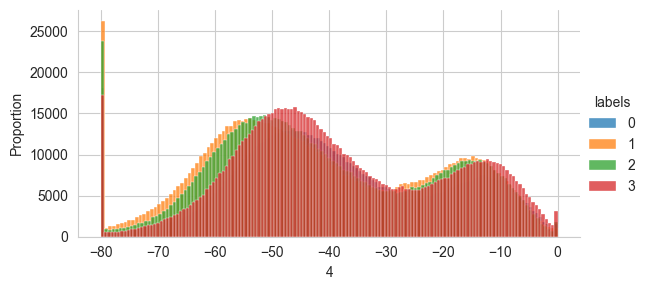

Процент нулевых значений ненулевого предиктора:  2.136094164251863 %


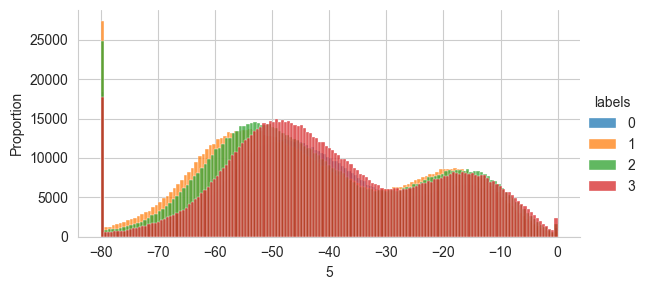

Процент нулевых значений ненулевого предиктора:  2.212830912659699 %


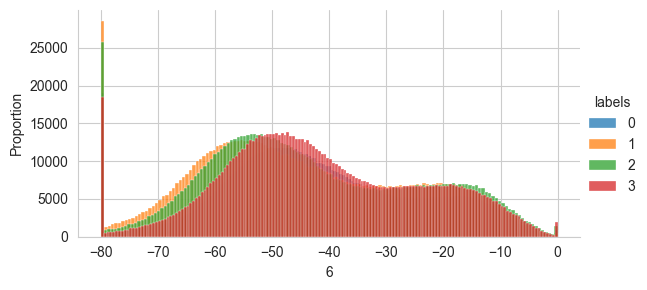

Процент нулевых значений ненулевого предиктора:  2.296042243282168 %


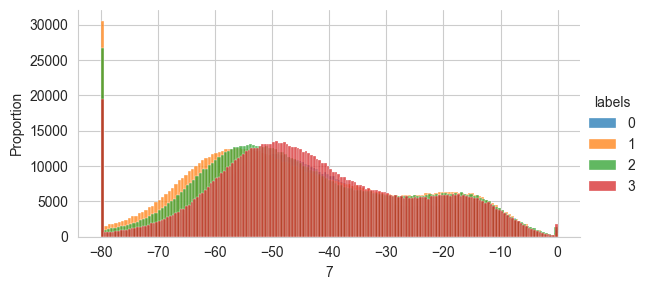

Процент нулевых значений ненулевого предиктора:  2.414734284440828 %


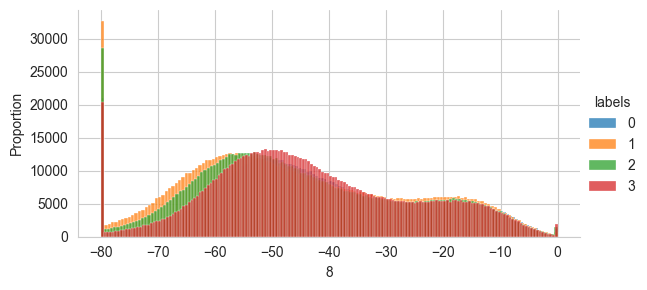

Процент нулевых значений ненулевого предиктора:  2.559609536075466 %


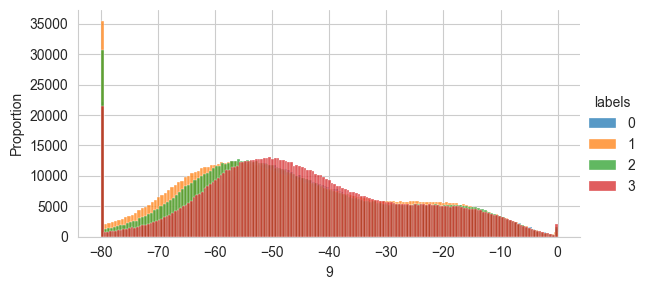

Процент нулевых значений ненулевого предиктора:  2.7261875872935546 %


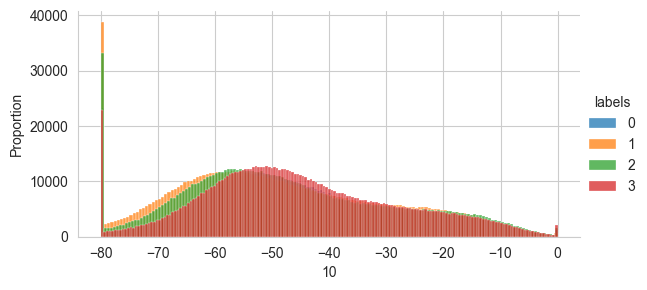

Процент нулевых значений ненулевого предиктора:  2.9247241763230742 %


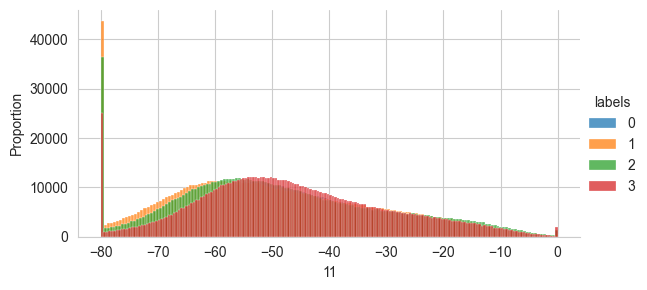

Процент нулевых значений ненулевого предиктора:  3.2276828273102023 %


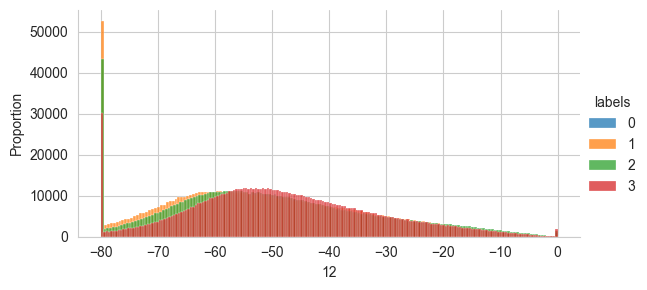

Процент нулевых значений ненулевого предиктора:  3.8519361461162998 %


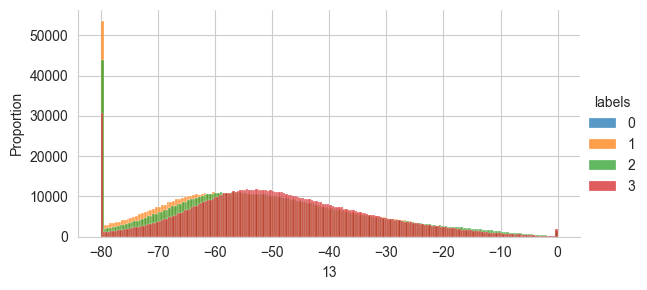

Процент нулевых значений ненулевого предиктора:  3.9423472121614407 %


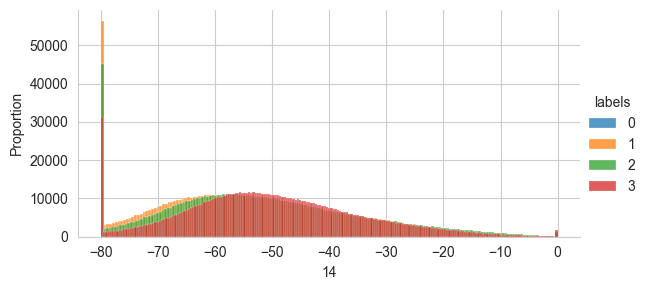

Процент нулевых значений ненулевого предиктора:  4.061531321568413 %


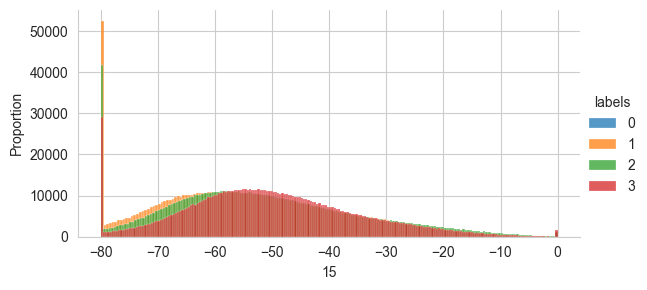

Процент нулевых значений ненулевого предиктора:  3.7883557487685993 %


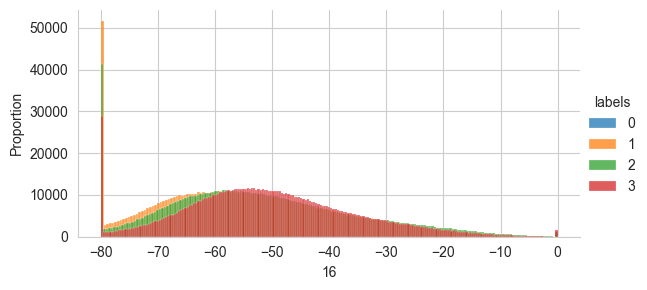

Процент нулевых значений ненулевого предиктора:  3.7471774058835305 %


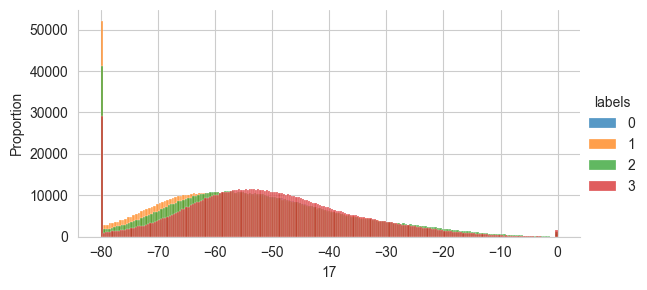

Процент нулевых значений ненулевого предиктора:  3.760981215165129 %


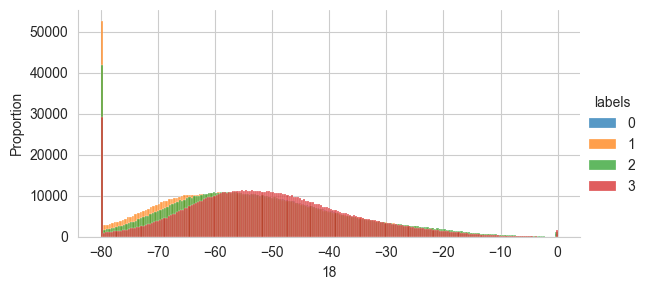

Процент нулевых значений ненулевого предиктора:  3.792369989741672 %


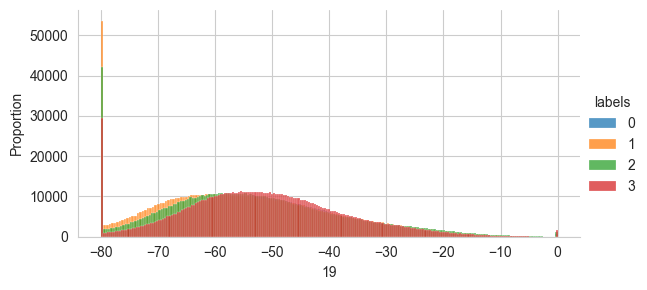

Процент нулевых значений ненулевого предиктора:  3.844140749129881 %


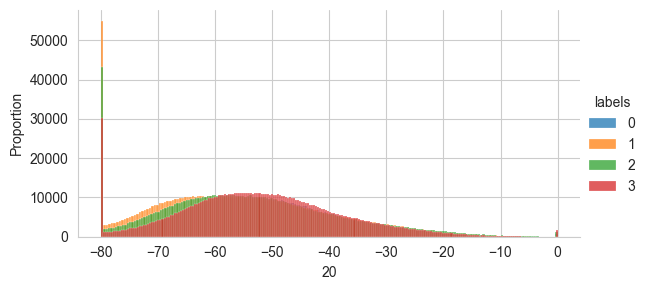

Процент нулевых значений ненулевого предиктора:  3.942839280409753 %


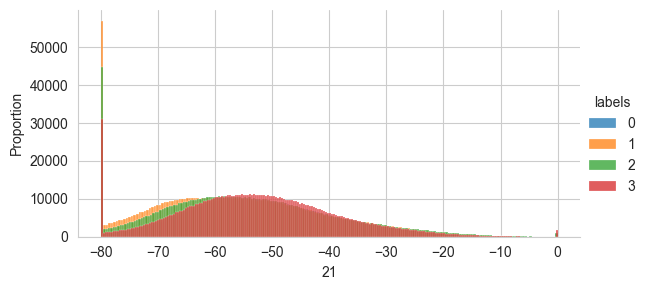

Процент нулевых значений ненулевого предиктора:  4.074843062601699 %


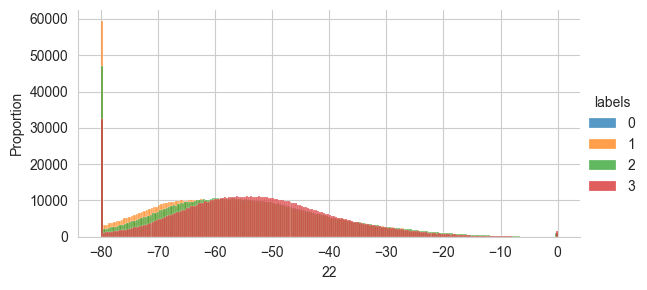

Процент нулевых значений ненулевого предиктора:  4.239711824115125 %


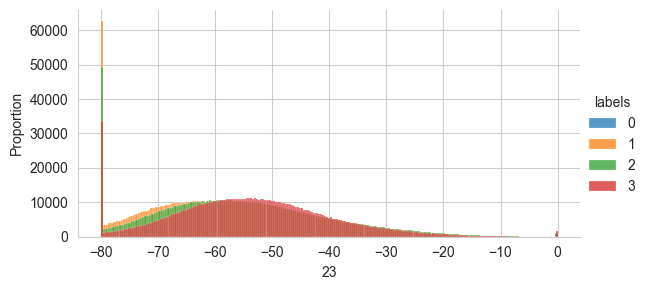

Процент нулевых значений ненулевого предиктора:  4.431048677721973 %


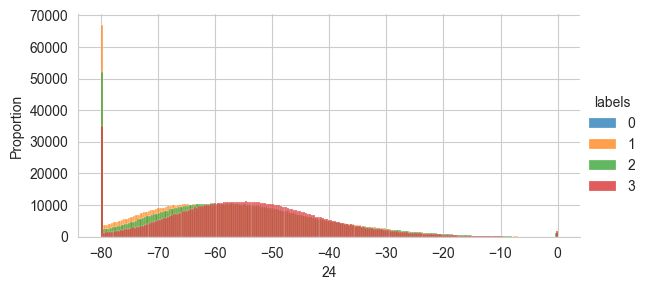

Процент нулевых значений ненулевого предиктора:  4.6589280733482115 %


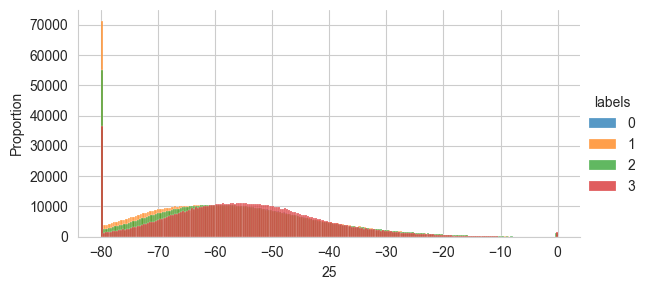

Процент нулевых значений ненулевого предиктора:  4.909364913410232 %


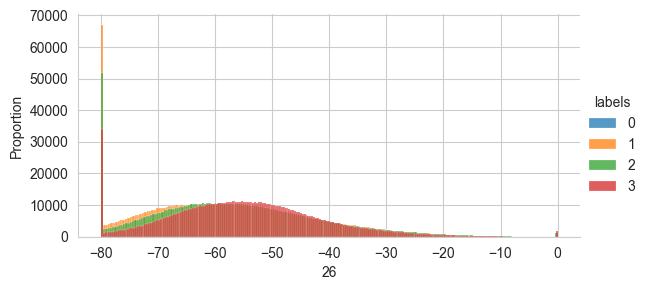

Процент нулевых значений ненулевого предиктора:  4.60754578889288 %


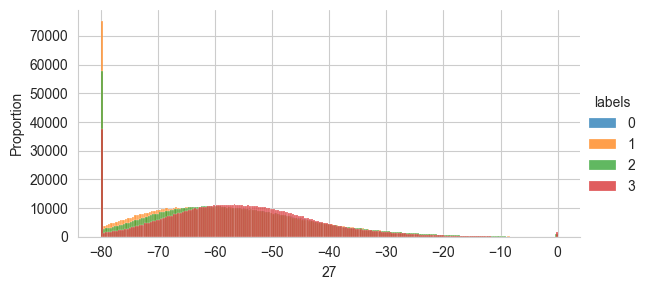

Процент нулевых значений ненулевого предиктора:  5.12100605684217 %


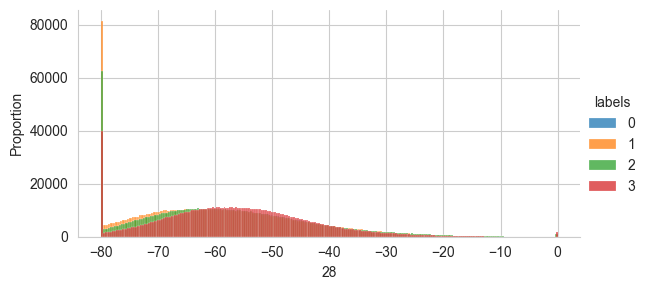

Процент нулевых значений ненулевого предиктора:  5.494278670680218 %


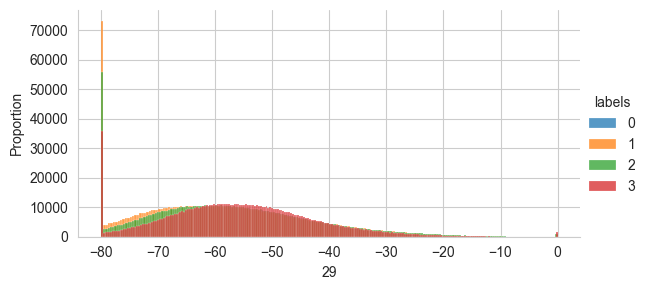

Процент нулевых значений ненулевого предиктора:  4.944819725617565 %


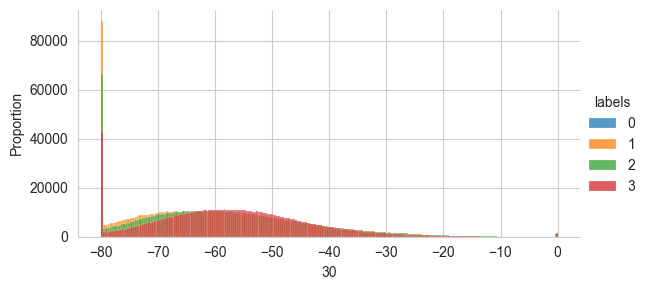

Процент нулевых значений ненулевого предиктора:  5.888606625880252 %


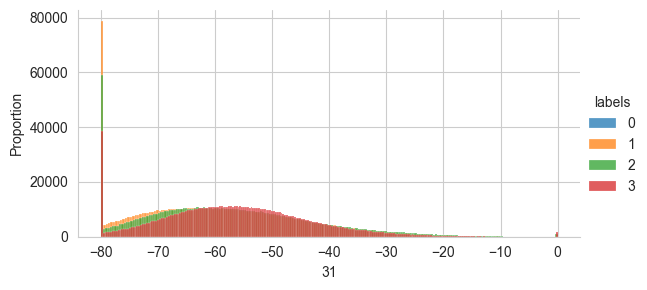

Процент нулевых значений ненулевого предиктора:  5.270154532738466 %


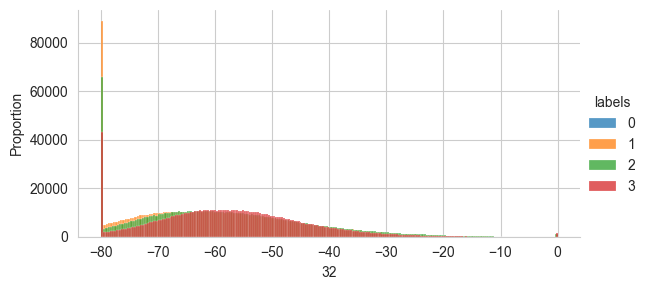

Процент нулевых значений ненулевого предиктора:  5.899639313973988 %


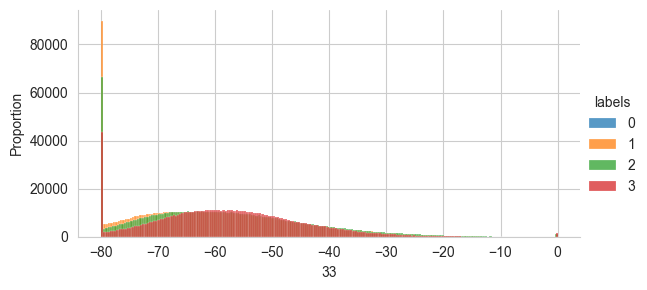

Процент нулевых значений ненулевого предиктора:  5.94480599950327 %


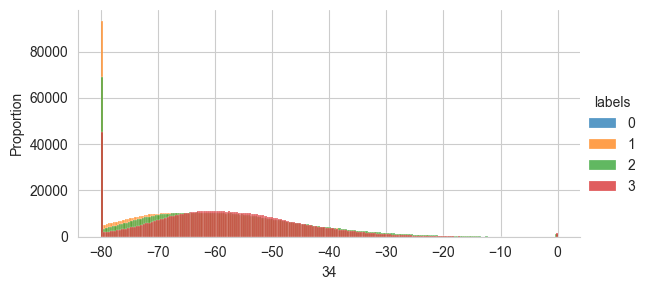

Процент нулевых значений ненулевого предиктора:  6.17496444806906 %


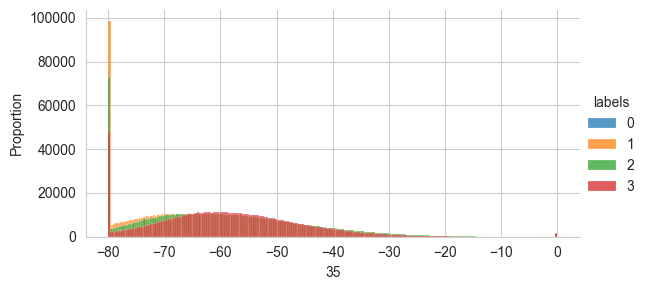

Процент нулевых значений ненулевого предиктора:  6.514336149431285 %


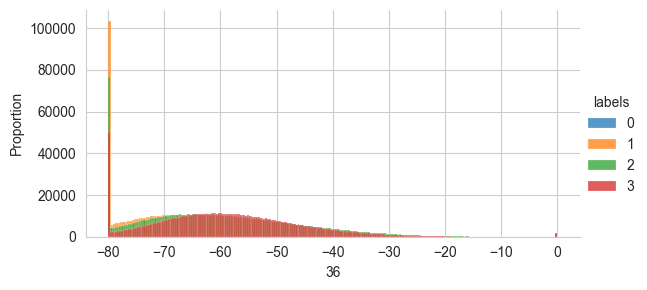

Процент нулевых значений ненулевого предиктора:  6.828068505223564 %


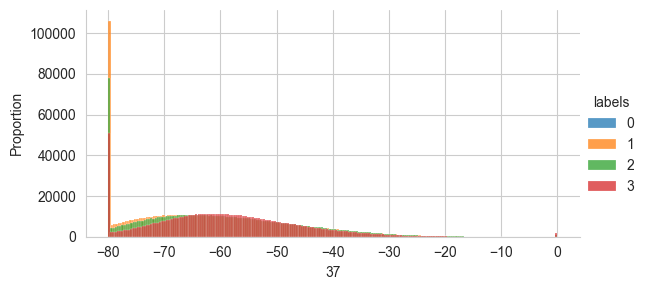

Процент нулевых значений ненулевого предиктора:  6.9517071271942035 %


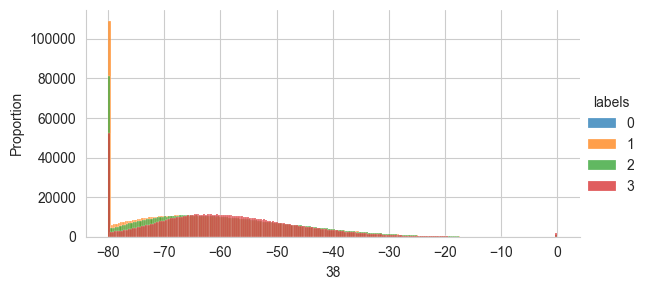

Процент нулевых значений ненулевого предиктора:  7.1570031800558 %


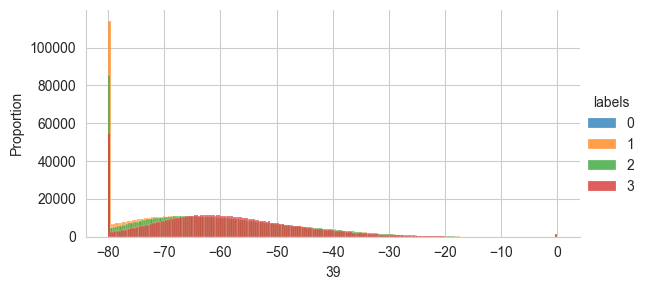

Процент нулевых значений ненулевого предиктора:  7.493785048532173 %


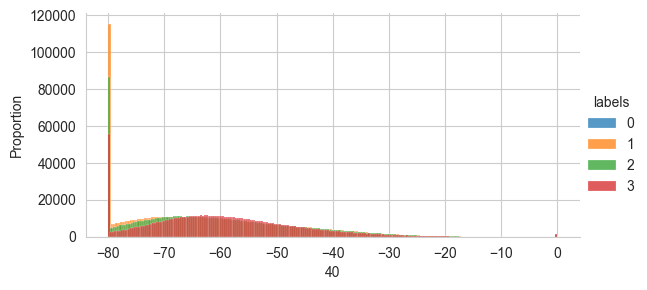

Процент нулевых значений ненулевого предиктора:  7.567595285778994 %


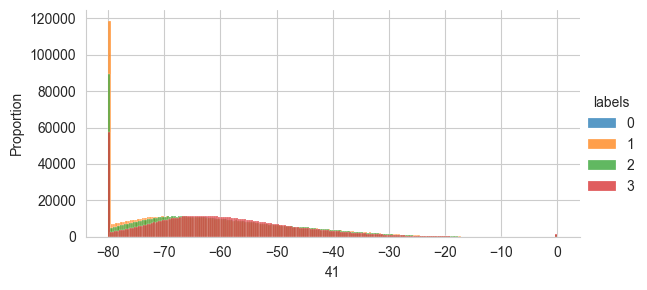

Процент нулевых значений ненулевого предиктора:  7.788430335955712 %


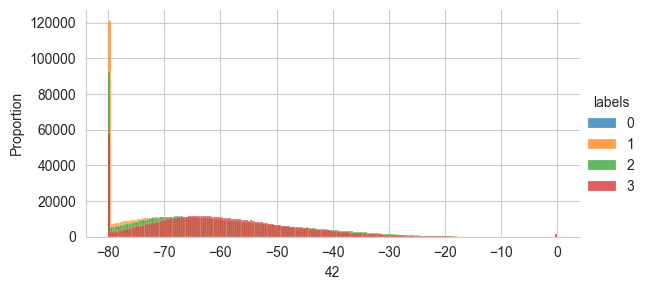

Процент нулевых значений ненулевого предиктора:  7.95749462674422 %


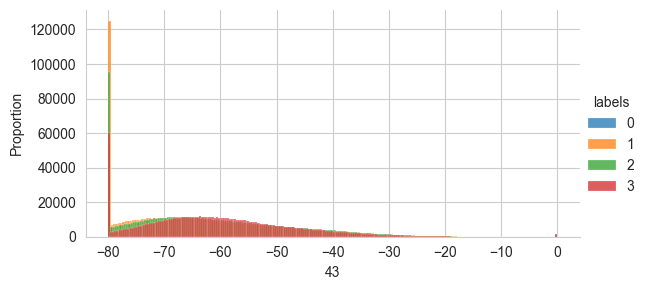

Процент нулевых значений ненулевого предиктора:  8.2068955336519 %


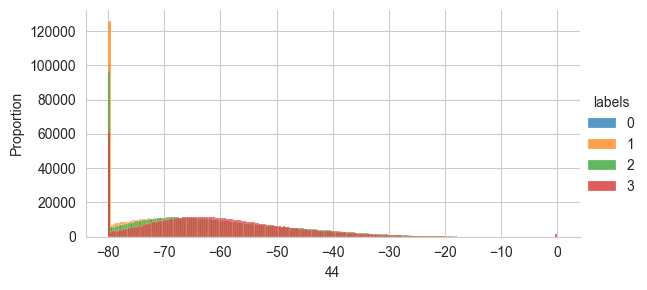

Процент нулевых значений ненулевого предиктора:  8.310255764126309 %


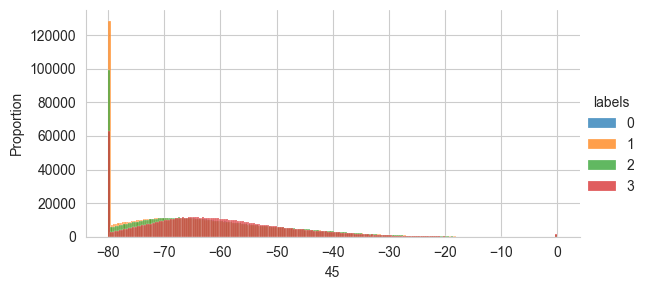

Процент нулевых значений ненулевого предиктора:  8.497008613525194 %


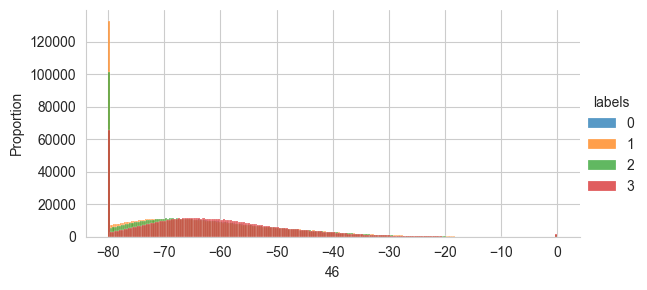

Процент нулевых значений ненулевого предиктора:  8.794813497069475 %


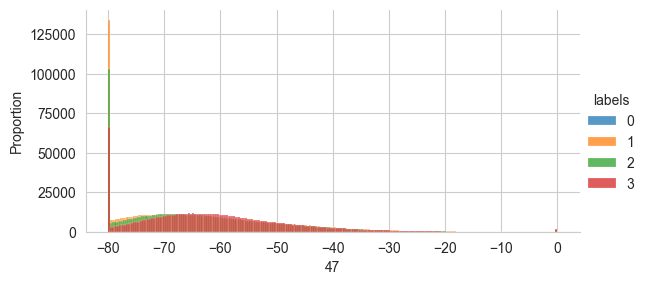

Процент нулевых значений ненулевого предиктора:  8.887115141121289 %


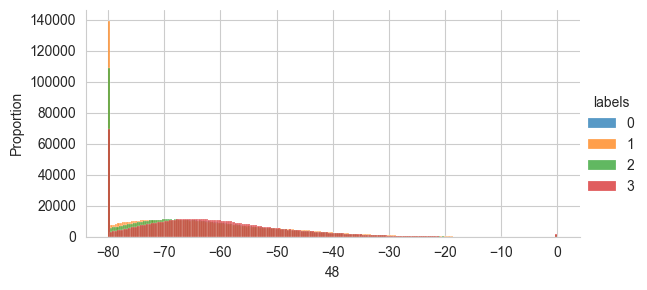

Процент нулевых значений ненулевого предиктора:  9.31454116060253 %


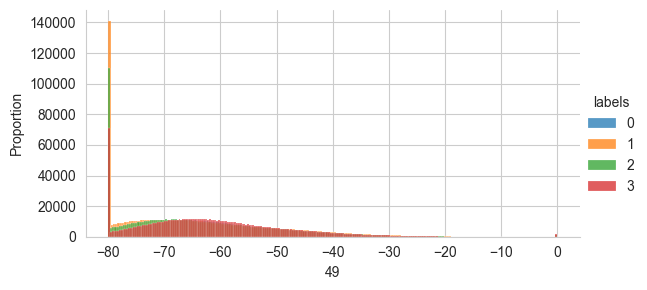

Процент нулевых значений ненулевого предиктора:  9.438076189257735 %


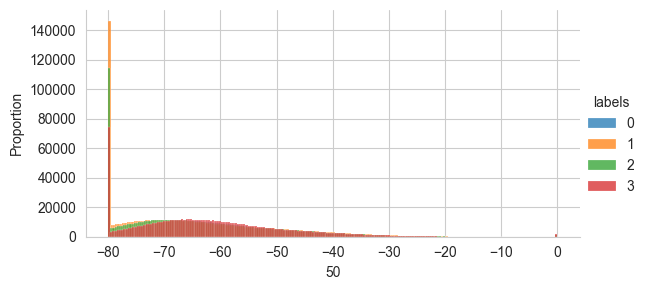

Процент нулевых значений ненулевого предиктора:  9.800575098290633 %


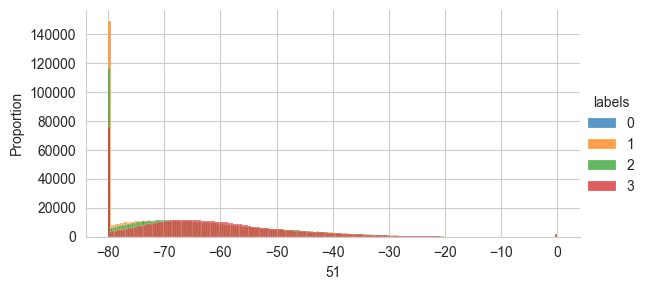

Процент нулевых значений ненулевого предиктора:  9.999008094004719 %


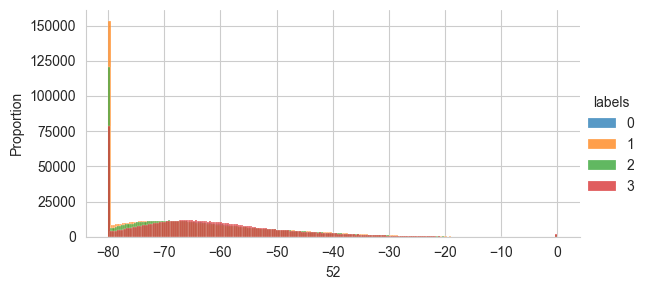

Процент нулевых значений ненулевого предиктора:  10.296295010971827 %


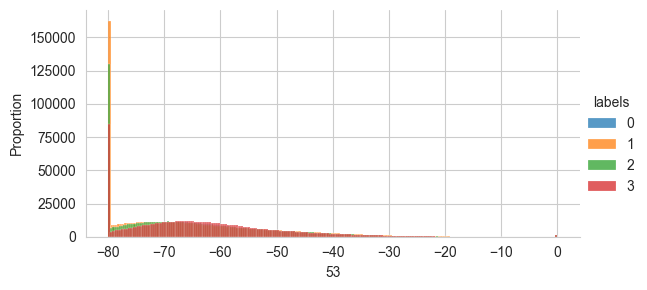

Процент нулевых значений ненулевого предиктора:  11.004096338675554 %


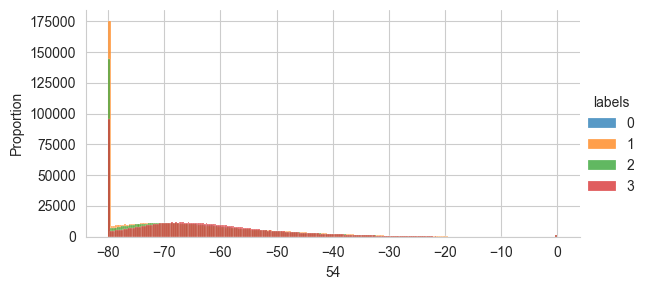

Процент нулевых значений ненулевого предиктора:  12.142405586994688 %


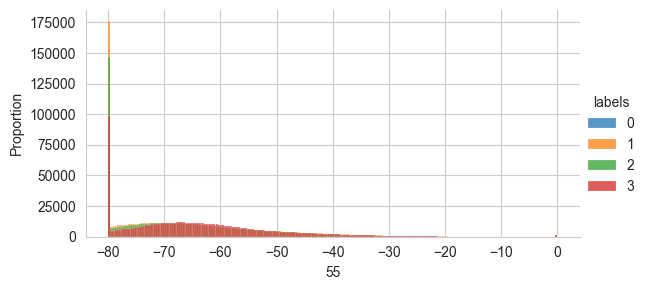

Процент нулевых значений ненулевого предиктора:  12.350835337648167 %


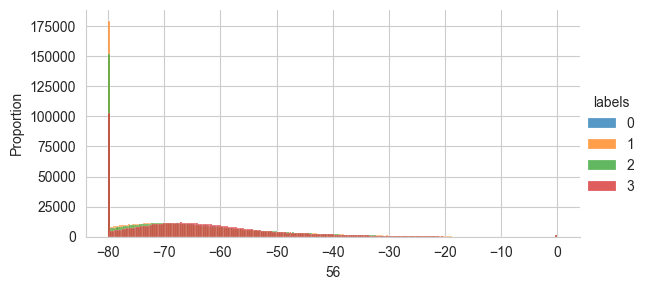

Процент нулевых значений ненулевого предиктора:  12.739491558828183 %


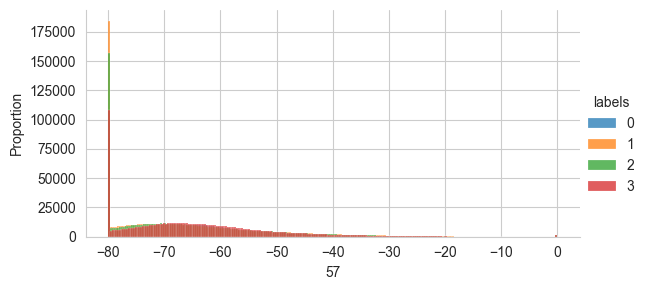

Процент нулевых значений ненулевого предиктора:  13.229980009079952 %


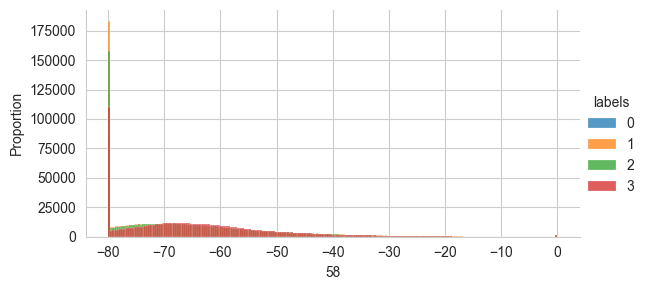

Процент нулевых значений ненулевого предиктора:  13.248160635938644 %


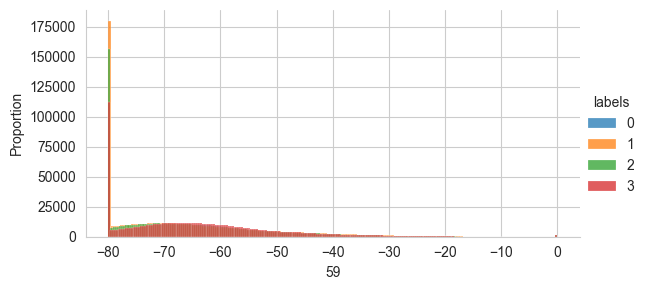

Процент нулевых значений ненулевого предиктора:  13.295502781092045 %


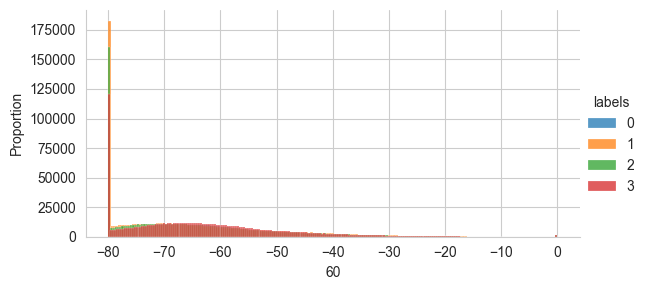

Процент нулевых значений ненулевого предиктора:  13.853352784704862 %


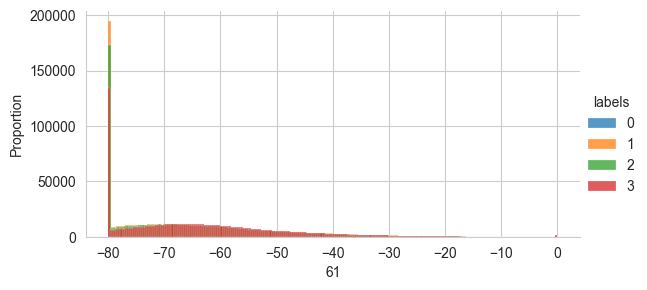

Процент нулевых значений ненулевого предиктора:  15.114264721840293 %


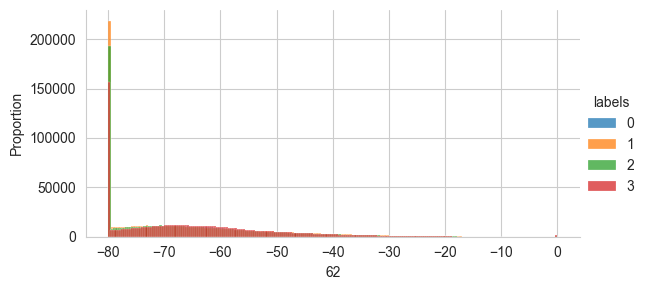

Процент нулевых значений ненулевого предиктора:  17.320465662312206 %


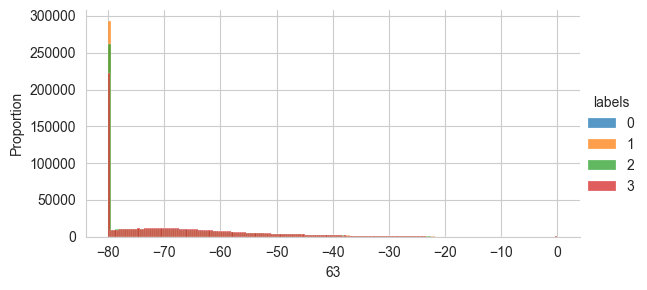

Процент нулевых значений ненулевого предиктора:  24.026760225242946 %


In [63]:
for i in range(64):
  sns.set_style("whitegrid")
  feature_plot = sns.FacetGrid(train_df_mfcc, hue='labels', aspect=2)
  feature_plot.map(sns.histplot, i, kde=False)
  # feature_plot.set(xlim=(0, df['0'].max()))
  feature_plot.add_legend()
  feature_plot.set_axis_labels(i, 'Proportion')
  plt.show()
  print("Процент нулевых значений ненулевого предиктора: ", (train_df_mfcc[i] == -80).sum() / (train_df_mfcc[i] == -80).count() * 100, "%")

In [6]:
lab2emo = {0: 'neutral', 1: 'angry', 2: 'positive', 3: 'sad'}
def label_to_emo(label):
    return lab2emo[label]

emotions = train_df_mfcc['labels'].values
emotions = np.vectorize(label_to_emo)(emotions)
train_df_mfcc.loc[:, "emotion"] = emotions
emotions = []
train_df_mfcc

0          1          2          3          4          5  \
0       -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1       -80.000000 -76.883591 -70.405769 -65.811974 -62.634987 -60.392197   
2       -67.807159 -57.055588 -57.000595 -52.954254 -50.250671 -51.740013   
3       -40.508720 -36.214897 -36.039444 -31.506943 -27.027981 -26.953735   
4       -34.425884 -29.212101 -24.018187 -21.930849 -21.412628 -21.794739   
...            ...        ...        ...        ...        ...        ...   
3861248 -17.903545 -20.681564 -28.710524 -49.750229 -47.501701 -48.737038   
3861249 -13.128126 -23.411379 -31.479027 -35.766365 -41.259163 -45.817207   
3861250 -18.975983 -23.933968 -32.402039 -49.665848 -49.505104 -51.067848   
3861251 -13.758670 -21.667059 -31.655607 -41.092331 -44.781830 -51.940529   
3861252 -12.206067 -22.871271 -33.919456 -36.673119 -40.924385 -41.812943   

                 6          7          8          9  ...         56  \
0       -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000   
1       -58.821587 -57.623779 -56.570175 -55.612419  ... -40.693855   
2       -53.363197 -52.527588 -50.729401 -48.510345  ... -34.176830   
3       -28.213249 -28.042803 -27.392399 -27.388414  ... -20.393019   
4       -22.783783 -24.143753 -25.635902 -27.182241  ... -35.942188   
...            ...        ...        ...        ...  ...        ...   
3861248 -51.345802 -51.942863 -60.874405 -70.309601  ... -78.801544   
3861249 -54.660439 -52.336861 -52.868408 -54.499985  ... -76.524734   
3861250 -55.605080 -55.702309 -56.217529 -54.702766  ... -73.447113   
3861251 -53.652069 -53.142532 -62.026230 -57.307030  ... -74.183861   
3861252 -41.841347 -43.931198 -48.192627 -49.813042  ... -78.009750   

                57         58         59         60         61         62  \
0       -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1       -40.885185 -41.474987 -42.756287 -44.502197 -46.850212 -49.823051   
2       -35.827187 -33.033722 -33.157963 -40.413300 -49.288689 -44.568535   
3       -20.489468 -28.056843 -29.760378 -24.653679 -27.739401 -34.643898   
4       -36.608353 -41.700478 -43.132378 -40.949505 -44.313934 -53.193459   
...            ...        ...        ...        ...        ...        ...   
3861248 -78.756805 -76.196404 -78.091537 -78.759666 -80.000000 -80.000000   
3861249 -76.371078 -77.527992 -79.192673 -79.711357 -79.662460 -80.000000   
3861250 -76.189064 -79.174690 -76.144073 -78.814247 -75.512459 -80.000000   
3861251 -70.774979 -71.626984 -77.206879 -77.745720 -73.372818 -76.944359   
3861252 -76.133247 -73.138962 -72.841827 -74.750702 -77.166420 -78.879967   

                63  labels  emotion  
0       -80.000000       1    angry  
1       -53.715179       1    angry  
2       -53.169670       1    angry  
3       -35.452629       1    angry  
4       -53.537804       1    angry  
...            ...     ...      ...  
3861248 -80.000000       3      sad  
3861249 -80.000000       3      sad  
3861250 -80.000000       3      sad  
3861251 -80.000000       3      sad  
3861252 -80.000000       3      sad  

[3861253 rows x 66 columns]

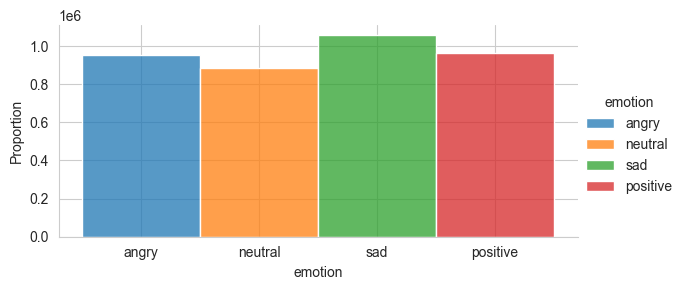

In [77]:
# До фильтрации
sns.set_style("whitegrid")
plot = sns.FacetGrid(train_df_mfcc, hue='emotion', aspect=2)
plot.map(sns.histplot, 'emotion', kde=False)
plot.add_legend()
plot.set_axis_labels('emotion', 'Proportion')
plt.show()

In [78]:
train_df_mfcc[['emotion']].groupby('emotion').value_counts()

emotion
angry        952476
neutral      887197
positive     965010
sad         1056570
Name: count, dtype: int64

5. Изучение проблемы неполных данных

- Проверьте - коррелируют ли показатели ненулевых предикторов с классом эмоции.
- Сделайте соответствующие выводы по итогам исследования.

<Axes: >

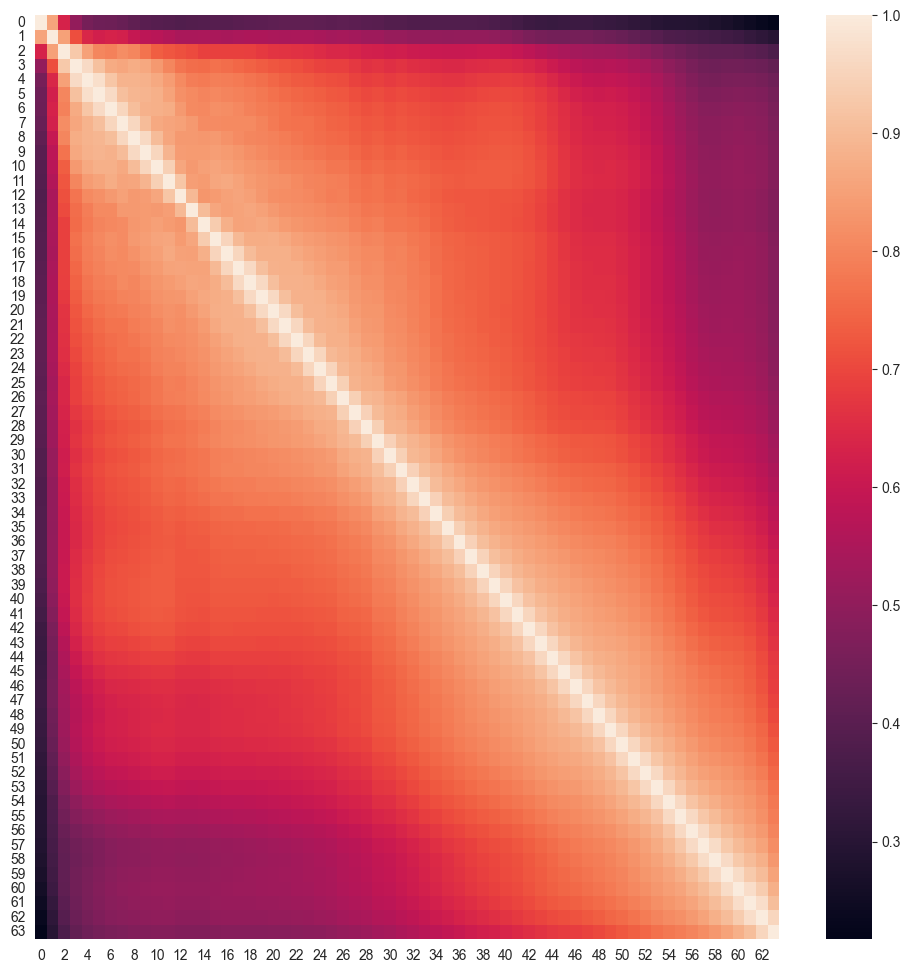

In [80]:
plt.figure(figsize=(12, 12))
sns.heatmap(train_df_mfcc.iloc[:, 0:64].corr())

6. Решение проблемы неполных данных

По результатам вашего исследования выявлена **зависимость/независимость** (*выберите нужное*) ненулевых предикаторов от типа эмоции.
- в случае наличия зависимости
  - предложите возможные решения проблемы
  - оцените (обоснуйте или опровергните разумность) удаления "поврежденных" строк из набора для дальнейшей работы и обучения модели
- в случае отсутствия наличия зависимости обоснуйте и переходите дальше.

7. Новые проблемы неполных данных

Если выявлена независимость, нулевые значения в ненулевых предикаторах по-прежнему являются ошибочными, и поэтому их не следует использовать при обучении модель.

Одним из возможных решений является замена этих значений некоторым распределением значений, близким к среднему значению.

Обратите внимание, что лучше всего вычислять эти значения **после** применения функции train_test_split, чтобы предотвратить еще одну форму утечки данных (т.е. данные тестирования не должны использоваться при вычислении среднего значения, которое будет использоваться во время вычисления).

**Задача**
- разделите данные на обучающую и тестовую выборку, решите проблему нулевых значений ненулевых предикаторов
  - ознакомьтесь с [Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html)
- постройте диаграммы, аналогичные пункту 4, для проверки результата замены.

In [7]:
test_df = pd.read_csv('../data/crowd_test_500.csv')
test_df_mfcc = get_mfcc_dataframe(test_df)
test_df_mfcc

0          1          2          3          4          5  \
0      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
...           ...        ...        ...        ...        ...        ...   
980102 -41.587181 -43.244518 -43.749817 -43.479080 -46.102676 -52.347836   
980103 -39.221893 -37.635803 -38.539513 -42.155914 -47.282478 -49.094490   
980104 -40.928696 -41.365173 -45.082550 -50.518040 -50.953934 -50.749924   
980105 -41.971535 -39.565987 -44.809994 -51.109329 -52.974403 -53.492493   
980106 -56.007397 -54.253857 -52.974113 -56.836800 -59.969704 -53.284023   

                6          7          8          9  ...         55         56  \
0      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
...           ...        ...        ...        ...  ...        ...        ...   
980102 -52.983719 -48.598316 -47.946281 -51.240734  ... -71.558212 -72.139526   
980103 -48.044449 -47.467445 -48.574780 -53.287762  ... -74.251839 -70.966827   
980104 -50.979752 -51.611313 -52.684010 -51.689838  ... -73.055443 -72.298203   
980105 -54.804207 -55.269230 -52.657898 -50.318672  ... -69.572609 -70.758102   
980106 -54.242123 -52.169651 -49.606026 -55.557758  ... -79.647102 -70.122437   

               57         58         59         60         61         62  \
0      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
...           ...        ...        ...        ...        ...        ...   
980102 -70.076393 -68.937477 -66.829536 -72.000465 -75.052322 -74.373070   
980103 -69.988670 -71.158974 -70.143799 -71.624565 -74.855591 -73.666176   
980104 -74.088737 -72.424965 -71.075424 -72.827637 -72.104942 -76.433044   
980105 -72.636566 -69.169823 -67.933083 -69.595184 -71.538033 -72.010414   
980106 -69.547081 -70.349892 -69.257225 -74.350349 -70.849327 -71.343575   

               63  labels  
0      -80.000000       0  
1      -80.000000       0  
2      -80.000000       0  
3      -80.000000       0  
4      -80.000000       0  
...           ...     ...  
980102 -73.690331       3  
980103 -74.563362       3  
980104 -76.392799       3  
980105 -74.555756       3  
980106 -73.998634       3  

[980107 rows x 65 columns]

In [8]:
emotions = test_df_mfcc['labels'].values
emotions = np.vectorize(label_to_emo)(emotions)
test_df_mfcc.loc[:, "emotion"] = emotions
emotions = []
test_df_mfcc

0          1          2          3          4          5  \
0      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
...           ...        ...        ...        ...        ...        ...   
980102 -41.587181 -43.244518 -43.749817 -43.479080 -46.102676 -52.347836   
980103 -39.221893 -37.635803 -38.539513 -42.155914 -47.282478 -49.094490   
980104 -40.928696 -41.365173 -45.082550 -50.518040 -50.953934 -50.749924   
980105 -41.971535 -39.565987 -44.809994 -51.109329 -52.974403 -53.492493   
980106 -56.007397 -54.253857 -52.974113 -56.836800 -59.969704 -53.284023   

                6          7          8          9  ...         56         57  \
0      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000  ... -80.000000 -80.000000   
...           ...        ...        ...        ...  ...        ...        ...   
980102 -52.983719 -48.598316 -47.946281 -51.240734  ... -72.139526 -70.076393   
980103 -48.044449 -47.467445 -48.574780 -53.287762  ... -70.966827 -69.988670   
980104 -50.979752 -51.611313 -52.684010 -51.689838  ... -72.298203 -74.088737   
980105 -54.804207 -55.269230 -52.657898 -50.318672  ... -70.758102 -72.636566   
980106 -54.242123 -52.169651 -49.606026 -55.557758  ... -70.122437 -69.547081   

               58         59         60         61         62         63  \
0      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
1      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
2      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
3      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
4      -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
...           ...        ...        ...        ...        ...        ...   
980102 -68.937477 -66.829536 -72.000465 -75.052322 -74.373070 -73.690331   
980103 -71.158974 -70.143799 -71.624565 -74.855591 -73.666176 -74.563362   
980104 -72.424965 -71.075424 -72.827637 -72.104942 -76.433044 -76.392799   
980105 -69.169823 -67.933083 -69.595184 -71.538033 -72.010414 -74.555756   
980106 -70.349892 -69.257225 -74.350349 -70.849327 -71.343575 -73.998634   

        labels  emotion  
0            0  neutral  
1            0  neutral  
2            0  neutral  
3            0  neutral  
4            0  neutral  
...        ...      ...  
980102       3      sad  
980103       3      sad  
980104       3      sad  
980105       3      sad  
980106       3      sad  

[980107 rows x 66 columns]

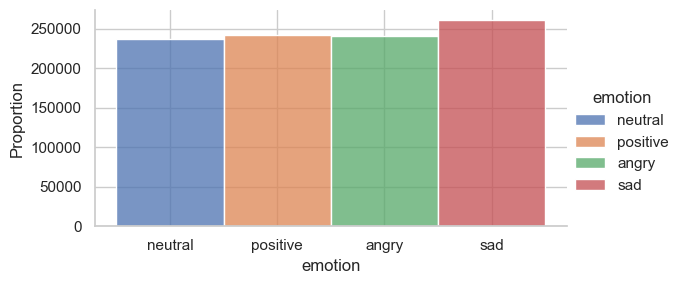

In [17]:
# До фильтрации
sns.set_style("whitegrid")
plot = sns.FacetGrid(test_df_mfcc, hue='emotion', aspect=2)
plot.map(sns.histplot, 'emotion', kde=False)
plot.add_legend()
plot.set_axis_labels('emotion', 'Proportion')
plt.show()

In [18]:
test_df_mfcc[['emotion']].groupby('emotion').value_counts()

emotion
angry       240750
neutral     236897
positive    242055
sad         260405
Name: count, dtype: int64

Фильтрация данных

In [9]:
# Фильтрация (Удаляем записи со значениями -80)
# np.delete(tmp, np.where((tmp == -80))[0], axis=0).shape
train_df_mfcc = train_df_mfcc[~train_df_mfcc.eq(-80).any(axis=1)]
train_df_mfcc

0          1          2          3          4          5  \
2       -67.807159 -57.055588 -57.000595 -52.954254 -50.250671 -51.740013   
3       -40.508720 -36.214897 -36.039444 -31.506943 -27.027981 -26.953735   
4       -34.425884 -29.212101 -24.018187 -21.930849 -21.412628 -21.794739   
35      -75.182297 -69.482292 -62.474823 -55.770988 -47.692352 -44.071838   
43      -62.793648 -60.805252 -62.161926 -52.627029 -52.239342 -51.878525   
...            ...        ...        ...        ...        ...        ...   
3860431 -37.803352 -42.942688 -49.793465 -53.293533 -54.624603 -57.928894   
3860436 -28.330595 -37.057320 -48.482254 -54.047737 -50.937851 -51.792320   
3860444 -37.527328 -42.805000 -46.242882 -51.408173 -53.561417 -50.360680   
3860446 -35.918152 -42.443924 -51.832253 -60.163910 -51.070267 -48.978172   
3860455 -35.815693 -44.436996 -54.716484 -57.972504 -58.906723 -59.941391   

                 6          7          8          9  ...         56  \
2       -53.363197 -52.527588 -50.729401 -48.510345  ... -34.176830   
3       -28.213249 -28.042803 -27.392399 -27.388414  ... -20.393019   
4       -22.783783 -24.143753 -25.635902 -27.182241  ... -35.942188   
35      -43.634933 -45.825874 -50.856026 -55.795288  ... -62.522789   
43      -45.095421 -43.074730 -45.406662 -47.189011  ... -64.167137   
...            ...        ...        ...        ...  ...        ...   
3860431 -60.271385 -58.007858 -56.503693 -57.132286  ... -79.173401   
3860436 -54.656456 -54.150017 -52.691978 -54.808823  ... -75.953575   
3860444 -50.393379 -53.640335 -58.772179 -57.575348  ... -70.013939   
3860446 -50.947121 -56.941109 -58.707588 -62.642395  ... -75.583069   
3860455 -61.179665 -63.485382 -65.070366 -60.616249  ... -77.980179   

                57         58         59         60         61         62  \
2       -35.827187 -33.033722 -33.157963 -40.413300 -49.288689 -44.568535   
3       -20.489468 -28.056843 -29.760378 -24.653679 -27.739401 -34.643898   
4       -36.608353 -41.700478 -43.132378 -40.949505 -44.313934 -53.193459   
35      -68.841751 -69.859276 -70.768097 -70.601982 -76.692879 -79.709412   
43      -66.115898 -67.877907 -65.122963 -67.999336 -74.400620 -78.868675   
...            ...        ...        ...        ...        ...        ...   
3860431 -79.853462 -76.065933 -75.864555 -79.946945 -77.033562 -77.756111   
3860436 -78.022247 -73.780121 -75.405952 -77.483231 -74.446037 -77.245949   
3860444 -72.424423 -67.850655 -65.498192 -69.408333 -74.387177 -75.425179   
3860446 -76.085808 -77.209076 -77.833115 -79.554184 -74.894035 -76.790375   
3860455 -76.030342 -77.737434 -73.758659 -76.692665 -77.053314 -76.320274   

                63  labels  emotion  
2       -53.169670       1    angry  
3       -35.452629       1    angry  
4       -53.537804       1    angry  
35      -79.604889       1    angry  
43      -78.456520       1    angry  
...            ...     ...      ...  
3860431 -75.235748       3      sad  
3860436 -79.957787       3      sad  
3860444 -75.362671       3      sad  
3860446 -79.827309       3      sad  
3860455 -79.498901       3      sad  

[2597921 rows x 66 columns]

In [27]:
# Второй вариант фильтрации
# Элементы, все значения коэффициентов которых равны -80.0 (тишина)
# df.loc[(df == [-80.0 for _ in range(64)]).all(axis=1)]
# train_df_mfcc = train_df_mfcc.loc[~(train_df_mfcc.iloc[:, 0:64] == [-80.0 for _ in range(64)]).all(axis=1)]

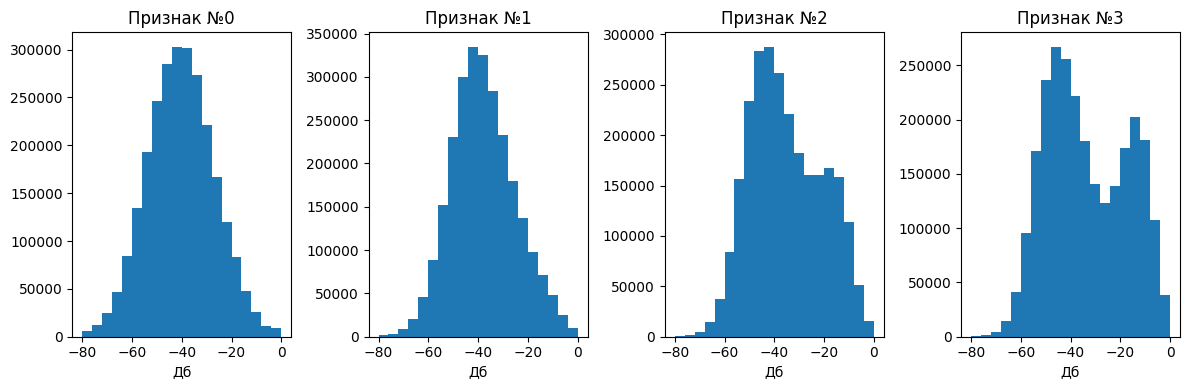

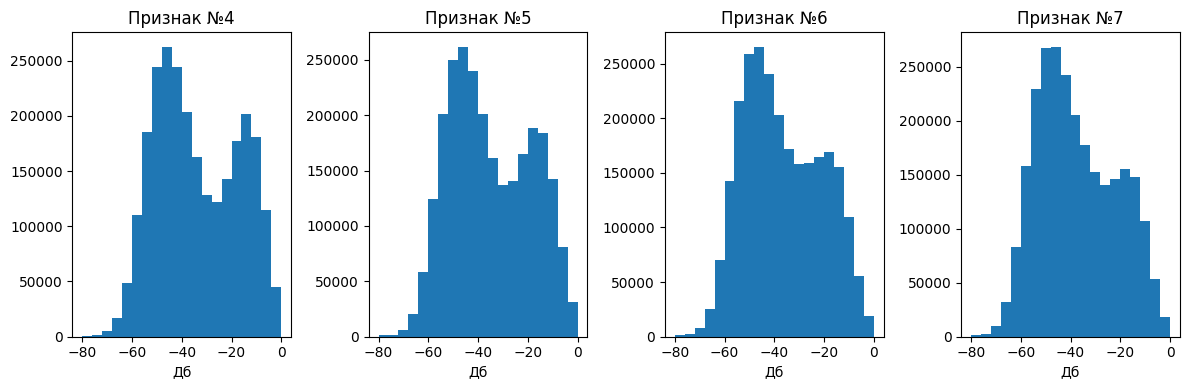

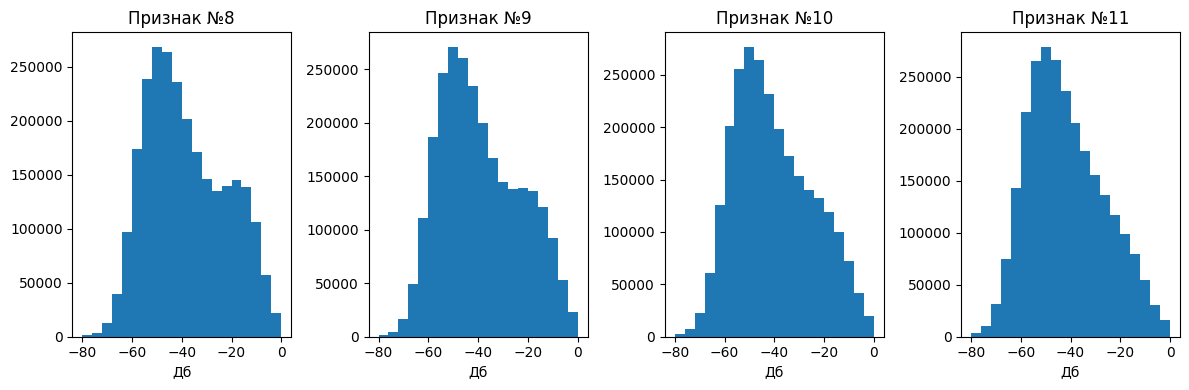

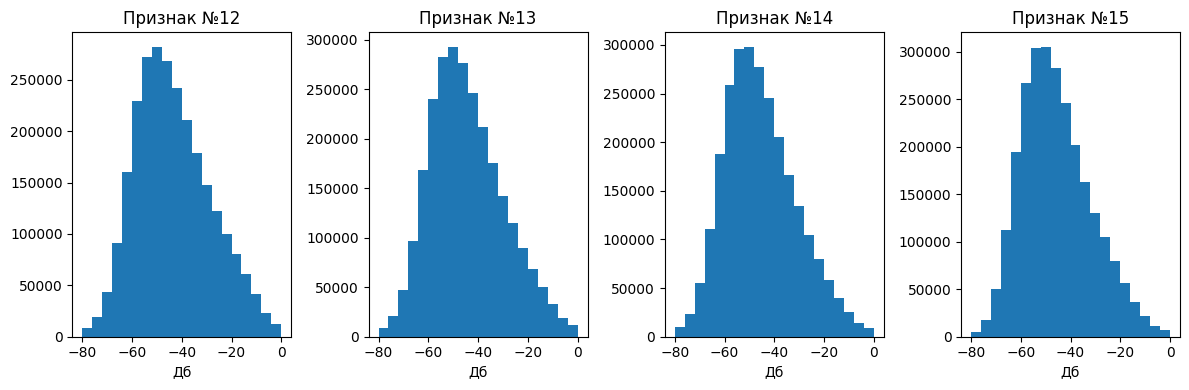

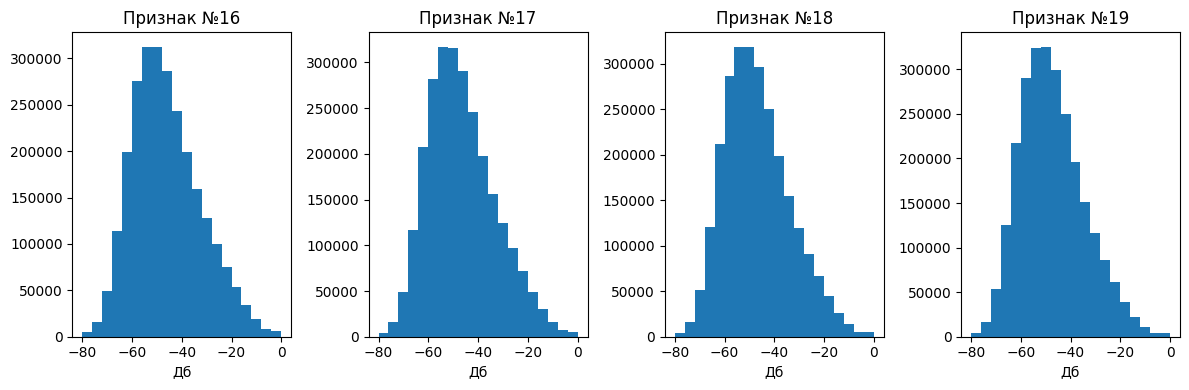

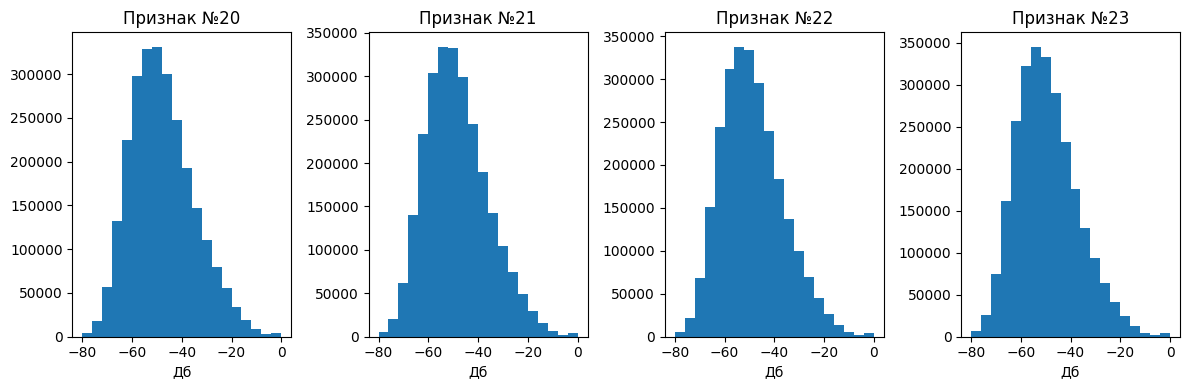

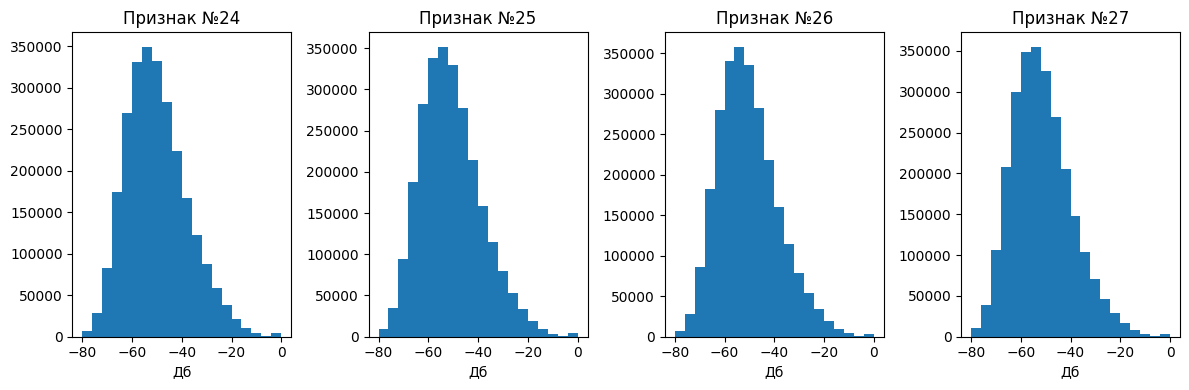

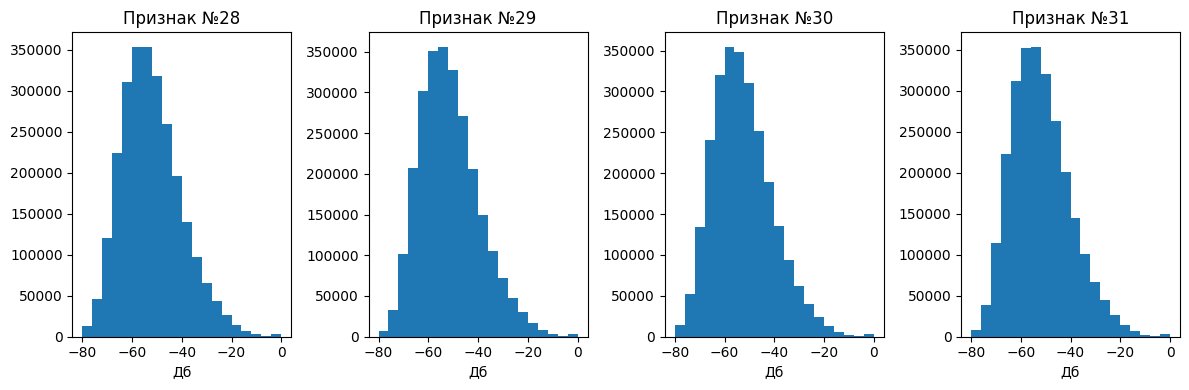

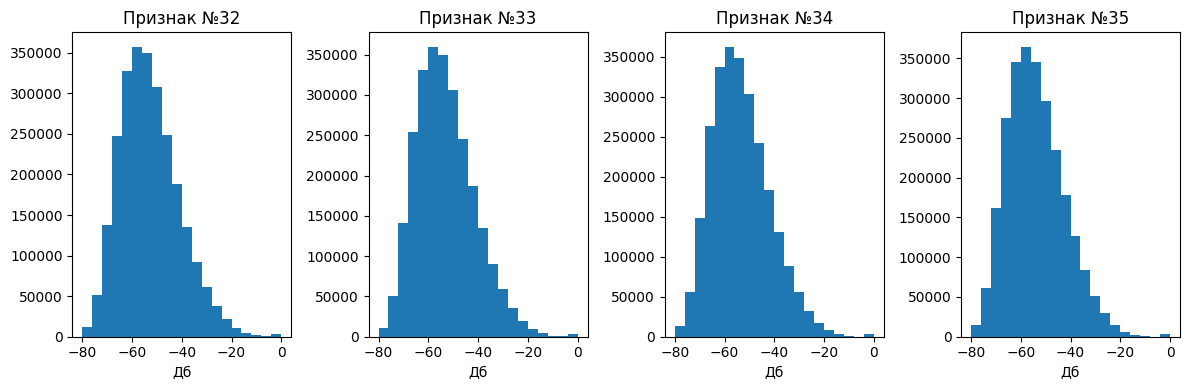

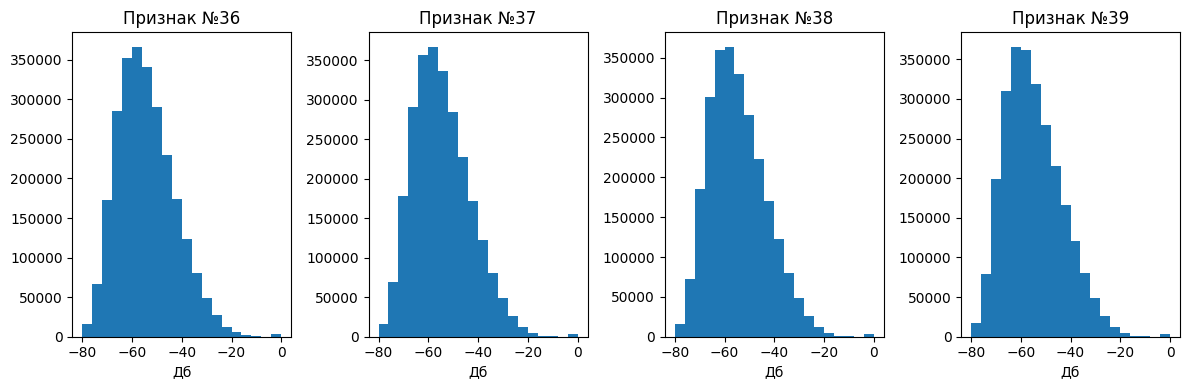

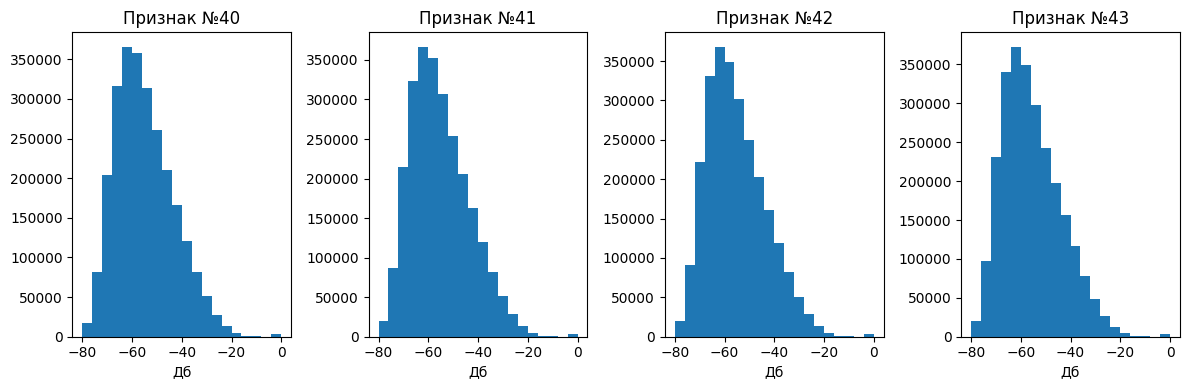

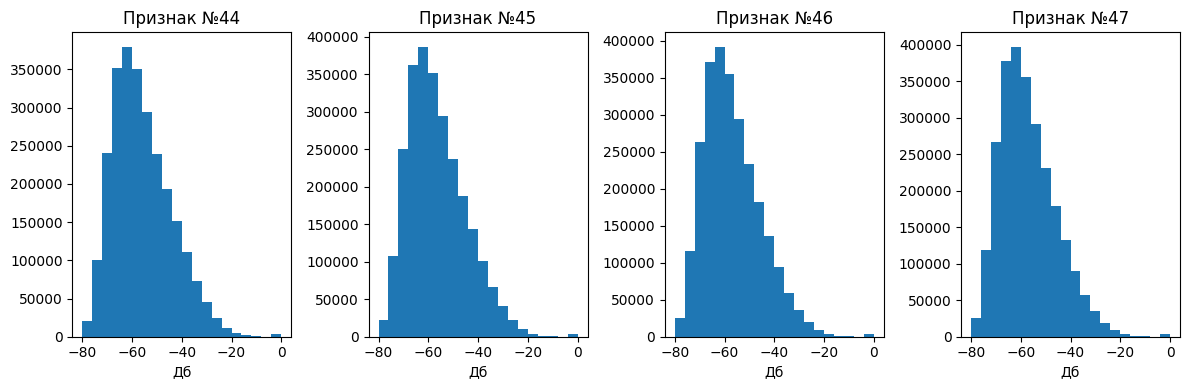

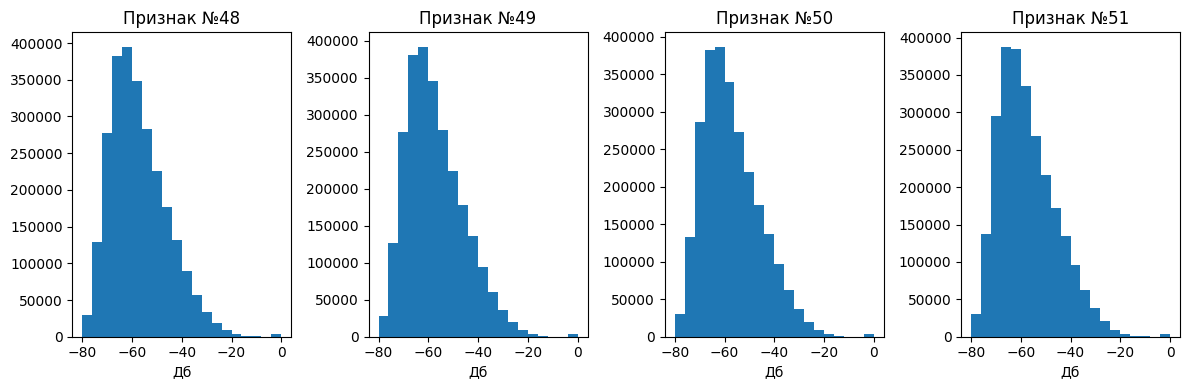

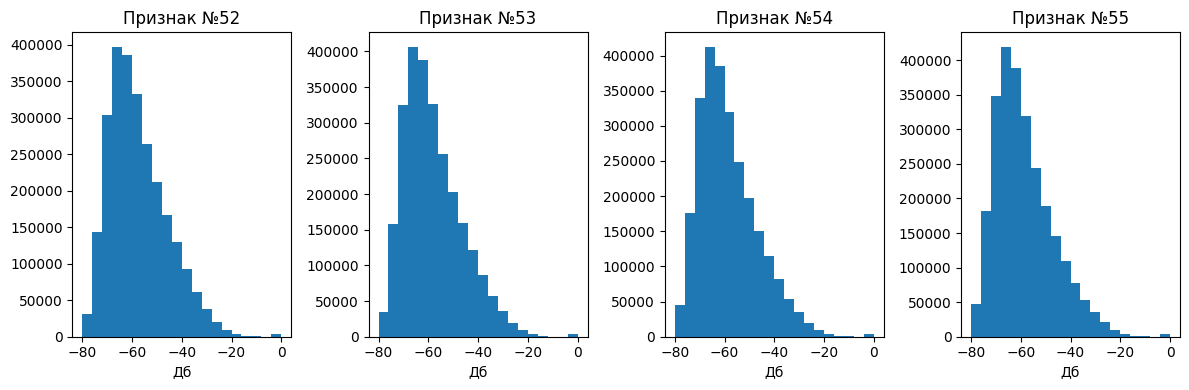

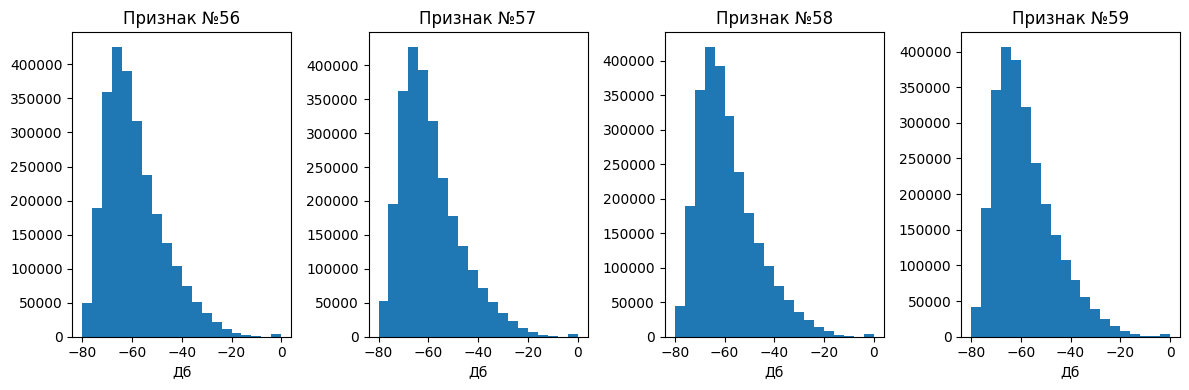

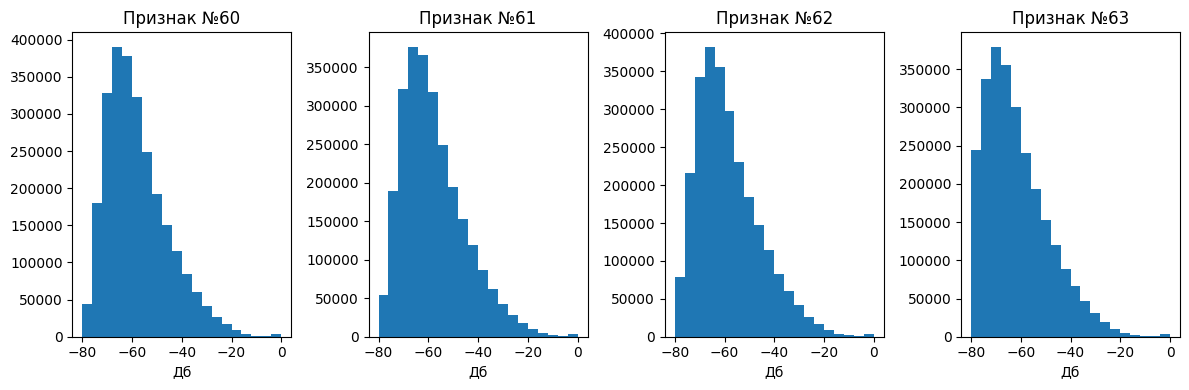

In [11]:
plot_features_hist(df=train_df_mfcc, n_bins=20, x_count=4, y_count=16)

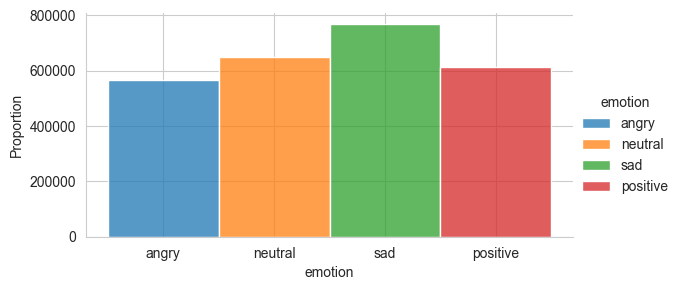

In [91]:
# После фильтрации
sns.set_style("whitegrid")
plot = sns.FacetGrid(train_df_mfcc, hue='emotion', aspect=2)
plot.map(sns.histplot, 'emotion', kde=False)
plot.add_legend()
plot.set_axis_labels('emotion', 'Proportion')
plt.show()

In [11]:
train_df_mfcc[['emotion']].groupby('emotion').value_counts()

emotion
angry       566148
neutral     648672
positive    614713
sad         768388
Name: count, dtype: int64

In [10]:
train_bin_df_mfcc = train_df_mfcc[(train_df_mfcc['emotion'] == 'sad') | (train_df_mfcc['emotion'] == 'positive')]
train_bin_df_mfcc

0          1          2          3          4          5  \
4084    -61.249706 -67.141014 -56.832409 -52.551510 -53.055534 -54.973831   
4085    -56.165768 -61.629139 -61.991451 -58.835011 -61.012157 -65.598625   
4086    -59.281033 -67.079796 -57.739285 -55.351574 -58.499523 -64.107262   
4089    -59.707005 -68.360268 -61.231853 -56.191151 -56.121090 -58.474514   
4090    -55.166065 -59.703983 -66.996796 -68.048691 -58.918293 -60.544865   
...            ...        ...        ...        ...        ...        ...   
3860431 -37.803352 -42.942688 -49.793465 -53.293533 -54.624603 -57.928894   
3860436 -28.330595 -37.057320 -48.482254 -54.047737 -50.937851 -51.792320   
3860444 -37.527328 -42.805000 -46.242882 -51.408173 -53.561417 -50.360680   
3860446 -35.918152 -42.443924 -51.832253 -60.163910 -51.070267 -48.978172   
3860455 -35.815693 -44.436996 -54.716484 -57.972504 -58.906723 -59.941391   

                 6          7          8          9  ...         56  \
4084    -57.445431 -60.810162 -63.498997 -65.037376  ... -74.994492   
4085    -61.680851 -60.030193 -63.148647 -72.414352  ... -69.794220   
4086    -64.656731 -62.325901 -59.745342 -58.458790  ... -70.893578   
4089    -63.363956 -73.873718 -76.129059 -72.740234  ... -74.775208   
4090    -64.860786 -64.442596 -67.146400 -66.852188  ... -73.020966   
...            ...        ...        ...        ...  ...        ...   
3860431 -60.271385 -58.007858 -56.503693 -57.132286  ... -79.173401   
3860436 -54.656456 -54.150017 -52.691978 -54.808823  ... -75.953575   
3860444 -50.393379 -53.640335 -58.772179 -57.575348  ... -70.013939   
3860446 -50.947121 -56.941109 -58.707588 -62.642395  ... -75.583069   
3860455 -61.179665 -63.485382 -65.070366 -60.616249  ... -77.980179   

                57         58         59         60         61         62  \
4084    -76.040863 -71.762878 -70.820358 -73.311134 -73.620552 -73.620583   
4085    -71.952751 -70.320839 -75.642120 -75.267113 -75.150810 -74.362343   
4086    -69.388397 -72.042870 -69.519295 -71.392319 -70.218399 -73.407791   
4089    -72.878899 -69.439621 -68.836205 -68.385925 -70.444809 -72.662338   
4090    -70.323975 -69.976242 -68.633842 -69.606422 -72.396179 -70.912201   
...            ...        ...        ...        ...        ...        ...   
3860431 -79.853462 -76.065933 -75.864555 -79.946945 -77.033562 -77.756111   
3860436 -78.022247 -73.780121 -75.405952 -77.483231 -74.446037 -77.245949   
3860444 -72.424423 -67.850655 -65.498192 -69.408333 -74.387177 -75.425179   
3860446 -76.085808 -77.209076 -77.833115 -79.554184 -74.894035 -76.790375   
3860455 -76.030342 -77.737434 -73.758659 -76.692665 -77.053314 -76.320274   

                63  labels  emotion  
4084    -76.709618       3      sad  
4085    -75.422470       3      sad  
4086    -72.383751       3      sad  
4089    -75.857300       3      sad  
4090    -70.292633       3      sad  
...            ...     ...      ...  
3860431 -75.235748       3      sad  
3860436 -79.957787       3      sad  
3860444 -75.362671       3      sad  
3860446 -79.827309       3      sad  
3860455 -79.498901       3      sad  

[1383101 rows x 66 columns]

In [ ]:
# Замена для будущей кластеризации
# df_pos_sad.loc[df["label"] == 3, "label"] = 0

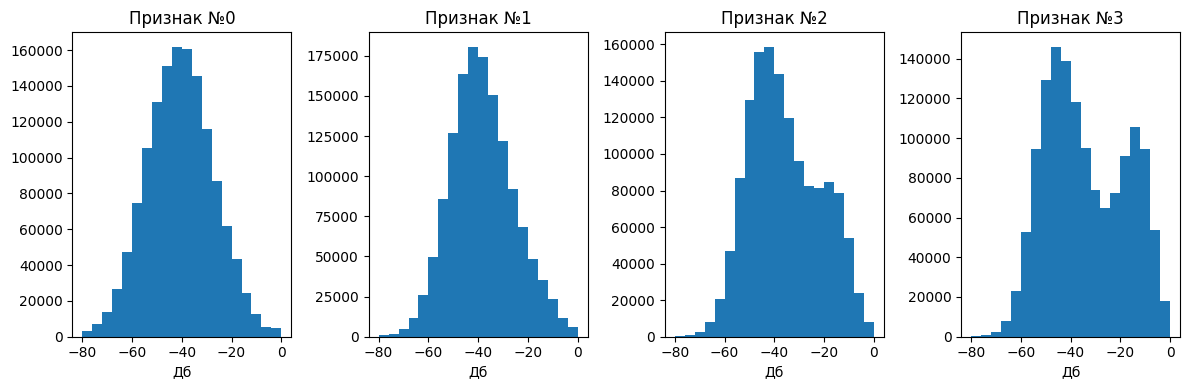

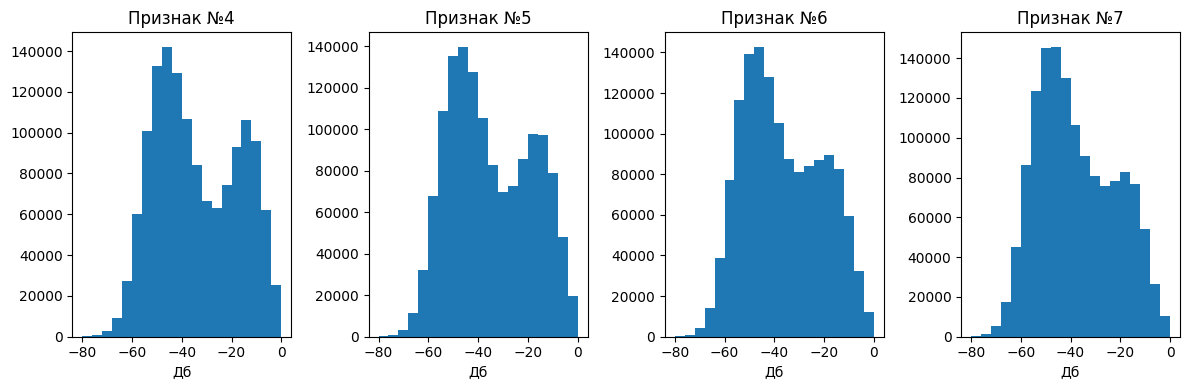

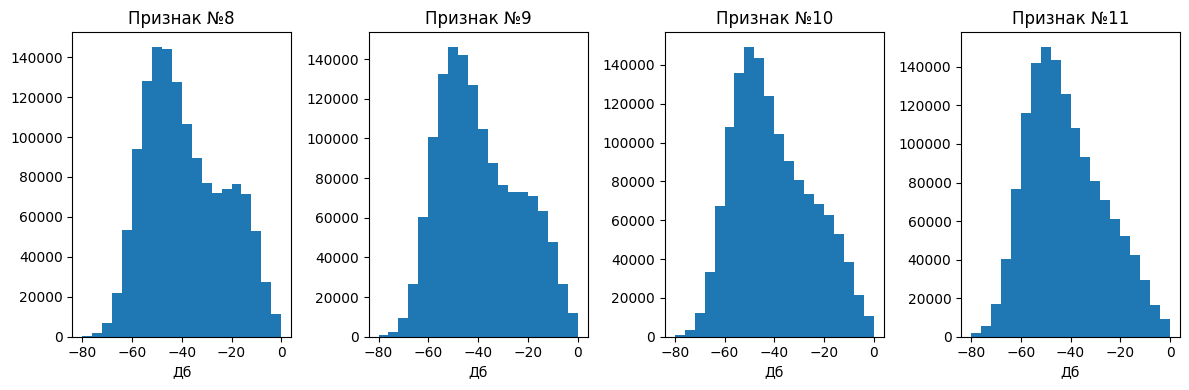

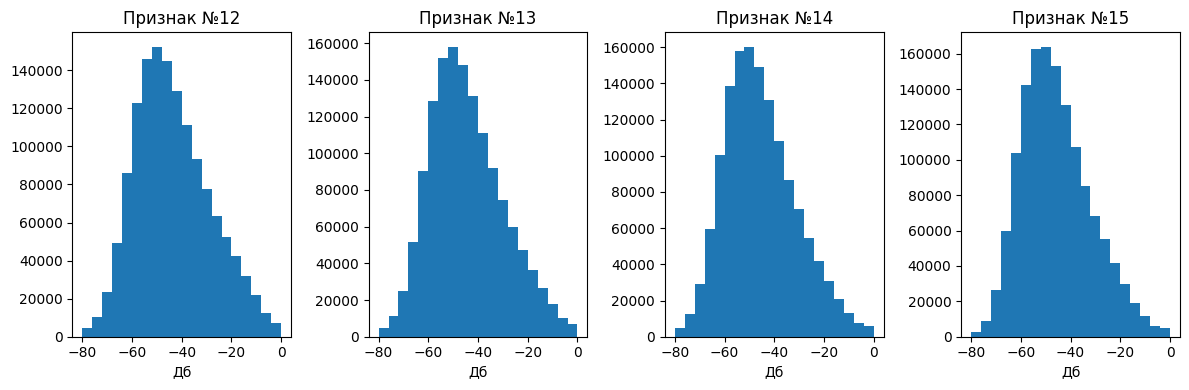

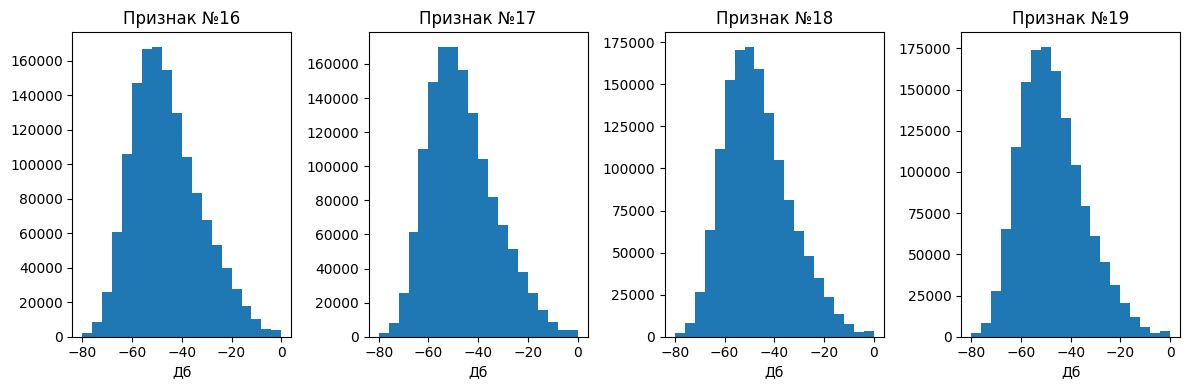

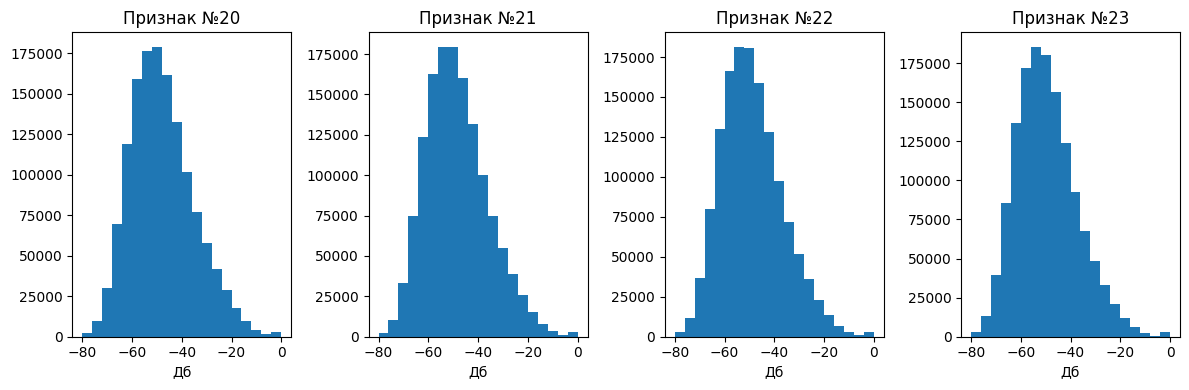

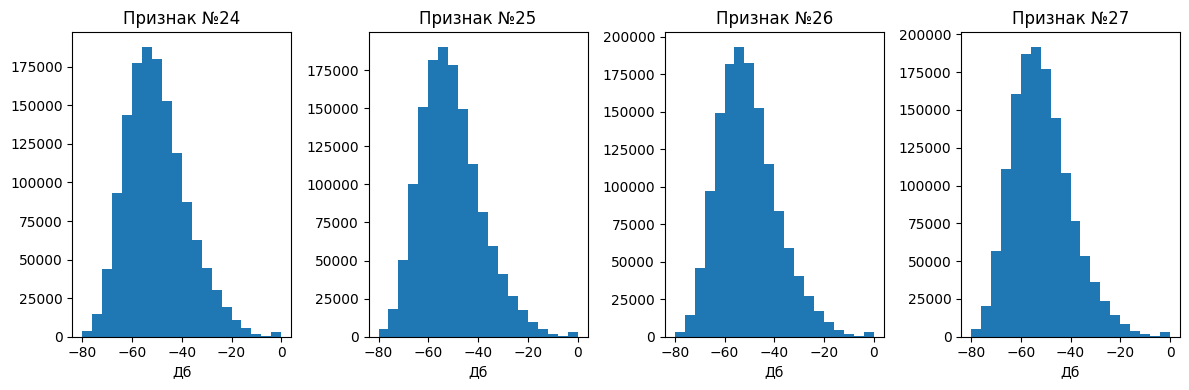

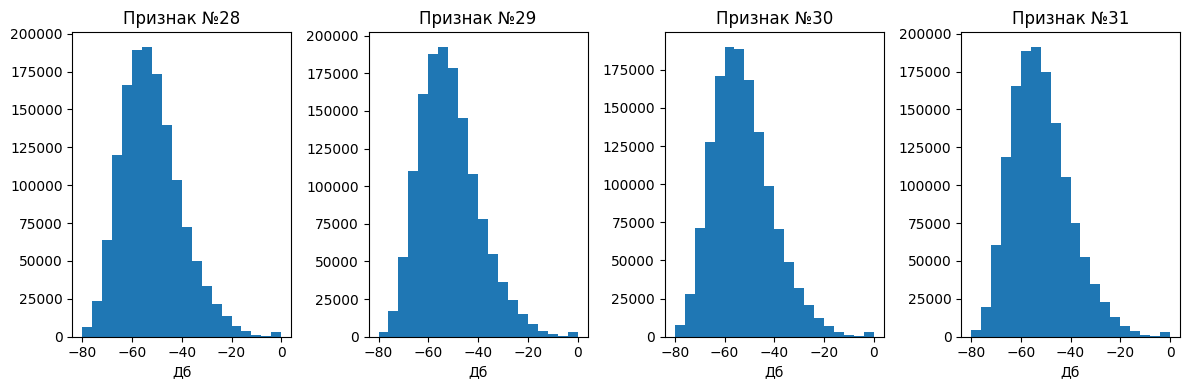

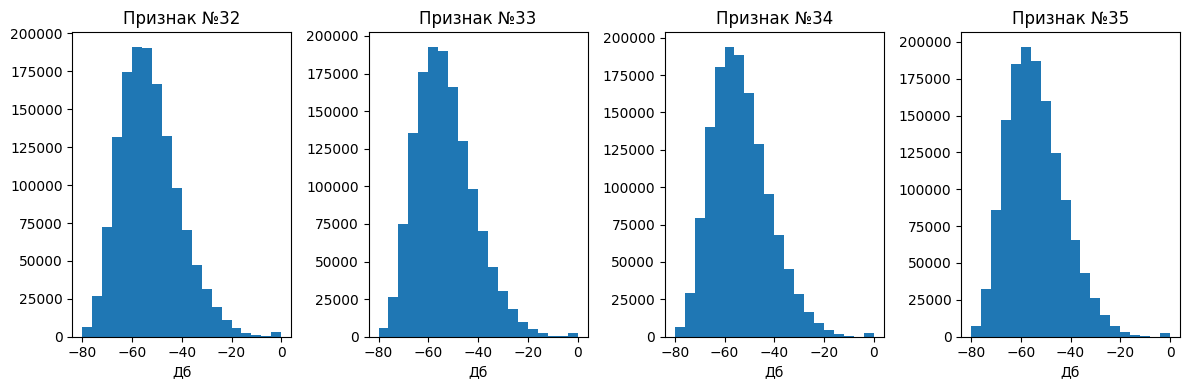

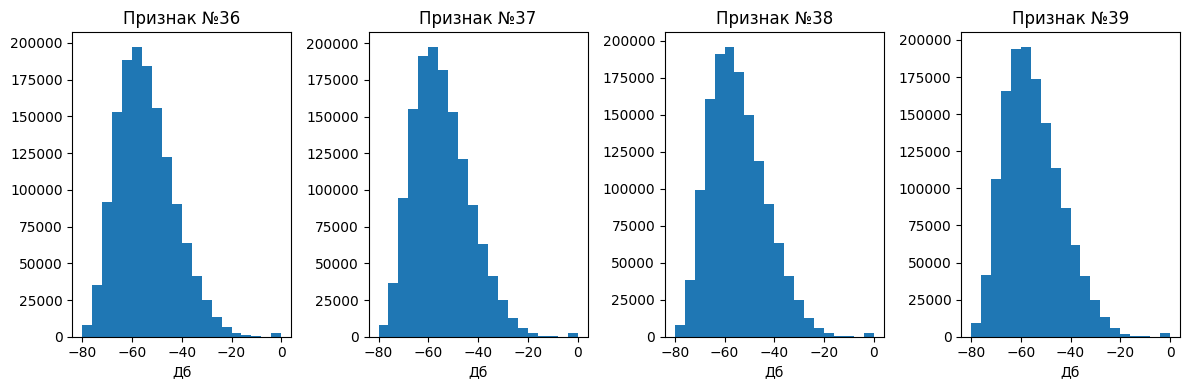

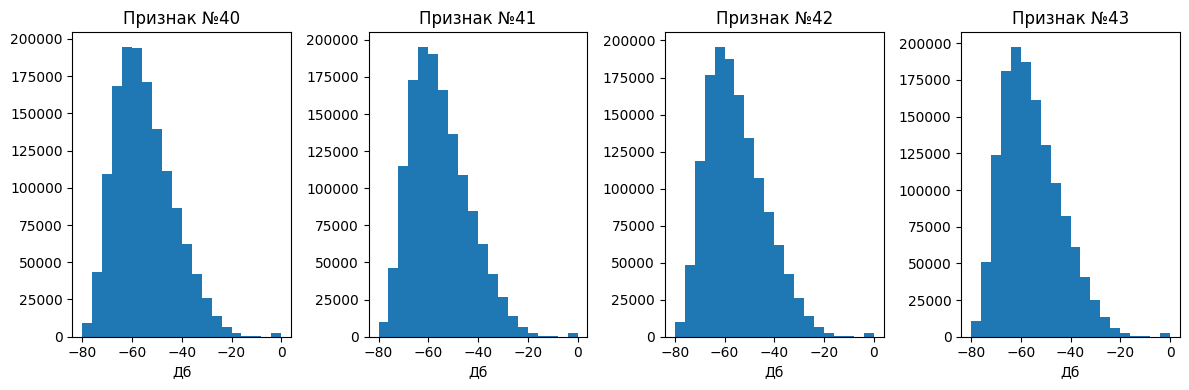

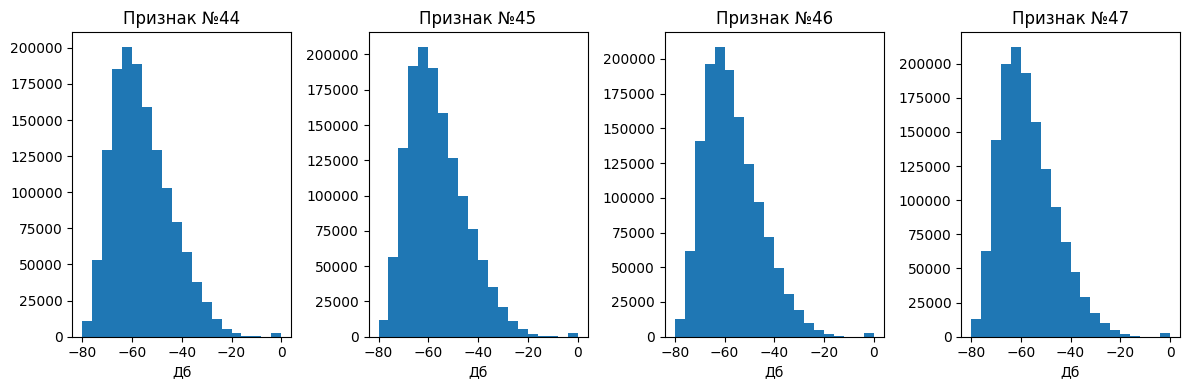

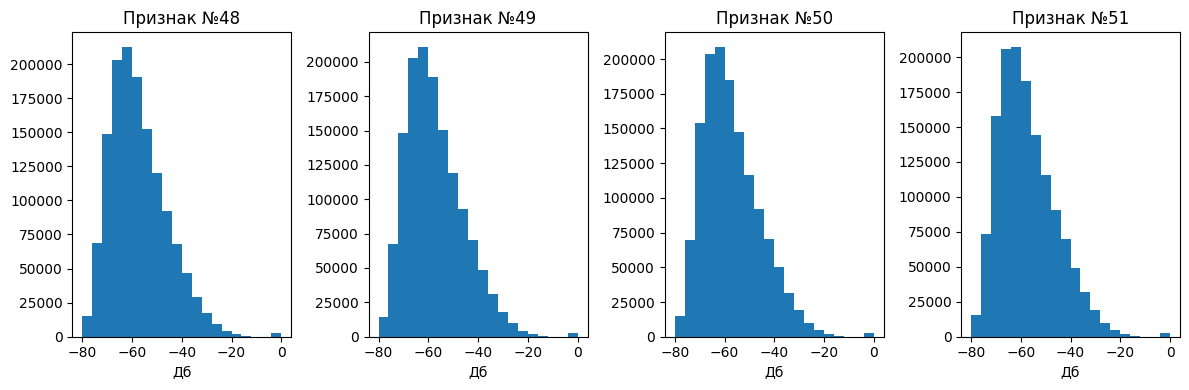

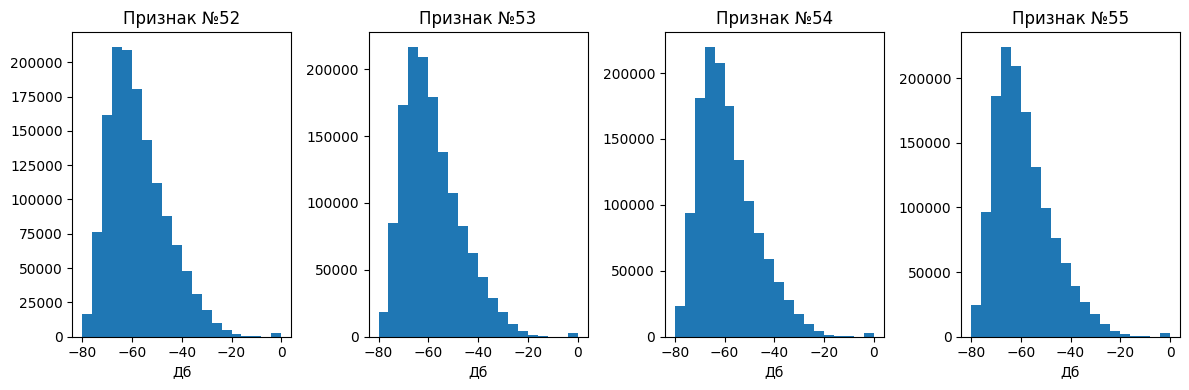

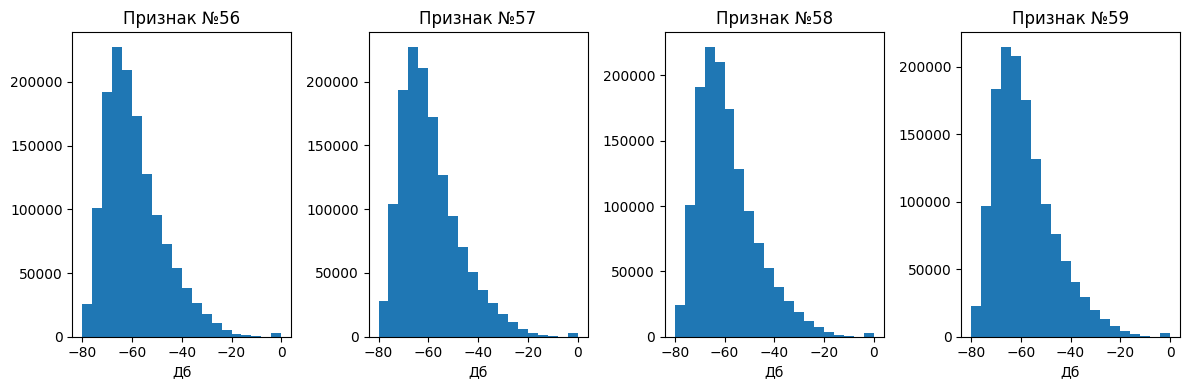

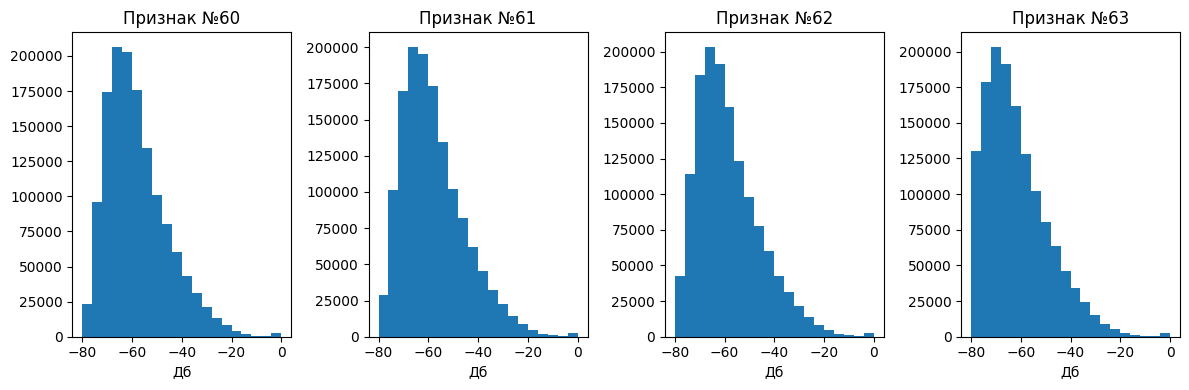

In [13]:
plot_features_hist(df=train_bin_df_mfcc, n_bins=20, x_count=4, y_count=16)

Подготовка тестового набора

In [11]:
# Фильтрация
test_df_mfcc = test_df_mfcc[~test_df_mfcc.eq(-80).any(axis=1)]
test_df_mfcc

0          1          2          3          4          5  \
8      -18.159077 -22.198284 -26.514542 -29.650963 -32.131187 -34.922752   
9      -23.741951 -27.981766 -34.184669 -40.481312 -44.863838 -47.579369   
10     -28.542931 -31.814308 -38.671600 -42.205135 -43.148727 -46.437397   
11     -33.046997 -40.096203 -49.268242 -46.791286 -47.506004 -50.467300   
12     -26.407864 -34.083401 -42.466602 -43.976715 -44.819981 -47.473145   
...           ...        ...        ...        ...        ...        ...   
980102 -41.587181 -43.244518 -43.749817 -43.479080 -46.102676 -52.347836   
980103 -39.221893 -37.635803 -38.539513 -42.155914 -47.282478 -49.094490   
980104 -40.928696 -41.365173 -45.082550 -50.518040 -50.953934 -50.749924   
980105 -41.971535 -39.565987 -44.809994 -51.109329 -52.974403 -53.492493   
980106 -56.007397 -54.253857 -52.974113 -56.836800 -59.969704 -53.284023   

                6          7          8          9  ...         56         57  \
8      -37.734825 -39.983246 -42.618912 -48.368774  ... -54.476456 -54.962799   
9      -49.593407 -52.045692 -52.681564 -54.612030  ... -58.627838 -58.130112   
10     -52.793247 -68.405403 -62.291565 -60.108971  ... -54.333389 -59.175079   
11     -47.939713 -46.530113 -48.878490 -50.094944  ... -59.811150 -57.549202   
12     -51.021355 -54.248070 -55.761368 -54.150398  ... -61.240700 -57.080536   
...           ...        ...        ...        ...  ...        ...        ...   
980102 -52.983719 -48.598316 -47.946281 -51.240734  ... -72.139526 -70.076393   
980103 -48.044449 -47.467445 -48.574780 -53.287762  ... -70.966827 -69.988670   
980104 -50.979752 -51.611313 -52.684010 -51.689838  ... -72.298203 -74.088737   
980105 -54.804207 -55.269230 -52.657898 -50.318672  ... -70.758102 -72.636566   
980106 -54.242123 -52.169651 -49.606026 -55.557758  ... -70.122437 -69.547081   

               58         59         60         61         62         63  \
8      -58.826447 -62.704247 -60.939453 -60.694626 -60.587509 -67.145912   
9      -60.347008 -60.705765 -65.115608 -65.345100 -63.190529 -64.571342   
10     -62.643257 -58.497231 -59.187187 -63.500847 -63.453377 -65.235786   
11     -62.221207 -61.423027 -61.498802 -54.548294 -53.032410 -59.492661   
12     -60.878471 -64.176384 -63.770027 -51.603943 -50.921623 -55.927711   
...           ...        ...        ...        ...        ...        ...   
980102 -68.937477 -66.829536 -72.000465 -75.052322 -74.373070 -73.690331   
980103 -71.158974 -70.143799 -71.624565 -74.855591 -73.666176 -74.563362   
980104 -72.424965 -71.075424 -72.827637 -72.104942 -76.433044 -76.392799   
980105 -69.169823 -67.933083 -69.595184 -71.538033 -72.010414 -74.555756   
980106 -70.349892 -69.257225 -74.350349 -70.849327 -71.343575 -73.998634   

        labels  emotion  
8            0  neutral  
9            0  neutral  
10           0  neutral  
11           0  neutral  
12           0  neutral  
...        ...      ...  
980102       3      sad  
980103       3      sad  
980104       3      sad  
980105       3      sad  
980106       3      sad  

[687955 rows x 66 columns]

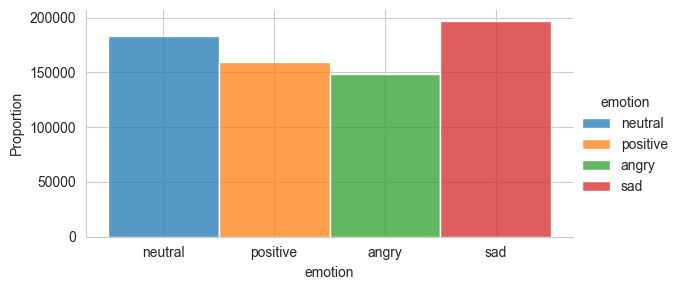

In [14]:
# После фильтрации
sns.set_style("whitegrid")
plot = sns.FacetGrid(test_df_mfcc, hue='emotion', aspect=2)
plot.map(sns.histplot, 'emotion', kde=False)
plot.add_legend()
plot.set_axis_labels('emotion', 'Proportion')
plt.show()

In [15]:
test_df_mfcc[['emotion']].groupby('emotion').value_counts()

emotion
angry       148333
neutral     183324
positive    159119
sad         197179
Name: count, dtype: int64

In [15]:
# test_df_mfcc = test_df_mfcc.loc[~(test_df_mfcc.iloc[:, 0:64] == [-80.0 for _ in range(64)]).all(axis=1)]
# test_df_mfcc

In [12]:
test_bin_df_mfcc = test_df_mfcc[(test_df_mfcc['emotion'] == 'sad') | (test_df_mfcc['emotion'] == 'positive')]
test_bin_df_mfcc

0          1          2          3          4          5  \
2484   -78.232216 -66.762070 -60.152481 -60.050976 -51.199341 -48.988251   
2485   -69.786255 -64.086021 -49.998688 -50.303741 -49.244385 -44.362221   
2486   -70.131332 -55.052792 -36.729980 -29.689508 -29.213474 -31.884554   
2487   -66.683754 -57.855297 -32.803642 -24.342447 -25.084366 -30.010469   
2488   -66.542679 -52.386223 -31.457870 -22.099285 -22.831322 -27.935856   
...           ...        ...        ...        ...        ...        ...   
980102 -41.587181 -43.244518 -43.749817 -43.479080 -46.102676 -52.347836   
980103 -39.221893 -37.635803 -38.539513 -42.155914 -47.282478 -49.094490   
980104 -40.928696 -41.365173 -45.082550 -50.518040 -50.953934 -50.749924   
980105 -41.971535 -39.565987 -44.809994 -51.109329 -52.974403 -53.492493   
980106 -56.007397 -54.253857 -52.974113 -56.836800 -59.969704 -53.284023   

                6          7          8          9  ...         56         57  \
2484   -51.118019 -54.887604 -50.786415 -48.612835  ... -60.784122 -62.070900   
2485   -39.895149 -40.007751 -47.553238 -50.356201  ... -47.130043 -54.305431   
2486   -32.322189 -29.590834 -29.900749 -36.499165  ... -49.807350 -62.352772   
2487   -37.802139 -28.719641 -26.388929 -30.628849  ... -47.781536 -56.131359   
2488   -37.704441 -25.354263 -22.007866 -23.645721  ... -42.403473 -57.184036   
...           ...        ...        ...        ...  ...        ...        ...   
980102 -52.983719 -48.598316 -47.946281 -51.240734  ... -72.139526 -70.076393   
980103 -48.044449 -47.467445 -48.574780 -53.287762  ... -70.966827 -69.988670   
980104 -50.979752 -51.611313 -52.684010 -51.689838  ... -72.298203 -74.088737   
980105 -54.804207 -55.269230 -52.657898 -50.318672  ... -70.758102 -72.636566   
980106 -54.242123 -52.169651 -49.606026 -55.557758  ... -70.122437 -69.547081   

               58         59         60         61         62         63  \
2484   -69.449692 -73.886551 -67.124046 -61.218426 -58.490730 -52.330067   
2485   -70.359818 -70.887367 -68.238266 -62.274776 -54.941376 -44.237450   
2486   -77.648453 -72.944908 -67.062073 -69.865280 -62.592873 -58.167625   
2487   -69.798965 -67.019272 -63.180656 -58.277954 -55.425896 -50.086021   
2488   -69.999008 -60.001503 -59.524757 -61.347458 -56.648273 -52.254429   
...           ...        ...        ...        ...        ...        ...   
980102 -68.937477 -66.829536 -72.000465 -75.052322 -74.373070 -73.690331   
980103 -71.158974 -70.143799 -71.624565 -74.855591 -73.666176 -74.563362   
980104 -72.424965 -71.075424 -72.827637 -72.104942 -76.433044 -76.392799   
980105 -69.169823 -67.933083 -69.595184 -71.538033 -72.010414 -74.555756   
980106 -70.349892 -69.257225 -74.350349 -70.849327 -71.343575 -73.998634   

        labels   emotion  
2484         2  positive  
2485         2  positive  
2486         2  positive  
2487         2  positive  
2488         2  positive  
...        ...       ...  
980102       3       sad  
980103       3       sad  
980104       3       sad  
980105       3       sad  
980106       3       sad  

[356298 rows x 66 columns]

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score

y_train = train_bin_df_mfcc['labels'].values
X_train = train_bin_df_mfcc.drop(columns=['labels', 'emotion']).values

y_test = test_bin_df_mfcc['labels'].values
X_test = test_bin_df_mfcc.drop(columns=['labels', 'emotion']).values

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [14]:
def new_label(label):
    if label == 2:
        return 0
    elif label == 3:
        return 1

y_train = np.vectorize(new_label)(y_train)
y_test = np.vectorize(new_label)(y_test)

8. Обучите следующие модели для классификации
  - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
  - [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  - SVM ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) и [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html))

Проведите обучение и исследования
  - с исходными данными
  - со стандартизированными данными (StandartScaler)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.metrics import accuracy_score

## Предобработка

In [16]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [17]:
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_scaled)
X_test_scaled = min_max_scaler.transform(X_test_scaled)

## Бинарная классификация

In [ ]:
# quantile_normal_transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='uniform')
# quantile_normal_transformer.fit(X_train)
# X_quantile = quantile_normal_transformer.transform(X)

In [18]:
def get_clf_result(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return clf, accuracy_score(y_test, y_pred)

### Исходные данные без изменений

In [47]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train, y_train, X_test, y_test)
print(f'LogisticRegression: {lr_score}')

LogisticRegression: 0.5882126759061235


In [48]:
_, gb_score = get_clf_result(GaussianNB(), X_train, y_train, X_test, y_test)
print(f'GaussianNB: {gb_score}')

GaussianNB: 0.5571038849502383


In [49]:
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train, y_train, X_test, y_test)
print(f'KNeighborsClassifier: {kn_score}')

KNeighborsClassifier: 0.5499806341882357


In [50]:
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train, y_train, X_test, y_test)
print(f'DecisionTreeClassifier: {dt_score}')

In [52]:
# _, svc_score = get_clf_result(SVC(), X_train, y_train, X_test, y_test)
# print(f'SVC: {svc_score}')

In [51]:
_, svcl_score = get_clf_result(LinearSVC(random_state=0), X_train, y_train, X_test, y_test)
print(f'LinearSVC: {svcl_score}')

Второй вариант фильтрации

In [38]:
# _, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_scaled, y_train, X_test_scaled, y_test)
# print(f'LogisticRegression: {lr_score}')
# _, gb_score = get_clf_result(GaussianNB(), X_train_scaled, y_train, X_test_scaled, y_test)
# print(f'GaussianNB: {gb_score}')
# _, kn_score = get_clf_result(KNeighborsClassifier(), X_train_scaled, y_train, X_test_scaled, y_test)
# print(f'KNeighborsClassifier: {kn_score}')

LogisticRegression: 0.5841516479882566
GaussianNB: 0.564649210183531
KNeighborsClassifier: 0.5473567260423682


### Исходные данные со стандартизацией и масштабированием

In [119]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'LogisticRegression: {lr_score}')

LogisticRegression: 0.5883530078754301


In [120]:
_, gb_score = get_clf_result(GaussianNB(), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'GaussianNB: {gb_score}')

GaussianNB: 0.5571038849502383


In [23]:
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'KNeighborsClassifier: {kn_score}')

KNeighborsClassifier: 0.5500199271396415


In [121]:
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'DecisionTreeClassifier: {dt_score}')

DecisionTreeClassifier: 0.5318637769507547


In [ ]:
# _, svc_score = get_clf_result(SVC(), X_train_scaled, y_train, X_test_scaled, y_test)
# print(f'SVC: {svc_score}')

In [28]:
_, svcl_score = get_clf_result(LinearSVC(random_state=0, max_iter=1000), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'LinearSVC: {svcl_score}')

E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.5884091406631528


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


9. Оцените
  - точность работы моделей после обучения
     - подробнее об [оценке точности](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score)
  - точности после перекрестной проверки
     - проведите перекрестную проверку
        - на тестовом наборе, полученном для обучения моделей
        - на исходном (полном/нераздленном) наборе данных
     - подробнее о [перекрестной проверке](https://scikit-learn.ru/3-1-cross-validation-evaluating-estimator-performance/)
     - для визуализации результатов точности всех моделей используйте boxplot

Исходные данные без изменений (не актуально)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


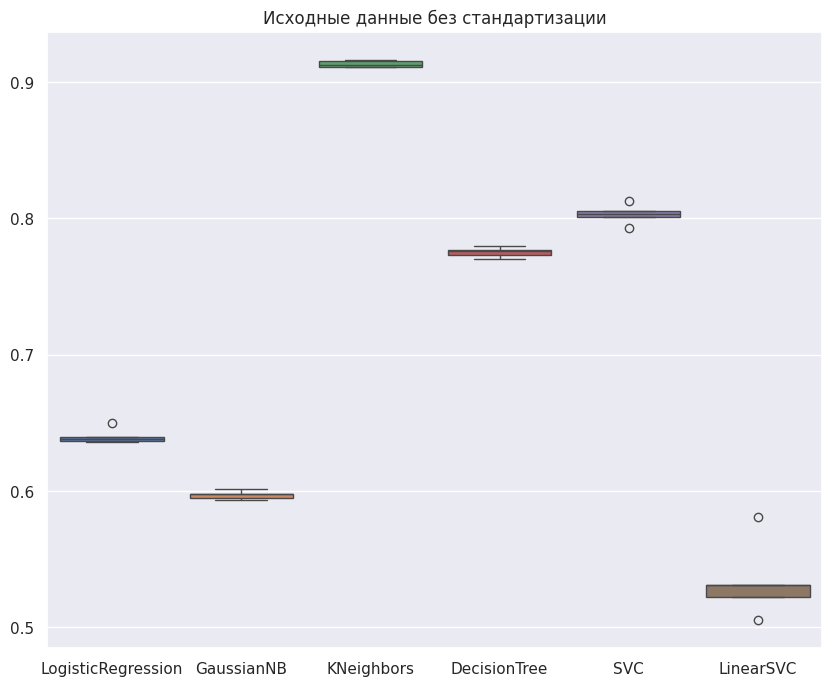

LogisticRegression    0.640027
GaussianNB            0.597120
KNeighbors            0.913120
DecisionTree          0.775200
SVC                   0.802907
LinearSVC             0.534320
dtype: float64

In [ ]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=800), X_train, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train, y_train, cv=5)
# svc_scores = cross_val_score(SVC(), X_train, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    # 'SVC': svc_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Исходные данные без стандартизации')
plt.show()

scores_df.mean()

Исходные данные + StandardScaler + MinMaxScaler

E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

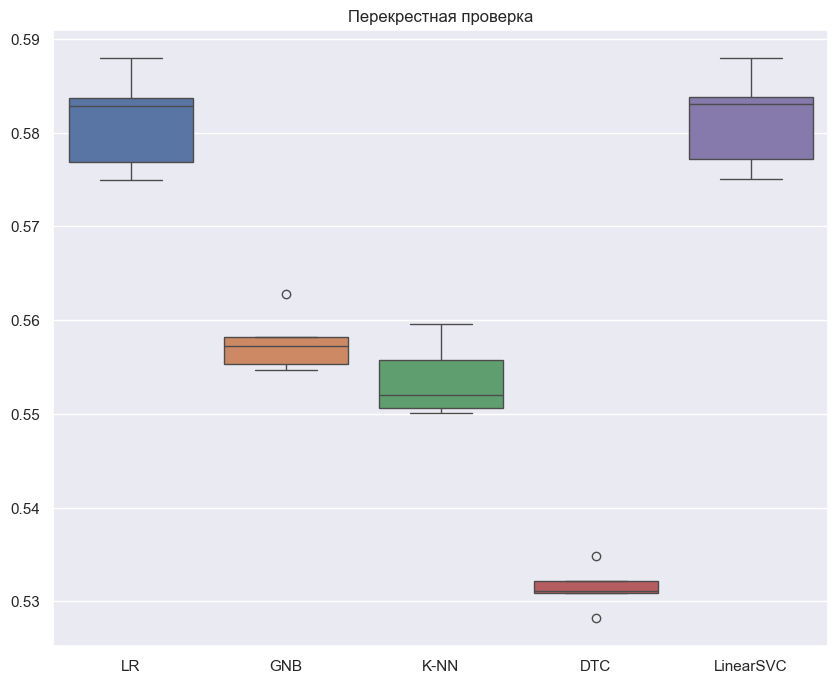

LR           0.581287
GNB          0.557622
K-NN         0.553610
DTС          0.531441
LinearSVC    0.581395
dtype: float64

In [29]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=400), X_train_scaled, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train_scaled, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train_scaled, y_train, cv=5)
# svc_scores = cross_val_score(SVC(), X_train_scaled, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train_scaled, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    # 'SVC': svc_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

10. Обучите следующие ансамблевые модели для классификации
  - [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
  - [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
  - [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

  Оцените по аналогии с предыдущим пунктом.

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, HistGradientBoostingClassifier

Исходные данные без изменений (не актуально)

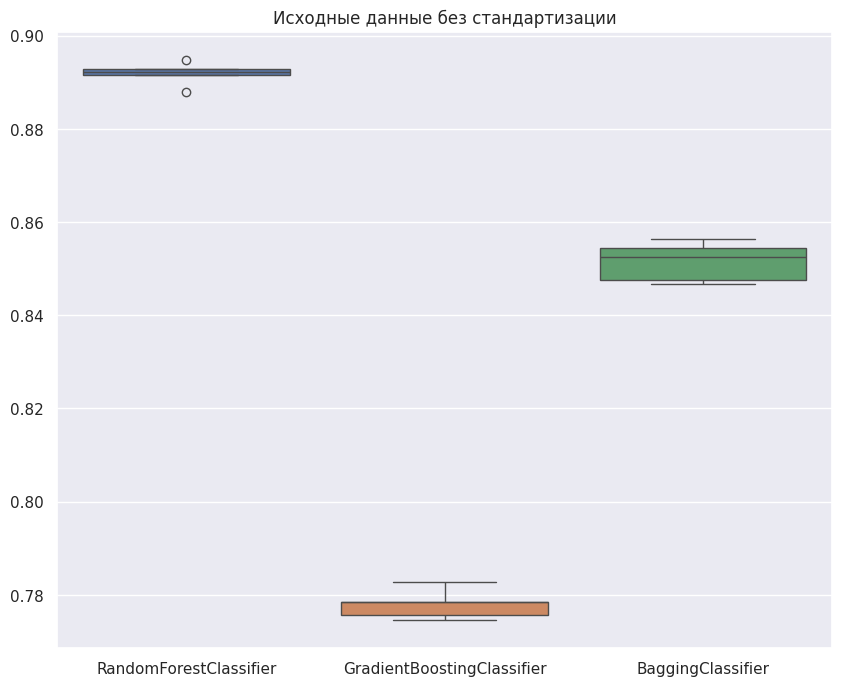

RandomForestClassifier        0.891893
GradientBoostingClassifier    0.778000
BaggingClassifier             0.851520
dtype: float64

In [ ]:
rf_scores = cross_val_score(RandomForestClassifier(random_state=0), X, y, cv=5)
gb_scores = cross_val_score(GradientBoostingClassifier(random_state=0), X, y, cv=5)
bagg_scores = cross_val_score(BaggingClassifier(random_state=0), X, y, cv=5)

scores_df = pd.DataFrame({
    'RandomForestClassifier': rf_scores,
    'GradientBoostingClassifier': gb_scores,
    'BaggingClassifier': bagg_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Исходные данные без стандартизации')
plt.show()

scores_df.mean()

Исходные данные со стандартизацией и масштабированием

In [22]:
N = 200000

In [20]:
_, rf_score = get_clf_result(RandomForestClassifier(random_state=0, n_estimators=25), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'RandomForestClassifier: {rf_score}')

RandomForestClassifier: 0.5772022295943283


In [ ]:
_, gb_score = get_clf_result(GradientBoostingClassifier(random_state=0), X_train_scaled[:N], y_train[:N], X_test_scaled, y_test)
print(f'GradientBoostingClassifier: {gb_score}')

In [24]:
_, gb_score = get_clf_result(HistGradientBoostingClassifier(random_state=0), X_train_scaled, y_train, X_test_scaled, y_test)
print(f'HistGradientBoostingClassifier: {gb_score}')

HistGradientBoostingClassifier: 0.5968066057064592


In [24]:
# _, bagg_score = get_clf_result(BaggingClassifier(random_state=0), X_train_scaled[:n], y_train[:n], X_test_scaled, y_test)
# print(bagg_score)

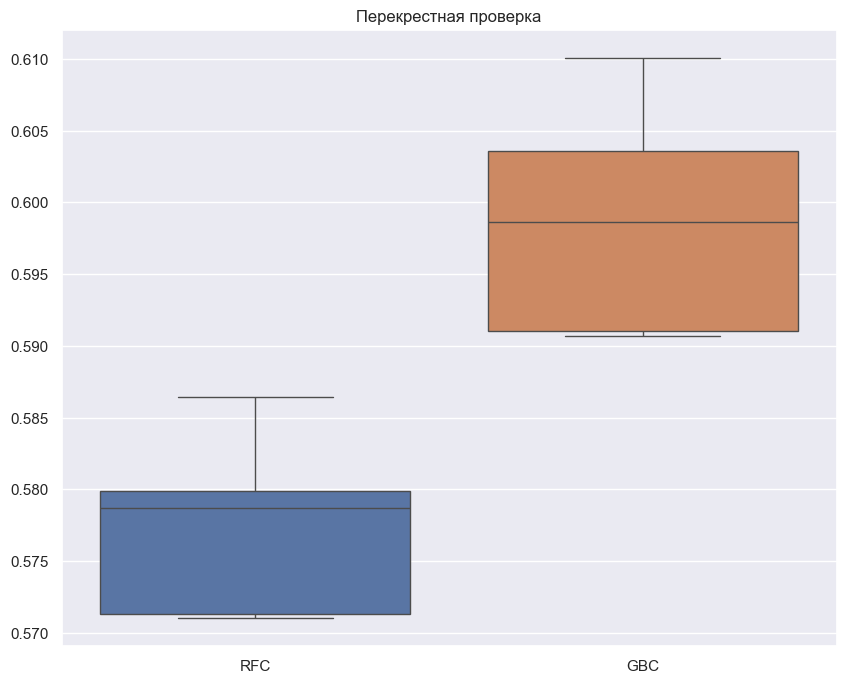

RFC    0.577463
GBС    0.598807
dtype: float64

In [31]:
rf_scores = cross_val_score(RandomForestClassifier(random_state=0, n_estimators=25), X_train_scaled, y_train, cv=5)
gb_scores = cross_val_score(HistGradientBoostingClassifier(random_state=0), X_train_scaled, y_train, cv=5)
# bagg_scores = cross_val_score(BaggingClassifier(random_state=0), X_scaled, y, cv=5)

scores_df = pd.DataFrame({
    'RFC': rf_scores,
    'GBС': gb_scores,
    # 'BaggingClassifier': bagg_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

11. Сравните точности каждого ансамблевого метода с использованными классическими моделями. Сделайте выводы.

12. Обучите модель KMeans
   - не забудьте избавить исходные данные от метки класса, чтобы подготовить их для обучения без учителя
   - для визуализации полученных кластеров понизьте размерность исходных данных с помощью [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)
   - Сравните полученные метки классов с оригинальными

## Снижение размерности

In [20]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

#### PCA

In [45]:
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

In [28]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LogisticRegression: {lr_score}')
_, gb_score = get_clf_result(GaussianNB(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'GaussianNB: {gb_score}')
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'KNeighborsClassifier: {kn_score}')
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'DecisionTreeClassifier: {dt_score}')
_, svcl_score = get_clf_result(LinearSVC(random_state=0, max_iter=1000), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LinearSVC: {svcl_score}')

LogisticRegression: 0.5534103475180888
GaussianNB: 0.555672498863311
KNeighborsClassifier: 0.5183020954369657
DecisionTreeClassifier: 0.5104463117951827


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.5534103475180888


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\p

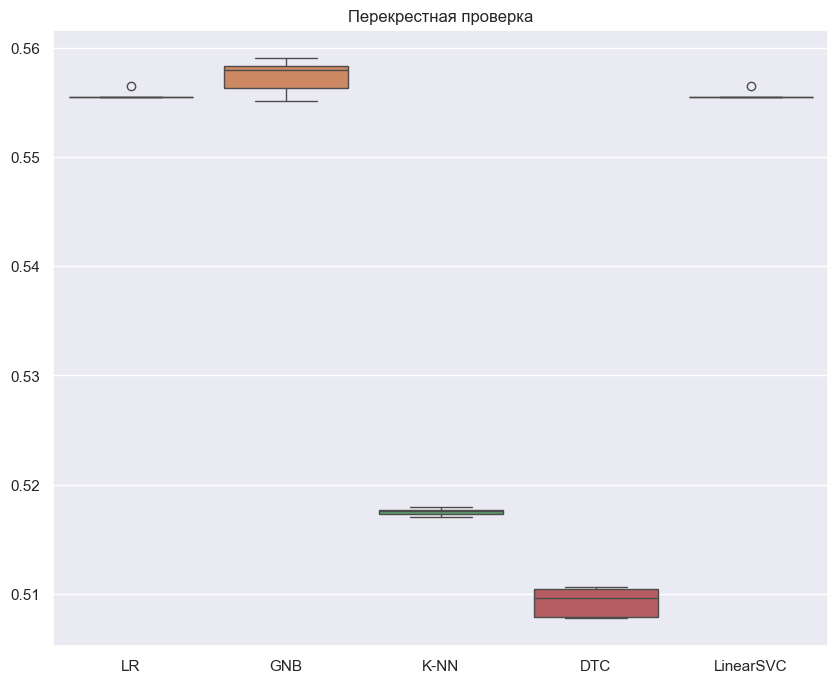

LR           0.555755
GNB          0.557426
K-NN         0.517497
DTС          0.509238
LinearSVC    0.555755
dtype: float64

In [30]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=400), X_train_reduced, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train_reduced, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train_reduced, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train_reduced, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

In [46]:
_, gb_score = get_clf_result(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'HistGradientBoostingClassifier: {gb_score}')

gbc_scores = cross_val_score(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(gbc_scores)}')

_, rf_score = get_clf_result(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'RandomForestClassifier: {rf_score}')

rfc_scores = cross_val_score(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(rfc_scores)}')

HistGradientBoostingClassifier: 0.5584061656254035
CV: 0.5579773316221629
RandomForestClassifier: 0.5187202847054994
CV: 0.5177380402711905


#### t-SNE

In [23]:
tsne = TSNE(n_components=2, perplexity=30)
X_train_reduced = tsne.fit_transform(X_train_scaled)
X_test_reduced = tsne.fit_transform(X_test_scaled)

In [25]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LogisticRegression: {lr_score}')
_, gb_score = get_clf_result(GaussianNB(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'GaussianNB: {gb_score}')
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'KNeighborsClassifier: {kn_score}')
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'DecisionTreeClassifier: {dt_score}')
_, svcl_score = get_clf_result(LinearSVC(random_state=0, max_iter=1000), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LinearSVC: {svcl_score}')

LogisticRegression: 0.5534103475180888
GaussianNB: 0.5619425312519296
KNeighborsClassifier: 0.5189279760200731
DecisionTreeClassifier: 0.5148274758769344


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.5234859583831512


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

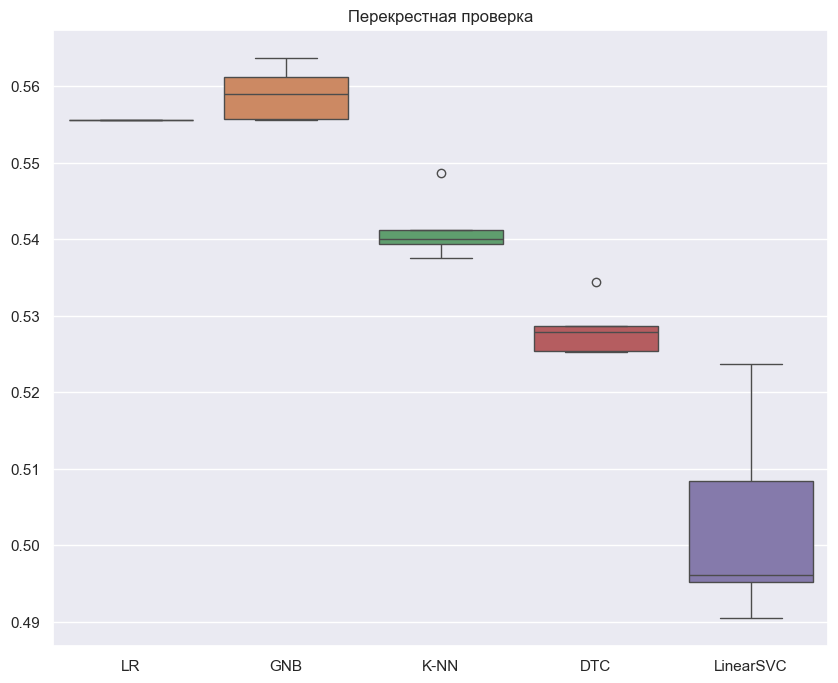

LR           0.555555
GNB          0.559015
K-NN         0.541333
DTС          0.528279
LinearSVC    0.502764
dtype: float64

In [26]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=400), X_train_reduced, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train_reduced, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train_reduced, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train_reduced, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

In [27]:
_, gb_score = get_clf_result(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'HistGradientBoostingClassifier: {gb_score}')

gbc_scores = cross_val_score(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(gbc_scores)}')

_, rf_score = get_clf_result(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'RandomForestClassifier: {rf_score}')

rfc_scores = cross_val_score(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(rfc_scores)}')

HistGradientBoostingClassifier: 0.5667025916508092
CV: 0.5781710806645874
RandomForestClassifier: 0.5222987499228174
CV: 0.5422713146749791


#### UMAP

In [21]:
umap_ = umap.UMAP(n_components=2)
umap_.fit(X_train_scaled)
X_train_reduced = umap_.transform(X_train_scaled)
X_test_reduced = umap_.transform(X_test_scaled)

E:\projects\emotional-data-mining\venv\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [26]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LogisticRegression: {lr_score}')
_, gb_score = get_clf_result(GaussianNB(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'GaussianNB: {gb_score}')
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'KNeighborsClassifier: {kn_score}')
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'DecisionTreeClassifier: {dt_score}')
_, svcl_score = get_clf_result(LinearSVC(random_state=0, max_iter=1000), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LinearSVC: {svcl_score}')

LogisticRegression: 0.570957456960185
GaussianNB: 0.5701547580957513
KNeighborsClassifier: 0.5293686745364835
DecisionTreeClassifier: 0.5169408753346918


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.5711623416353726


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

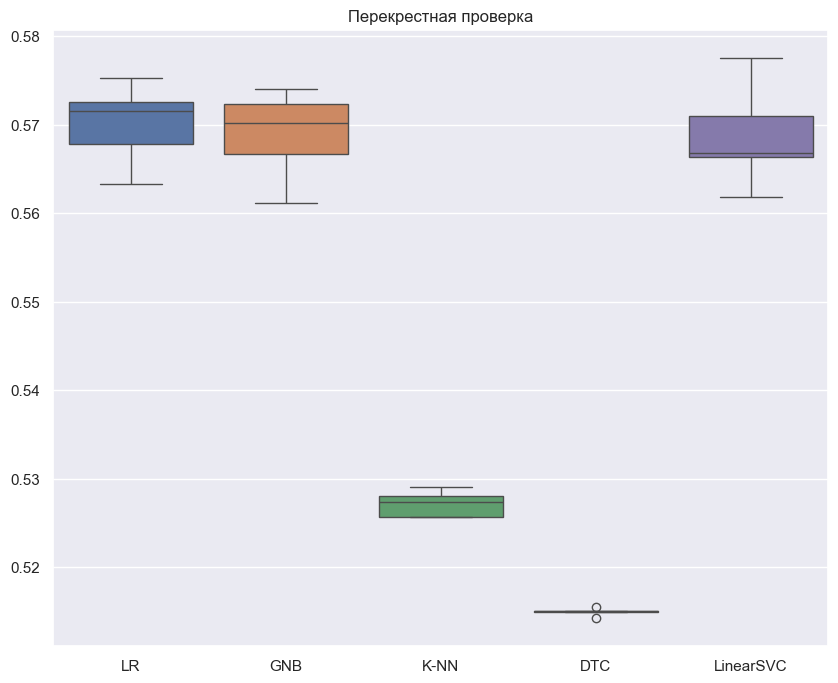

LR           0.570127
GNB          0.568893
K-NN         0.527200
DTС          0.514986
LinearSVC    0.568709
dtype: float64

In [27]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=400), X_train_reduced, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train_reduced, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train_reduced, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train_reduced, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

In [28]:
_, gb_score = get_clf_result(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'HistGradientBoostingClassifier: {gb_score}')

gbc_scores = cross_val_score(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(gbc_scores)}')

_, rf_score = get_clf_result(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'RandomForestClassifier: {rf_score}')

rfc_scores = cross_val_score(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(rfc_scores)}')

HistGradientBoostingClassifier: 0.5770282179523881
CV: 0.5691608932467128
RandomForestClassifier: 0.5310919511195684
CV: 0.5270612916599361


#### S-UMAP

In [20]:
sumap = umap.UMAP(n_components=2)
sumap.fit(X_train_scaled, y_train)
X_train_reduced = sumap.transform(X_train_scaled)
X_test_reduced = sumap.transform(X_test_scaled)

E:\projects\emotional-data-mining\venv\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [47]:
X_train_reduced = sumap.transform(X_train_scaled)
X_test_reduced = sumap.transform(X_test_scaled)

In [48]:
_, lr_score = get_clf_result(LogisticRegression(random_state=0, max_iter=600), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LogisticRegression: {lr_score}')
_, gb_score = get_clf_result(GaussianNB(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'GaussianNB: {gb_score}')
_, kn_score = get_clf_result(KNeighborsClassifier(), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'KNeighborsClassifier: {kn_score}')
_, dt_score = get_clf_result(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'DecisionTreeClassifier: {dt_score}')
_, svcl_score = get_clf_result(LinearSVC(random_state=0, max_iter=1000), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'LinearSVC: {svcl_score}')

LogisticRegression: 0.5661973965613054
GaussianNB: 0.5652824321214265
KNeighborsClassifier: 0.5648614362135067
DecisionTreeClassifier: 0.5620239237941274


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC: 0.5661075841009492


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
E:\projects\emotional-data-mining\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` wi

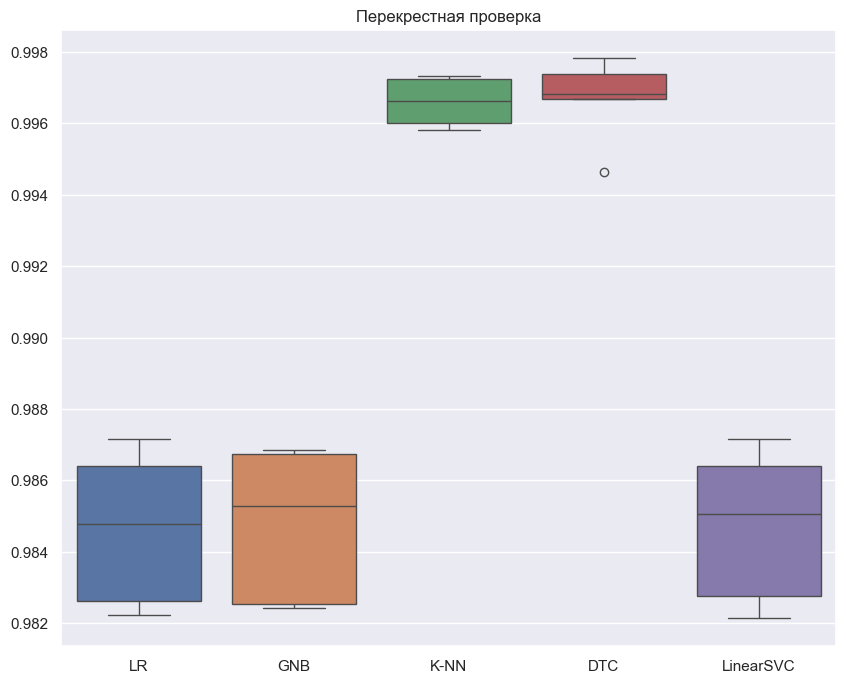

LR           0.984632
GNB          0.984760
K-NN         0.996598
DTС          0.996664
LinearSVC    0.984708
dtype: float64

In [31]:
lr_scores = cross_val_score(LogisticRegression(random_state=0, max_iter=400), X_train_reduced, y_train, cv=5)
gnb_scores = cross_val_score(GaussianNB(), X_train_reduced, y_train, cv=5)
kn_scores = cross_val_score(KNeighborsClassifier(), X_train_reduced, y_train, cv=5)
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=0), X_train_reduced, y_train, cv=5)
svcl_scores = cross_val_score(LinearSVC(random_state=0), X_train_reduced, y_train, cv=5)

scores_df = pd.DataFrame({
    'LR': lr_scores,
    'GNB': gnb_scores,
    'K-NN': kn_scores,
    'DTС': dt_scores,
    'LinearSVC': svcl_scores
})

sns.set()
plt.figure(figsize=(10, 8))
sns.boxplot(data=scores_df).set_title('Перекрестная проверка')
plt.show()

scores_df.mean()

In [41]:
_, gb_score = get_clf_result(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'HistGradientBoostingClassifier: {gb_score}')
gbc_scores = cross_val_score(HistGradientBoostingClassifier(random_state=0), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(gbc_scores)}')

HistGradientBoostingClassifier: 0.558032882587048
CV: 0.9953676550384938


In [42]:
N = len(X_train_scaled) // 2
_, rf_score = get_clf_result(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, X_test_reduced, y_test)
print(f'RandomForestClassifier: {rf_score}')

RandomForestClassifier: 0.5621810955997508


In [43]:
rfc_scores = cross_val_score(RandomForestClassifier(random_state=0, n_estimators=25), X_train_reduced, y_train, cv=5)
print(f'CV: {np.mean(rfc_scores)}')

CV: 0.9971657885266371


## Кластеризация

In [ ]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

In [ ]:
!pip install simpsom==3.0.0b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [ ]:
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(X_train_scaled)
k_means_labels = k_means.predict(X_test_scaled)
# k_means_labels = k_means.fit_predict(X_scaled)
print(adjusted_rand_score(y_test, k_means_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.007196261863702871


In [ ]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_train_scaled)
gmm_labels = gmm.predict(X_test_scaled)
print(adjusted_rand_score(y_test, gmm_labels))

-1.2848957573162233e-05


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# X_scaled_pca = pca.fit_transform(X_scaled)

2024-06-03 19:13:14.494 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2024-06-03 19:13:14.506 | INFO     | simpsom.network:_set_weights:191 - The weights will be initialized randomly.
2024-06-03 19:13:14.525 | INFO     | simpsom.network:train:374 - The map will be trained with the batch algorithm.
2024-06-03 19:13:14.537 | INFO     | simpsom.network:train:396 - Early stop active.
2024-06-03 19:13:14.542 | WARNING  | simpsom.network:train:397 - Early stop is an experimental feature, make sure to know what you are doing!
/usr/local/lib/python3.10/dist-packages/simpsom/distances.py:178: RuntimeWarning: invalid value encountered in sqrt
  return self.xp.sqrt(squares_a + squares_b.T - 2 * a.dot(b.T))
2024-06-03 19:13:25.852 | INFO     | simpsom.network:get_nodes_difference:579 - Weights difference among neighboring nodes calculated.


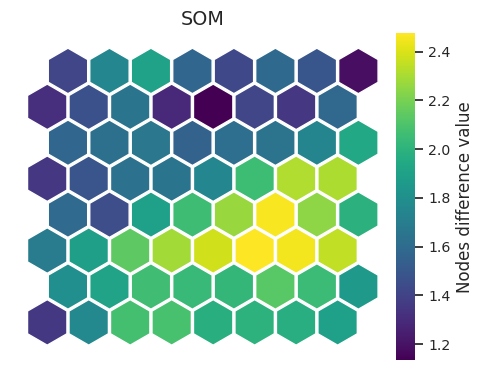

2024-06-03 19:13:26.553 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2024-06-03 19:13:26.861 | INFO     | simpsom.network:cluster:678 - Clustering results will be saved to:
././som_clusters.npy


0.028453994644582026


In [ ]:
import simpsom as sps

net = sps.SOMNet(8, 8, X_train_scaled, topology='hexagonal',
                 init='random', metric='euclidean',
                 neighborhood_fun='gaussian', PBC=False,
                 random_seed=32, GPU=False, CUML=False,
                 debug=False)

net.train(train_algo='batch', start_learning_rate=0.01, epochs=-1, batch_size=100,
          early_stop="mapdiff", early_stop_tolerance=1e-5)

net.plot_map_by_difference(show=True, print_out=False)

net_labels, _ = net.cluster(X_test_scaled, algorithm='KMeans', n_clusters=2)
print(adjusted_rand_score(y_test, net_labels))

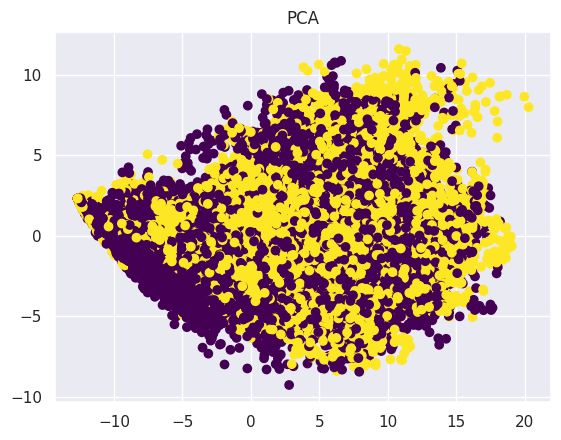

In [ ]:
plt.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA')
plt.show()

In [ ]:
sns.set()

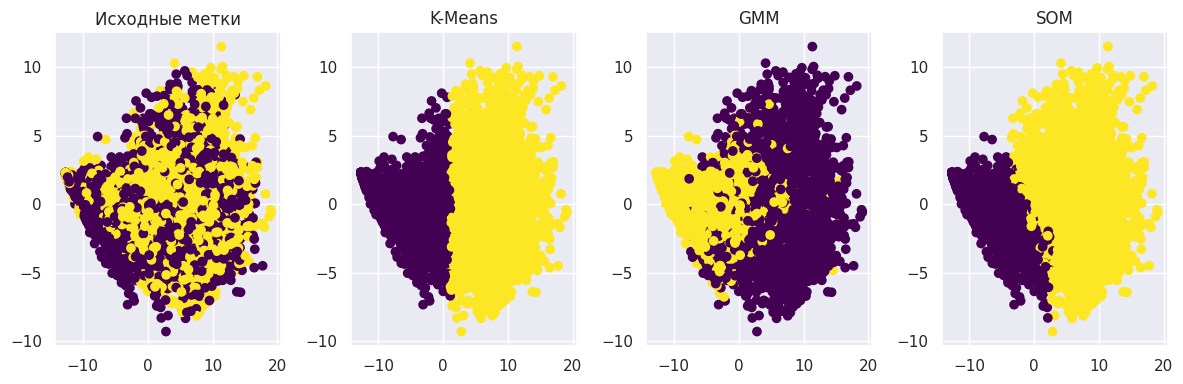

In [ ]:
fig, axs = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

axs[0].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=k_means_labels, cmap='viridis')
axs[1].set_title('K-Means')

axs[2].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=gmm_labels, cmap='viridis')
axs[2].set_title('GMM')

axs[3].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=net_labels, cmap='viridis')
axs[3].set_title('SOM')

plt.tight_layout()
plt.show()

In [ ]:
k_means_pca = KMeans(n_clusters=2, random_state=0)
k_means_pca.fit(X_train_pca)
k_means_pca_labels = k_means_pca.predict(X_test_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
gmm_pca = GaussianMixture(n_components=2, random_state=0)
gmm_pca.fit(X_train_pca)
gmm_pca_labels = gmm_pca.predict(X_test_pca)

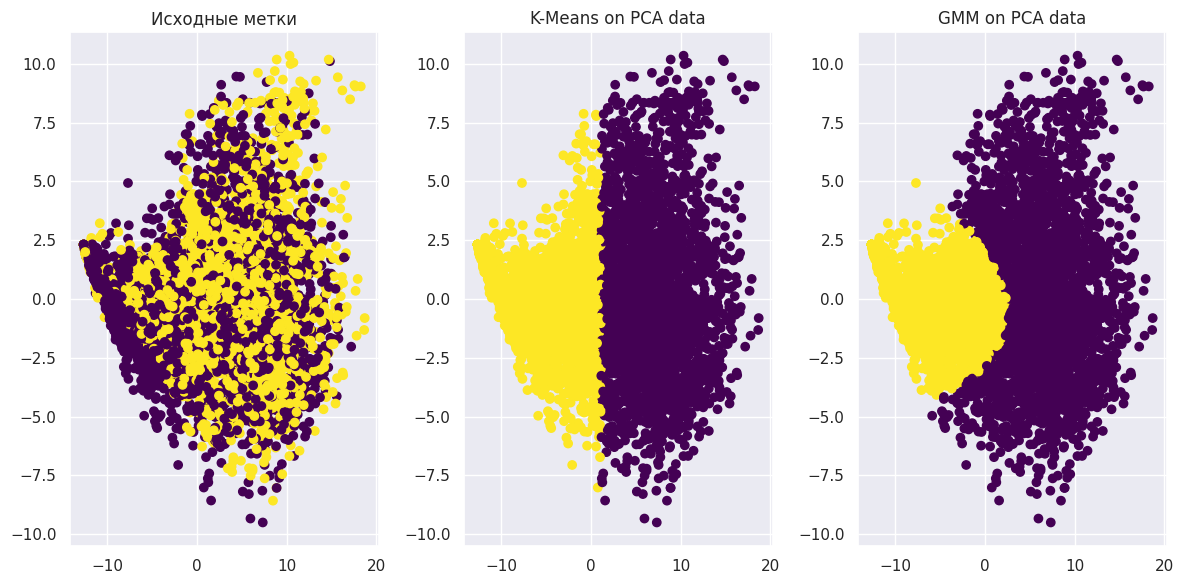

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)

axs[0].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=k_means_pca_labels, cmap='viridis')
axs[1].set_title('K-Means on PCA data')

axs[2].scatter(x=X_test_pca[:, 0], y=X_test_pca[:, 1], c=gmm_pca_labels, cmap='viridis')
axs[2].set_title('GMM on PCA data')

plt.tight_layout()
plt.show()

In [ ]:
X_train_tsne= TSNE(n_components=2, perplexity=25).fit_transform(X_train_scaled)
X_test_tsne = TSNE(n_components=2, perplexity=25).fit_transform(X_test_scaled)

# tsne = TSNE(n_components=2, perplexity=30)
# X_scaled_tsne = tsne.fit_transform(X_scaled)

# k_means_tsne = KMeans(n_clusters=2, random_state=0)
# k_means_tsne_labels = k_means_tsne.fit(X_scaled_tsne)

In [ ]:
k_means_tsne = KMeans(n_clusters=2, random_state=0)
k_means_tsne.fit(X_train_tsne)
k_means_tsne_labels = k_means_tsne.predict(X_test_tsne)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
gmm_tsne = GaussianMixture(n_components=2, random_state=0)
gmm_tsne.fit(X_train_tsne)
gmm_tsne_labels = gmm_tsne.predict(X_test_tsne)

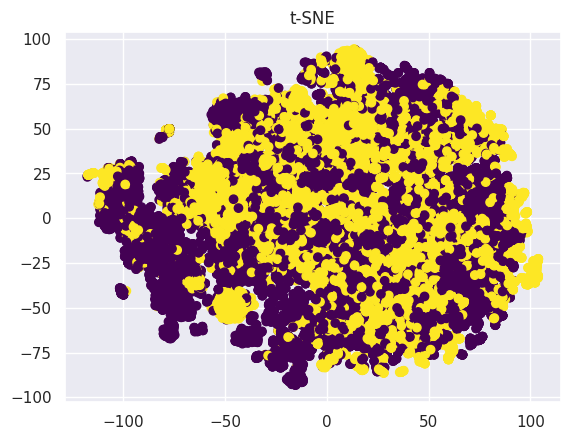

In [ ]:
plt.scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE')
plt.show()

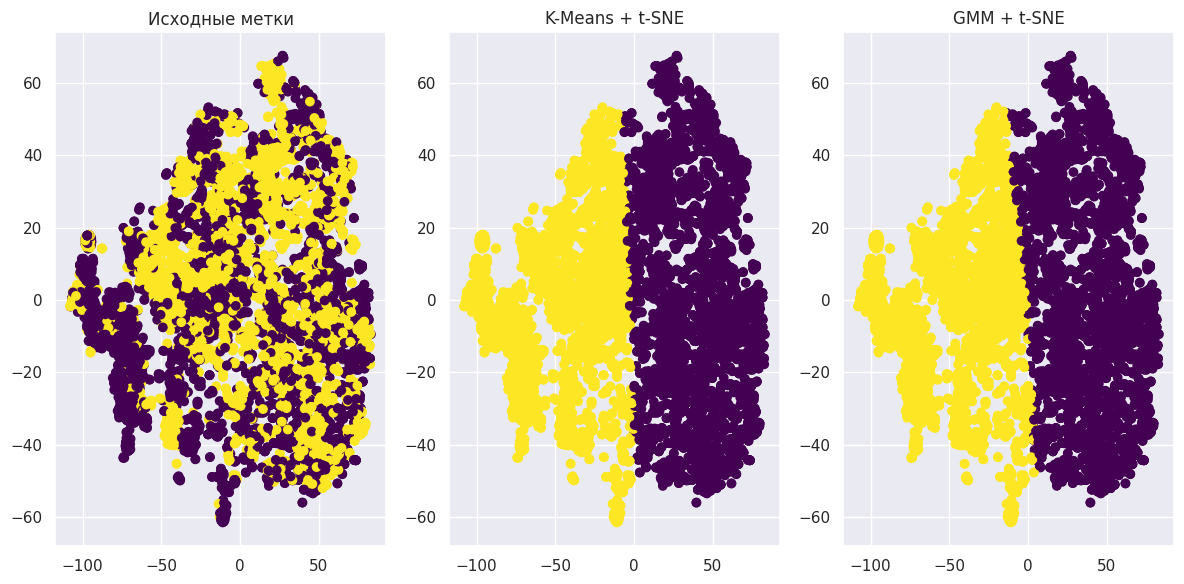

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)

axs[0].scatter(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], c=k_means_tsne_labels, cmap='viridis')
axs[1].set_title('K-Means + t-SNE')

axs[2].scatter(x=X_test_tsne[:, 0], y=X_test_tsne[:, 1], c=gmm_tsne_labels, cmap='viridis')
axs[2].set_title('GMM + t-SNE')

plt.tight_layout()
plt.show()

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)
reducer.fit(X_train_scaled, y_train)
X_train_umap = reducer.transform(X_train_scaled)
X_test_umap = reducer.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


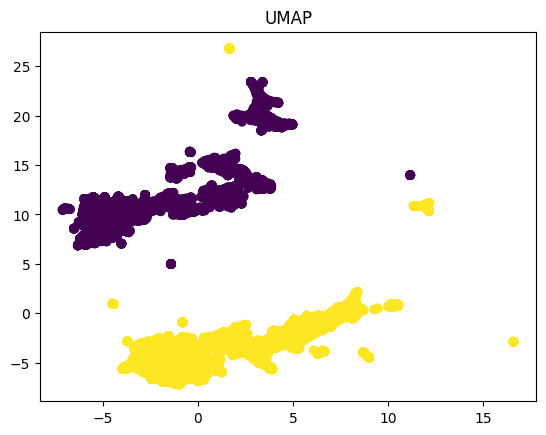

In [ ]:
plt.scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=y_train, cmap='viridis')
plt.title("UMAP")
plt.show()

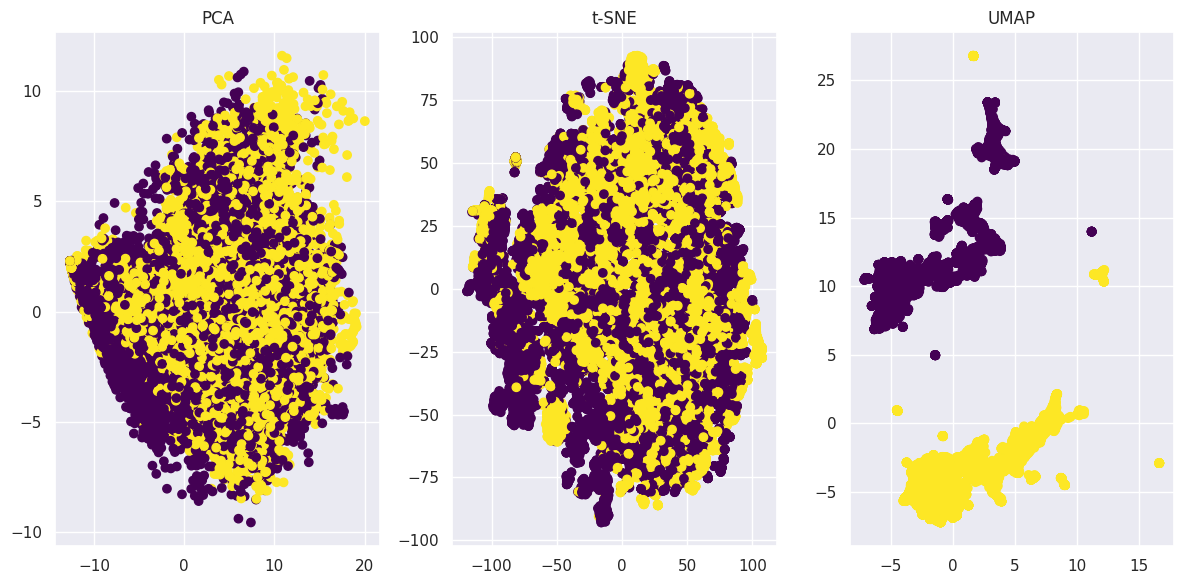

In [ ]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)

axs[0].scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1], c=y_train, cmap='viridis')
axs[0].set_title('PCA')

axs[1].scatter(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], c=y_train, cmap='viridis')
axs[1].set_title('t-SNE')

axs[2].scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=y_train, cmap='viridis')
axs[2].set_title('UMAP')

plt.tight_layout()
plt.show()

2024-06-02 21:11:25.815 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2024-06-02 21:11:25.823 | INFO     | simpsom.network:_set_weights:191 - The weights will be initialized randomly.
2024-06-02 21:11:25.852 | INFO     | simpsom.network:train:374 - The map will be trained with the batch algorithm.
2024-06-02 21:11:25.855 | INFO     | simpsom.network:train:396 - Early stop active.
2024-06-02 21:11:25.857 | WARNING  | simpsom.network:train:397 - Early stop is an experimental feature, make sure to know what you are doing!
/usr/local/lib/python3.10/dist-packages/simpsom/distances.py:178: RuntimeWarning: invalid value encountered in sqrt
  return self.xp.sqrt(squares_a + squares_b.T - 2 * a.dot(b.T))
2024-06-02 21:11:28.177 | INFO     | simpsom.network:get_nodes_difference:579 - Weights difference among neighboring nodes calculated.


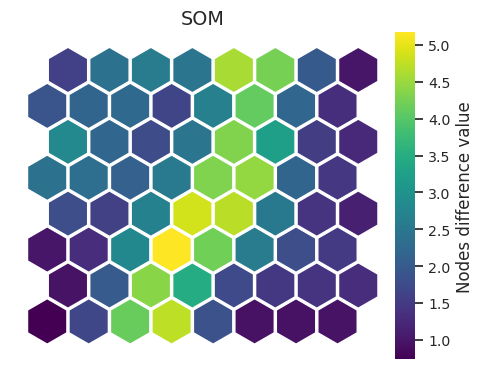

2024-06-02 21:11:28.883 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2024-06-02 21:11:29.157 | INFO     | simpsom.network:cluster:678 - Clustering results will be saved to:
././som_clusters.npy


In [ ]:
net_umap = sps.SOMNet(8, 8, X_train_umap, topology='hexagonal',
                 init='random', metric='euclidean',
                 neighborhood_fun='gaussian', PBC=False,
                 random_seed=32, GPU=False, CUML=False,
                 debug=False)

net_umap.train(train_algo='batch', start_learning_rate=0.01, epochs=-1, batch_size=100,
          early_stop="mapdiff", early_stop_tolerance=1e-5)

net_umap.plot_map_by_difference(show=True, print_out=False)

net_umap_labels, _ = net_umap.cluster(X_test_umap, algorithm='KMeans', n_clusters=2)

In [ ]:
import numpy as np

net_umap_labels = np.vectorize(lambda x: int(not x))(net_umap_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


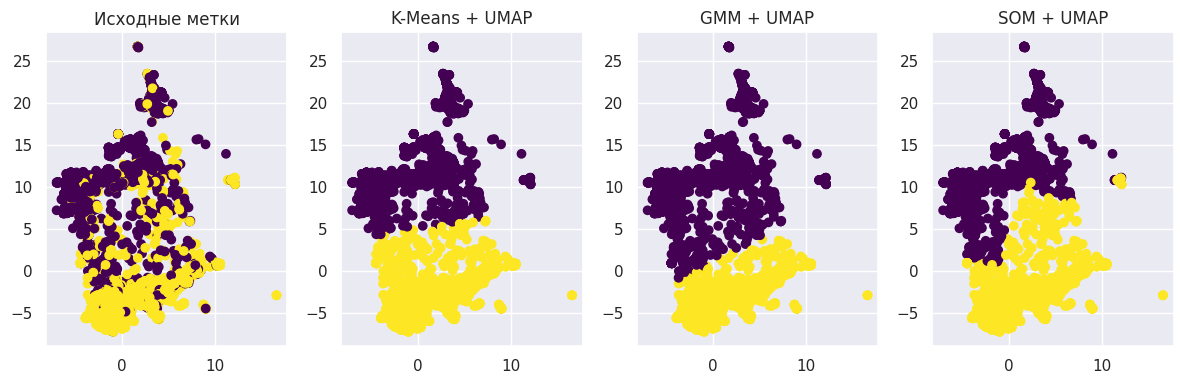

In [ ]:
k_means_umap = KMeans(n_clusters=2, random_state=0)
k_means_umap.fit(X_train_umap)
k_means_test_umap_labels = k_means_umap.predict(X_test_umap)

gmm_umap = GaussianMixture(n_components=2, random_state=0)
gmm_umap.fit(X_train_umap)
gmm_test_umap_labels = gmm_umap.predict(X_test_umap)

fig, axs = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(12)

axs[0].scatter(x=X_test_umap[:, 0], y=X_test_umap[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_umap[:, 0], y=X_test_umap[:, 1], c=k_means_test_umap_labels, cmap='viridis')
axs[1].set_title('K-Means + UMAP')

axs[2].scatter(x=X_test_umap[:, 0], y=X_test_umap[:, 1], c=gmm_test_umap_labels, cmap='viridis')
axs[2].set_title('GMM + UMAP')

axs[3].scatter(x=X_test_umap[:, 0], y=X_test_umap[:, 1], c=net_umap_labels, cmap='viridis')
axs[3].set_title('SOM + UMAP')

plt.tight_layout()
plt.show()

2024-06-02 21:13:11.881 | INFO     | simpsom.network:project_onto_map:604 - Projected coordinates will be saved to:
./som_projected_KMeans.npy
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2024-06-02 21:13:12.946 | INFO     | simpsom.network:cluster:678 - Clustering results will be saved to:
././som_clusters.npy


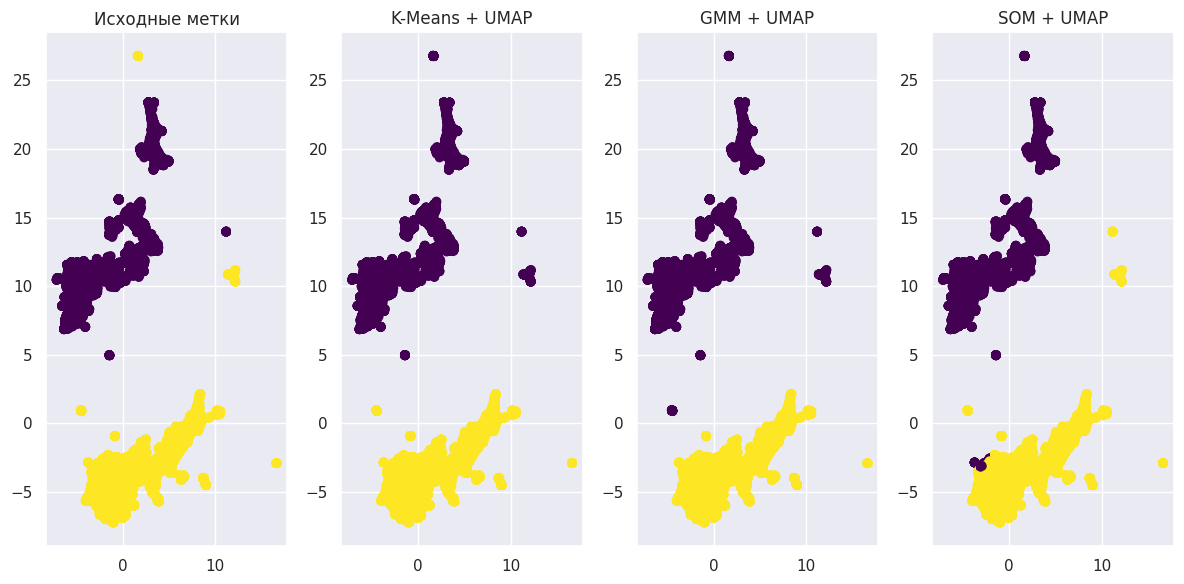

In [ ]:
k_means_train_umap_labels = k_means_umap.predict(X_train_umap)
gmm_train_umap_labels = gmm_umap.predict(X_train_umap)
net_train_umap_labels, _ = net_umap.cluster(X_train_umap, algorithm='KMeans', n_clusters=2)
net_train_umap_labels = np.vectorize(lambda x: int(not x))(net_train_umap_labels)

fig, axs = plt.subplots(1, 4)
fig.set_figheight(6)
fig.set_figwidth(12)

axs[0].scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=y_train, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=k_means_train_umap_labels, cmap='viridis')
axs[1].set_title('K-Means + UMAP')

axs[2].scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=gmm_train_umap_labels, cmap='viridis')
axs[2].set_title('GMM + UMAP')

axs[3].scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=net_train_umap_labels, cmap='viridis')
axs[3].set_title('SOM + UMAP')

plt.tight_layout()
plt.show()

In [ ]:
kn_clf_k_means = KNeighborsClassifier()
kn_clf_k_means.fit(X_train_umap, k_means_train_umap_labels)
y_pred = kn_clf_k_means.predict(X_test_umap)
kn_k_means_accuracy = accuracy_score(k_means_test_umap_labels, y_pred)
print(kn_k_means_accuracy)
print(accuracy_score(y_test, y_pred))
print(adjusted_rand_score(y_test, k_means_test_umap_labels))

0.9945333333333334
0.876
0.5626415962819508


In [ ]:
kn_clf_gmm = KNeighborsClassifier()
kn_clf_gmm.fit(X_train_umap, gmm_train_umap_labels)
y_pred = kn_clf_gmm.predict(X_test_umap)
kn_gmm_accuracy = accuracy_score(gmm_test_umap_labels, y_pred)
print(kn_gmm_accuracy)
print(accuracy_score(y_test, y_pred))
print(adjusted_rand_score(y_test, gmm_test_umap_labels))

0.9954666666666667
0.8726666666666667
0.5522865484431263


In [ ]:
kn_clf_som = KNeighborsClassifier()
kn_clf_som.fit(X_train_umap, net_train_umap_labels)
y_pred = kn_clf_som.predict(X_test_umap)
kn_som_accuracy = accuracy_score(net_umap_labels, y_pred)
print(kn_som_accuracy)
print(accuracy_score(y_test, y_pred))
print(adjusted_rand_score(y_test, net_umap_labels))

0.9754666666666667
0.8754666666666666
0.5824183765643592


In [ ]:
import simpsom as sps

net = sps.SOMNet(10, 10, X_train_umap, topology='hexagonal',
                 init='random', metric='euclidean',
                 neighborhood_fun='gaussian', PBC=False,
                 random_seed=32, GPU=False, CUML=False,
                 debug=False)

net.train(train_algo='batch', start_learning_rate=0.01, epochs=-1, batch_size=100,
          early_stop="mapdiff", early_stop_tolerance=1e-5)

net.plot_map_by_difference(show=True, print_out=False)

labs, points = net.cluster(X_train_umap, algorithm='KMeans', n_clusters=2)
plt.scatter(x=X_train_umap[:, 0], y=X_train_umap[:, 1], c=labs, cmap='viridis')
plt.title("SOM UMAP")
plt.show()

2024-06-02 20:24:33.717 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2024-06-02 20:24:33.720 | INFO     | simpsom.network:_set_weights:191 - The weights will be initialized randomly.


In [ ]:
!pip install sumap

In [ ]:
import sumap

In [ ]:
mypipeline = sumap.SUMAP(
    umap__n_neighbors=[5, 10, 15, 20],
    umap__min_dist=[0, 0.5],
    umap__n_components=[2]
)

mypipeline.fit(pd.DataFrame(X_train_scaled), pd.Series(y_train))
X_test_sumap = mypipeline.transform(X_test_scaled)
y_pred_sumap = mypipeline.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


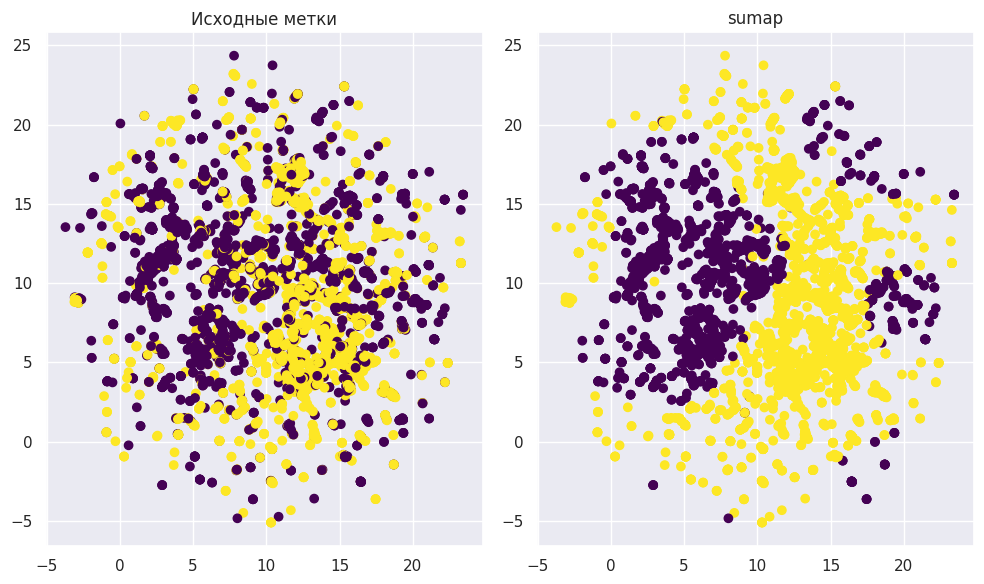

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(10)

axs[0].scatter(x=X_test_sumap[:, 0], y=X_test_sumap[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_sumap[:, 0], y=X_test_sumap[:, 1], c=y_pred_sumap, cmap='viridis')
axs[1].set_title('sumap')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


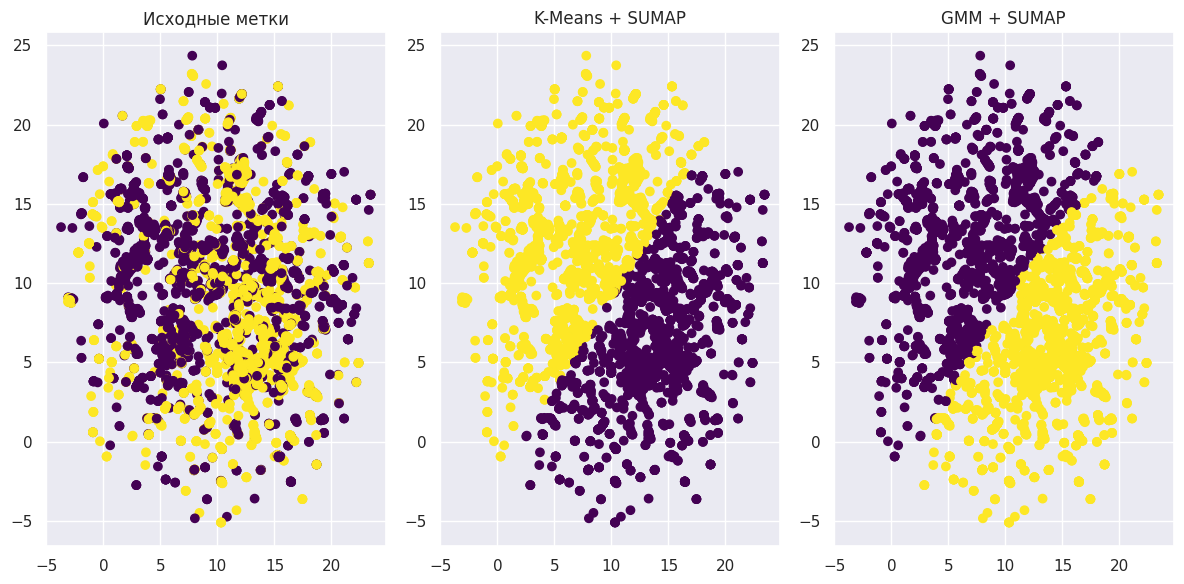

In [ ]:
X_train_sumap = mypipeline.transform(X_train_scaled)

k_means_sumap = KMeans(n_clusters=2, random_state=0)
k_means_sumap.fit(X_train_sumap)
k_means_sumap_labels = k_means_sumap.predict(X_test_sumap)

gmm_sumap = GaussianMixture(n_components=2, random_state=0)
gmm_sumap.fit(X_train_sumap)
gmm_sumap_labels = gmm_sumap.predict(X_test_sumap)

fig, axs = plt.subplots(1, 3)
fig.set_figheight(6)
fig.set_figwidth(12)

axs[0].scatter(x=X_test_sumap[:, 0], y=X_test_sumap[:, 1], c=y_test, cmap='viridis')
axs[0].set_title('Исходные метки')

axs[1].scatter(x=X_test_sumap[:, 0], y=X_test_sumap[:, 1], c=k_means_sumap_labels, cmap='viridis')
axs[1].set_title('K-Means + SUMAP')

axs[2].scatter(x=X_test_sumap[:, 0], y=X_test_sumap[:, 1], c=gmm_sumap_labels, cmap='viridis')
axs[2].set_title('GMM + SUMAP')

plt.tight_layout()
plt.show()